<div style="display: flex; justify-content: space-between; align-items: center;">
    <img src="https://logos-download.com/wp-content/uploads/2022/11/London_School_of_Economics_and_Political_Science_Logo.png" alt="LSE Logo" style="width: 200px;margin-right: 50px"/>
    <img src="https://logos-download.com/wp-content/uploads/2016/11/NHS_logo_logotype.png" alt="NHS logo" style="width: 200px;"/>
</div>

### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python - Sujith Kumaar K C

## Assignment: Diagnostic Analysis of NHS data using Python

### Import packages

In [6]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
import matplotlib.dates as mdates
from datetime import datetime
from datetime import time

# Optional - Ignore warnings.
import warnings
#warnings.filterwarnings('ignore')

In [7]:
def my_format(val):
        """Formats a number with commas as thousands separators."""
        return f"{val:,}"

### Import Data

In [9]:
ad = pd.read_csv('actual_duration.csv')
ar = pd.read_csv('appointments_regional.csv')
nc = pd.read_excel('national_categories.xlsx')
locations = pd.read_excel('LocationBreakup.xlsx',sheet_name = 'Full Mapping')
locations2 = pd.read_excel('LocationBreakup.xlsx',sheet_name = 'Locations')

### Basic Sense check of Data

In [11]:
print ('Actual Duration Data - Size:\n', ad.shape)
print ('\nActual Duration Data - NA values:\n', ad.isna().sum())
print ('\nActual Duration Data - Info:\n\n')
ad.info()
print ('\nActual Duration Data - Basic Stats:\n\n')
ad.describe().round()

Actual Duration Data - Size:
 (137793, 8)

Actual Duration Data - NA values:
 sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64

Actual Duration Data - Info:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_a

count_of_appointments
count               137793.0
mean                  1219.0
std                   1547.0
min                      1.0
25%                    194.0
50%                    696.0
75%                   1621.0
max                  15400.0

In [12]:
print ('Appts Regional Data - Size:\n', ar.shape)
print ('\nAppts Regional Data - NA values:\n', ar.isna().sum())
print ('\nAppts Regional Data - Info:\n\n')
ar.info()
print ('\nAppts Regional Data - Basic Stats:\n\n')
ar.describe().round()

Appts Regional Data - Size:
 (596821, 7)

Appts Regional Data - NA values:
 icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64

Appts Regional Data - Info:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 no

count_of_appointments
count               596821.0
mean                  1245.0
std                   5857.0
min                      1.0
25%                      7.0
50%                     47.0
75%                    308.0
max                 211265.0

In [13]:
print ('National Categories Data - Size:\n', nc.shape)
print ('National Categories Data - NA values:\n', nc.isna().sum())
print ('\nNational Categories Data - Info:\n\n')
nc.info()
print ('\nNational Categories Data - Basic Stats:\n\n')
nc.describe().round()

National Categories Data - Size:
 (817394, 8)
National Categories Data - NA values:
 appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64

National Categories Data - Info:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         


appointment_date  count_of_appointments
count                         817394               817394.0
mean   2022-01-16 00:50:35.860796160                  362.0
min              2021-08-01 00:00:00                    1.0
25%              2021-10-25 00:00:00                    7.0
50%              2022-01-18 00:00:00                   25.0
75%              2022-04-07 00:00:00                  128.0
max              2022-06-30 00:00:00                16590.0
std                              NaN                 1085.0

In [14]:
print ('\nAppts Regional Data - Sample Data:\n\n')
ar.head()


Appts Regional Data - Sample Data:




icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended       GP     Face-to-Face   
2    E54000034           2020-01           Attended       GP     Face-to-Face   
3    E54000034           2020-01           Attended       GP     Face-to-Face   
4    E54000034           2020-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                   8107  
1                    15  to 21 Days                   6791  
2                       2 to 7 Days                  20686  
3                    22  to 28 Days                   4268  
4                     8  to 14 Days                  11971

In [15]:
print ('\nActual Duration Data - Sample Data:\n\n')
ad.head()


Actual Duration Data - Sample Data:




sub_icb_location_code sub_icb_location_ons_code  \
0                   00L                 E38000130   
1                   00L                 E38000130   
2                   00L                 E38000130   
3                   00L                 E38000130   
4                   00L                 E38000130   

                        sub_icb_location_name icb_ons_code region_ons_code  \
0  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
1  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
2  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
3  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
4  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   

  appointment_date         actual_duration  count_of_appointments  
0        01-Dec-21           31-60 Minutes                    364  
1        01-Dec-21           21-30 Minutes                    619  
2        01-Dec-21            6-10 Minutes                   1698  
3        01-Dec-21  Unknown / Data Quality                   1277  
4        01-Dec-21           16-20 Minutes                    730

In [16]:
print ('\nNational Categories Data - Sample Data:\n\n')
nc.head()


National Categories Data - Sample Data:




appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  Care Related Encounter   
3      General Practice  Care Related Encounter   
4      General Practice  Care Related Encounter   

                        national_category  count_of_appointments  \
0  Patient contact during Care Home Round                      3   
1                         Planned Clinics                      7   
2                              Home Visit                     79   
3              General Consultation Acute                    725   
4            Structured Medication Review                      2   

  appointment_month  
0           2021-08  
1           2021-08  
2           2021-08  
3           2021-08  
4           2021-08

### Duplicates check, clean and Merge data

In [18]:
ad.duplicated().value_counts()

False    137793
Name: count, dtype: int64

In [19]:
nc.duplicated().value_counts()

False    817394
Name: count, dtype: int64

In [20]:
ar.duplicated().value_counts()

False    575217
True      21604
Name: count, dtype: int64

In [21]:
ar.duplicated().value_counts()
ar['dprows']=ar.duplicated()
filename = 'ar_flag.csv'
ar.to_csv(filename)

##### There are 21,604 rows of duplicate data in appointments regional dataset which needs to be reviewed in ar_flag.csv and removed if appropriate
##### Spot check in excel + monthly total comparison between AR and NC proves data is not duplicated and need not be removed.

In [23]:
ar.drop(columns=['dprows'],inplace=True)
locations.head()

region_ons_code               region_name icb_ons_code  \
0       E40000012  North East and Yorkshire    E54000050   
1       E40000012  North East and Yorkshire    E54000050   
2       E40000012  North East and Yorkshire    E54000050   
3       E40000010                North West    E54000048   
4       E40000010                North West    E54000048   

                             icb_name sub_icb_location_ons_code  \
0   North East and North Cumbria ICB                  E38000130   
1   North East and North Cumbria ICB                  E38000163   
2   North East and North Cumbria ICB                  E38000176   
3   Lancashire and South Cumbria ICB                  E38000014   
4   Lancashire and South Cumbria ICB                  E38000015   

                        sub_icb_location_name sub_icb_location_code  
0  NHS North East and North Cumbria ICB - 00L                   00L  
1  NHS North East and North Cumbria ICB - 00N                   00N  
2  NHS North East and North Cumbria ICB - 00P                   00P  
3  NHS Lancashire and South Cumbria ICB - 00Q                   00Q  
4  NHS Lancashire and South Cumbria ICB - 00R                   00R

In [24]:
locations2.head()

icb_ons_code region_ons_code               region_name  \
0    E54000050       E40000012  North East and Yorkshire   
1    E54000048       E40000010                North West   
2    E54000057       E40000010                North West   
3    E54000008       E40000010                North West   
4    E54000061       E40000012  North East and Yorkshire   

                             icb_name  
0   North East and North Cumbria ICB   
1   Lancashire and South Cumbria ICB   
2             Greater Manchester ICB   
3        Cheshire and Merseyside ICB   
4                South Yorkshire ICB

In [25]:
ad_merged = ad.merge(locations[['region_ons_code', 'icb_ons_code','sub_icb_location_ons_code','region_name', 'icb_name']], 
                     on=['region_ons_code', 'icb_ons_code','sub_icb_location_ons_code'],
                     how = 'left')
nc_merged = nc.merge(locations[['region_ons_code', 'icb_ons_code','sub_icb_location_ons_code','region_name', 'icb_name','sub_icb_location_name']],
                    on = ['icb_ons_code','sub_icb_location_name'],
                    how = 'left')
ar_merged = ar.merge(locations2[['region_ons_code','region_name','icb_ons_code','icb_name']], 
                     on=['icb_ons_code'],
                     how = 'left')

1. ar and nc match for the coinciding time period. 
2. ar and ad match for the coinciding time period + attended appointments alone.
3. ar has monthly data at ICB level only -  nc and ad have daily data at sub-ICB levels.  

In [27]:
ar_ncsubset = ar_merged[((ar_merged['appointment_month'] >= '2021-08') & (ar_merged['appointment_month'] <= '2022-06'))]
ar_adsubset = ar_merged[((ar_merged['appointment_month'] >= '2021-12') & (ar_merged['appointment_month'] <= '2022-06') & (ar_merged['appointment_status'].isin(['Attended'])))]

#### Check if the dataframes can be merged to get better info. AR and NC tried

In [29]:
ar_ss = ar_merged[(ar_merged['icb_ons_code'] == 'E54000034') & (ar_merged['appointment_month'] == '2021-08')]
nc_ss = nc_merged[(nc_merged['icb_ons_code'] == 'E54000034') & (nc_merged['appointment_month'] == '2021-08')]

In [30]:
ar_ss.head()

icb_ons_code appointment_month appointment_status hcp_type  \
3652    E54000034           2021-08           Attended       GP   
3653    E54000034           2021-08           Attended       GP   
3654    E54000034           2021-08           Attended       GP   
3655    E54000034           2021-08           Attended       GP   
3656    E54000034           2021-08           Attended       GP   

     appointment_mode time_between_book_and_appointment  \
3652     Face-to-Face                             1 Day   
3653     Face-to-Face                    15  to 21 Days   
3654     Face-to-Face                       2 to 7 Days   
3655     Face-to-Face                    22  to 28 Days   
3656     Face-to-Face                     8  to 14 Days   

      count_of_appointments region_ons_code region_name       icb_name  
3652                   6553       E40000005  South East   Frimley ICB   
3653                   2390       E40000005  South East   Frimley ICB   
3654                  10547       E40000005  South East   Frimley ICB   
3655                    937       E40000005  South East   Frimley ICB   
3656                   4961       E40000005  South East   Frimley ICB

In [31]:
nc_ss.head()

appointment_date icb_ons_code    sub_icb_location_name  \
755755       2021-08-01    E54000034  NHS Frimley ICB - D4U1Y   
755756       2021-08-01    E54000034  NHS Frimley ICB - D4U1Y   
755757       2021-08-01    E54000034  NHS Frimley ICB - D4U1Y   
755758       2021-08-02    E54000034  NHS Frimley ICB - D4U1Y   
755759       2021-08-02    E54000034  NHS Frimley ICB - D4U1Y   

                  service_setting            context_type  \
755755           General Practice    Inconsistent Mapping   
755756  Extended Access Provision  Care Related Encounter   
755757                      Other    Inconsistent Mapping   
755758       Primary Care Network  Care Related Encounter   
755759           General Practice  Care Related Encounter   

                      national_category  count_of_appointments  \
755755             Inconsistent Mapping                     11   
755756                  Clinical Triage                      9   
755757             Inconsistent Mapping                      2   
755758     Structured Medication Review                      6   
755759  Non-contractual chargeable work                     10   

       appointment_month region_ons_code sub_icb_location_ons_code  \
755755           2021-08       E40000005                 E38000252   
755756           2021-08       E40000005                 E38000252   
755757           2021-08       E40000005                 E38000252   
755758           2021-08       E40000005                 E38000252   
755759           2021-08       E40000005                 E38000252   

       region_name       icb_name  
755755  South East   Frimley ICB   
755756  South East   Frimley ICB   
755757  South East   Frimley ICB   
755758  South East   Frimley ICB   
755759  South East   Frimley ICB

In [32]:
merged_df = pd.merge(ar_ss, nc_ss, on='appointment_month', how='inner', suffixes = ('_ar', '_nc'), )
print ('AR Subset Total Appointments: ', ar_ss['count_of_appointments'].sum())
print ('NC Subset Total Appointments: ', nc_ss['count_of_appointments'].sum())
merged_df.groupby('appointment_month').sum('count_of_appointments_ar')

AR Subset Total Appointments:  302800
NC Subset Total Appointments:  302800


count_of_appointments_ar  count_of_appointments_nc
appointment_month                                                    
2021-08                           234972800                  59954400

In [33]:
merged_df.head(777)

icb_ons_code_ar appointment_month appointment_status hcp_type  \
0         E54000034           2021-08           Attended       GP   
1         E54000034           2021-08           Attended       GP   
2         E54000034           2021-08           Attended       GP   
3         E54000034           2021-08           Attended       GP   
4         E54000034           2021-08           Attended       GP   
..              ...               ...                ...      ...   
772       E54000034           2021-08           Attended       GP   
773       E54000034           2021-08           Attended       GP   
774       E54000034           2021-08           Attended       GP   
775       E54000034           2021-08           Attended       GP   
776       E54000034           2021-08           Attended       GP   

    appointment_mode time_between_book_and_appointment  \
0       Face-to-Face                             1 Day   
1       Face-to-Face                             1 Day   
2       Face-to-Face                             1 Day   
3       Face-to-Face                             1 Day   
4       Face-to-Face                             1 Day   
..               ...                               ...   
772     Face-to-Face                             1 Day   
773     Face-to-Face                             1 Day   
774     Face-to-Face                             1 Day   
775     Face-to-Face                             1 Day   
776     Face-to-Face                    15  to 21 Days   

     count_of_appointments_ar region_ons_code_ar region_name_ar  \
0                        6553          E40000005     South East   
1                        6553          E40000005     South East   
2                        6553          E40000005     South East   
3                        6553          E40000005     South East   
4                        6553          E40000005     South East   
..                        ...                ...            ...   
772                      6553          E40000005     South East   
773                      6553          E40000005     South East   
774                      6553          E40000005     South East   
775                      6553          E40000005     South East   
776                      2390          E40000005     South East   

       icb_name_ar  ... icb_ons_code_nc    sub_icb_location_name  \
0     Frimley ICB   ...       E54000034  NHS Frimley ICB - D4U1Y   
1     Frimley ICB   ...       E54000034  NHS Frimley ICB - D4U1Y   
2     Frimley ICB   ...       E54000034  NHS Frimley ICB - D4U1Y   
3     Frimley ICB   ...       E54000034  NHS Frimley ICB - D4U1Y   
4     Frimley ICB   ...       E54000034  NHS Frimley ICB - D4U1Y   
..             ...  ...             ...                      ...   
772   Frimley ICB   ...       E54000034  NHS Frimley ICB - D4U1Y   
773   Frimley ICB   ...       E54000034  NHS Frimley ICB - D4U1Y   
774   Frimley ICB   ...       E54000034  NHS Frimley ICB - D4U1Y   
775   Frimley ICB   ...       E54000034  NHS Frimley ICB - D4U1Y   
776   Frimley ICB   ...       E54000034  NHS Frimley ICB - D4U1Y   

               service_setting            context_type  \
0             General Practice    Inconsistent Mapping   
1    Extended Access Provision  Care Related Encounter   
2                        Other    Inconsistent Mapping   
3         Primary Care Network  Care Related Encounter   
4             General Practice  Care Related Encounter   
..                         ...                     ...   
772  Extended Access Provision  Care Related Encounter   
773  Extended Access Provision  Care Related Encounter   
774  Extended Access Provision  Care Related Encounter   
775  Extended Access Provision  Care Related Encounter   
776           General Practice    Inconsistent Mapping   

                   national_category count_of_appointments_nc  \
0               Inconsistent Mapping                       11   
1                    Clinical

1. Each row in AR gets duplicated by 777 times ending up as a cross join. Hence joining the tables will not be possible. 
2. If AR, NC and AD are all available in daily non-aggregated format with Appointment number, merge can be performed there.
3. Within the current format, the merge can be done if there are unique identifiers to each aggregated row apart from just categorical data. 

### Exploratory Data Analysis

#### Q1. What is the number of locations, service settings, context types, national categories, and appointment statuses in the data sets?

#### 1a. Locations breakdown
1. There are 7 regions that are getting divided into 42 ICB locations and 106 sub-ICB Locations.
Note: Additional data was obtained from NHS sources to map the 7 regions code to their respective names.
2. Breakdown flow: Region (7) -> ICB Location (42) -> sub-ICB locations (106).
3. **North West** is the region with the highest number of sub-ICB locations (3 ICBs) and (27 sub ICBs).
4. **Midlands** is the region serving the largest number of appointments (19.4% of Total appointments in 11 and 30 months periods) - contains 11 ICBs and 19 sub ICBs.
5. **NHS North West London ICB - W2U3Z** is handling the largest number of appointments at the sub-ICB level (11 month data) at 4.1% of Total appointments.
6. **NHS Lancashire and South Cumbria ICB - 02G** is handling the least number of appointments at the sub-ICB level(11 month data) at 0.19% of Total appointments.

In [38]:
region_count = nc_merged['region_ons_code'].nunique()
icb_location_count = nc_merged['icb_ons_code'].nunique()
sub_location_count = nc_merged['sub_icb_location_name'].nunique()

locations_breakup = locations.groupby(['region_name']).nunique()
locations_breakup.drop(columns = ['region_ons_code','icb_name','sub_icb_location_name','sub_icb_location_code'],inplace = True)
locations_breakup = locations_breakup.sort_values('sub_icb_location_ons_code',ascending = False).reset_index()

print('\nTotal Location regions:', region_count)
print('Total ICB Locations:', icb_location_count)
print('Total Sub-ICB Locations:', sub_location_count)
print('\n\n Region-wise breakup of ICBs and Sub-ICBs:')
print(locations_breakup)

print('\n\n')
nc_appts = nc_merged.groupby(['region_name','icb_name','sub_icb_location_name']).sum('count_of_appointments')
total_nc_appts = nc_appts['count_of_appointments'].sum()
nc_appts['% of Total'] = (nc_appts['count_of_appointments'] / total_nc_appts)*100
nc_appts_by_location = nc_appts.reset_index()
nc_appts_by_location.style.format({'count_of_appointments': my_format, '% of Total': '{:.2f}'}).background_gradient(subset=['count_of_appointments','% of Total'], cmap='RdYlGn')


Total Location regions: 7
Total ICB Locations: 42
Total Sub-ICB Locations: 106


 Region-wise breakup of ICBs and Sub-ICBs:
                region_name  icb_ons_code  sub_icb_location_ons_code
0                North West             3                         27
1  North East and Yorkshire             4                         23
2                  Midlands            11                         19
3          East of England              6                         14
4                South East             6                         11
5                South West             7                          7
6                    London             5                          5





In [39]:
# Region-wise count of appointments from NC DataFrame - 11 months data
nc_appts_region = nc_merged.groupby(['region_name']).sum('count_of_appointments').sort_values(by='count_of_appointments',ascending = False)
total_nc_appts_region = nc_appts_region['count_of_appointments'].sum()
nc_appts_region['% of Total'] = (nc_appts_region['count_of_appointments'] / total_nc_appts_region)*100
nc_appts_region = nc_appts_region.reset_index()

# Region-wise count of appointments from AR DataFrame - 29 Months
ar_appts_region = ar_merged.groupby(['region_name']).sum('count_of_appointments').sort_values(by='count_of_appointments',ascending = False)
total_ar_appts_region = ar_appts_region['count_of_appointments'].sum()
ar_appts_region['% of Total'] = (ar_appts_region['count_of_appointments'] / total_ar_appts_region)*100
ar_appts_region = ar_appts_region.reset_index()

#Printing NC based region wise dataset (formatted)
print('\nRegion Wise Appointments count [NC Dataset] - 11 months\n')
nc_appts_region.style.format({'count_of_appointments': my_format, '% of Total': '{:.1f}'}).background_gradient(subset=['count_of_appointments','% of Total'], cmap='BuGn')


Region Wise Appointments count [NC Dataset] - 11 months



In [40]:
#Printing AR based region wise dataset (formatted)
print('\n Region Wise Appointments count [AR Dataset]- 30 months\n')
ar_appts_region.style.format({'count_of_appointments': my_format, '% of Total': '{:.1f}'}).background_gradient(subset=['count_of_appointments','% of Total'], cmap='BuGn')


 Region Wise Appointments count [AR Dataset]- 30 months



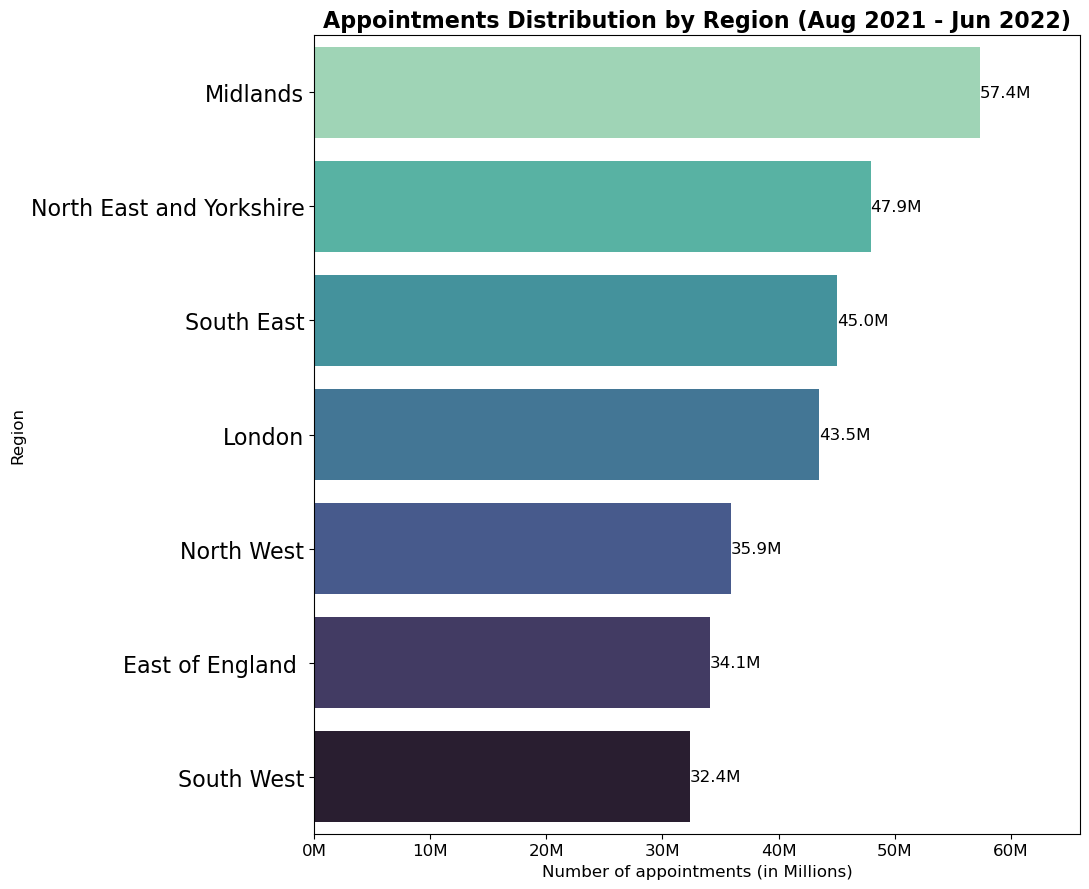


 Top 5 ICBs by Appointments - 11 Months NC Data

                             icb_name               region_name  \
0   North East and North Cumbria ICB   North East and Yorkshire   
1                 West Yorkshire ICB   North East and Yorkshire   
2             Greater Manchester ICB                 North West   
3        Cheshire and Merseyside ICB                 North West   
4              North West London ICB                     London   

   count_of_appointments  
0               16882235  
1               14358371  
2               13857900  
3               13250311  
4               12142390  

 Top 5 Sub-ICBs by Appointments - 11 Months NC Data

                         sub_icb_location_name  \
0            NHS North West London ICB - W2U3Z   
1            NHS North East London ICB - A3A8R   
2                NHS Kent and Medway ICB - 91Q   
3  NHS Hampshire and Isle Of Wight ICB - D9Y0V   
4              NHS South East London ICB - 72Q   

                            ic

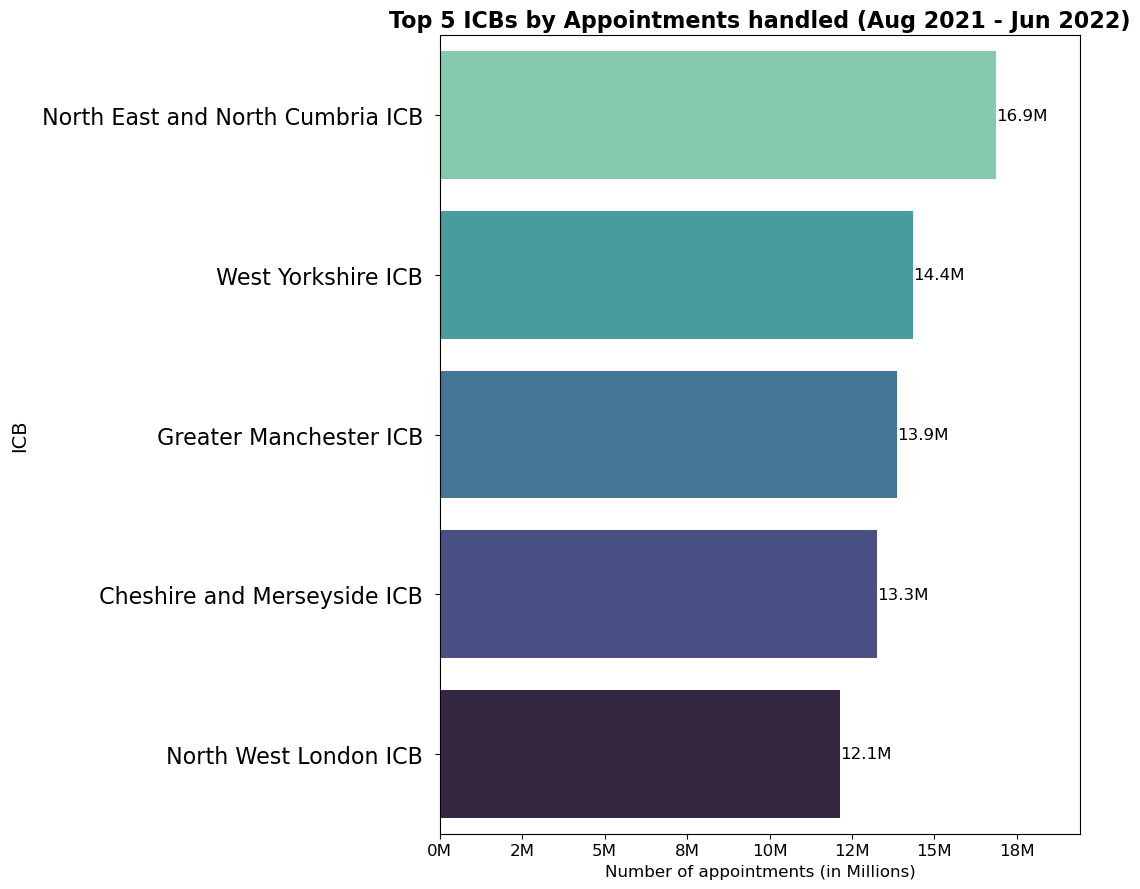

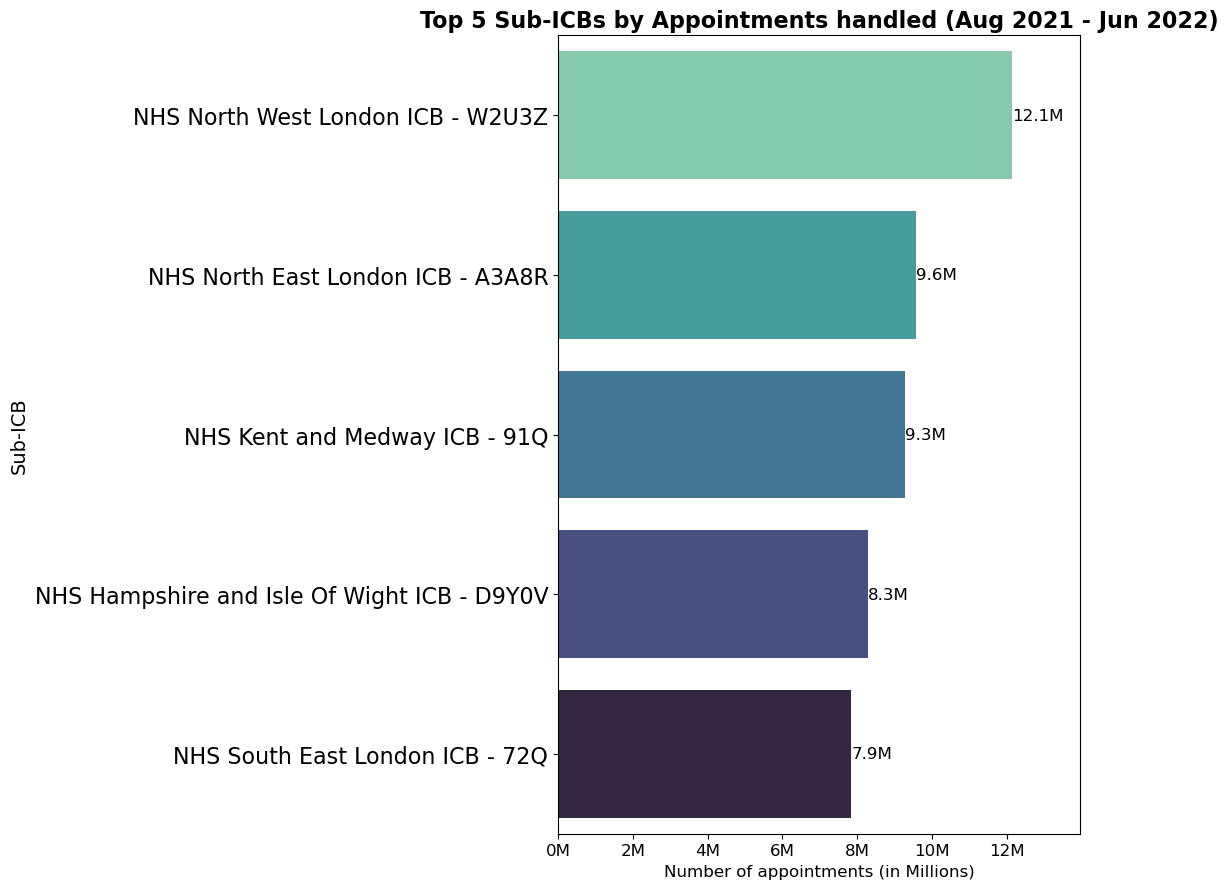

In [41]:
# Generating bar chart for Region wise Appointments distribution - Uses NC dataset (nc_appts_region)
plt.figure(figsize=(11, 9))
ax = sns.barplot(y='region_name', x='count_of_appointments', data=nc_appts_region,palette='mako_r')
plt.title('Appointments Distribution by Region (Aug 2021 - Jun 2022)', fontsize = 16, fontweight = 'bold')
plt.ylabel('Region',fontsize = 12)
plt.xlabel('Number of appointments (in Millions)',fontsize = 12)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=16)
plt.xlim(0, nc_appts_region['count_of_appointments'].max() * 1.15)
for index, value in enumerate(nc_appts_region['count_of_appointments']):
    plt.text(value, index, f'{value/1e6:.1f}M', va='center',ha='left', fontsize=12)
plt.tight_layout()
plt.savefig('appointments_by_region.png', dpi=300, bbox_inches='tight')
plt.show()

# Identify and print Top 5 ICBs and Top 5 Sub-ICBs - Uses NC dataset to keep it uniform and AR does not have sub-ICB breakdown
top_5_icbs = nc_merged.groupby(['icb_name','region_name']).sum('count_of_appointments').sort_values(by='count_of_appointments',ascending = False).reset_index().head()
top_5_sicbs = nc_merged.groupby(['sub_icb_location_name','icb_name','region_name']).sum('count_of_appointments').sort_values(by='count_of_appointments',ascending = False).reset_index().head()
print('\n Top 5 ICBs by Appointments - 11 Months NC Data\n')
print(top_5_icbs)
print('\n Top 5 Sub-ICBs by Appointments - 11 Months NC Data\n')
print(top_5_sicbs)

# Generating bar chart for Top 5 ICBs
plt.figure(figsize=(11, 9))
ax = sns.barplot(y='icb_name', x='count_of_appointments', data=top_5_icbs,palette='mako_r')
plt.title('Top 5 ICBs by Appointments handled (Aug 2021 - Jun 2022)', fontsize = 16, fontweight = 'bold')
plt.ylabel('ICB',fontsize = 14)
plt.xlabel('Number of appointments (in Millions)',fontsize = 12)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=16)
plt.xlim(0, top_5_icbs['count_of_appointments'].max() * 1.15)
for index, value in enumerate(top_5_icbs['count_of_appointments']):
    plt.text(value, index, f'{value/1e6:.1f}M', va='center',ha='left', fontsize=12)
plt.tight_layout() 
plt.savefig('top5icbs.png', dpi=300, bbox_inches='tight')
plt.show()

# Generating bar chart for Top 5 ICBs
plt.figure(figsize=(11, 9))
ax = sns.barplot(y='sub_icb_location_name', x='count_of_appointments', data=top_5_sicbs,palette='mako_r')
plt.title('Top 5 Sub-ICBs by Appointments handled (Aug 2021 - Jun 2022)', fontsize = 16, fontweight = 'bold')
plt.ylabel('Sub-ICB',fontsize = 14)
plt.xlabel('Number of appointments (in Millions)',fontsize = 12)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=16)
plt.xlim(0, top_5_sicbs['count_of_appointments'].max() * 1.15)
for index, value in enumerate(top_5_sicbs['count_of_appointments']):
    plt.text(value, index, f'{value/1e6:.1f}M', va='center',ha='left', fontsize=12)
plt.tight_layout() 
plt.savefig('top5SubICBs.png', dpi=300, bbox_inches='tight')
plt.show()

#### 1b. Categorical breakdown of appointments - 
##### Based on 11 months of data from National Categories dataset (Aug-2021 to Jun-2022)
1. Service settings - 91.5% of all appointments are treated in General Practice (GPs), showing their importance in the NHS network.
2. Context types - 87% of all appointments are Care Related Encounters.	
3. National Categories - 33% of all appointments are Routine General Consultations, 18.14% are Acute General Consultations. **51% of all appointments are General consultations**	
##### Based on 30 months of data from Appointments Regional dataset (Jan-2020 to Jun-2022)
4. Appointment Status - 91% of all appointments have been attended. Did not attend and Data quality appointments together account for 9%.
5. Healthcare Professional(HCP) Type - General Practioners (GP) account for 51% of all appointments, Other HCPs are covering 46% of all appointments.
6. Appointment Mode - Face to Face appointments account for 59% of all appointments, followed by Telephone appointments at 36% of all appointments.
7. Time between booking & appointment - 46% of all appointments are **Same Day appointments**
##### Based on 8 months of data from Actual Duration dataset (Dec-2021 to Jun-2022)   
8. Actual Duration of Appointments - 37% of all appointments take **less than 10 minutes** to be completed. 

In [43]:
# Function defintion - To process categorical wise breakdown of a dataframe
def analyze_category(df, category_column, data_source='nc_merged'):
    count = df[category_column].nunique()
    print(f'\nTotal {category_column.replace("_", " ").title()}s: {count}\n')
    
    grouped = df.groupby(category_column)['count_of_appointments'].sum().reset_index()
    total = grouped['count_of_appointments'].sum()
    grouped['% of Total'] = (grouped['count_of_appointments'] / total) * 100
    grouped = grouped.sort_values('count_of_appointments', ascending=False)
    grouped = grouped.reset_index()
    grouped.drop(columns = ['index'],inplace = True)

    # Rename columns
    grouped = grouped.rename(columns={'count_of_appointments': 'Appointments'})
    
    styled = grouped.style.format({
        'Appointments': my_format, 
        '% of Total': '{:.2f}'
    }).background_gradient(subset=['Appointments', '% of Total'], cmap='BuGn')
    
    print(f"Total {category_column.replace('_', ' ').title()} Appointments: {my_format(total)}\n")
    display(styled)
    print("\n" + "="*50 + "\n")  # Separator between categories
    return grouped

nc_result_dfs = {}
ar_result_dfs = {}
ad_result_dfs = {}
# Analyze NC categories
nc_categories = ['service_setting', 'context_type', 'national_category']
for category in nc_categories:
    nc_result_dfs[category] = analyze_category(nc_merged, category)

# Analyze AR category
ar_categories = ['appointment_status','hcp_type', 'appointment_mode', 'time_between_book_and_appointment']
for category in ar_categories:
    ar_result_dfs[category] = analyze_category(ar_merged, category, data_source='ar_merged')

# Analyze AD category
ad_result_dfs[category] = analyze_category(ad_merged, 'actual_duration', data_source='ad_merged')


Total Service Settings: 5

Total Service Setting Appointments: 296,046,770






Total Context Types: 3

Total Context Type Appointments: 296,046,770






Total National Categorys: 18

Total National Category Appointments: 296,046,770






Total Appointment Statuss: 3

Total Appointment Status Appointments: 742,804,525






Total Hcp Types: 3

Total Hcp Type Appointments: 742,804,525






Total Appointment Modes: 5

Total Appointment Mode Appointments: 742,804,525






Total Time Between Book And Appointments: 8

Total Time Between Book And Appointment Appointments: 742,804,525






Total Actual Durations: 7

Total Actual Duration Appointments: 167,980,692



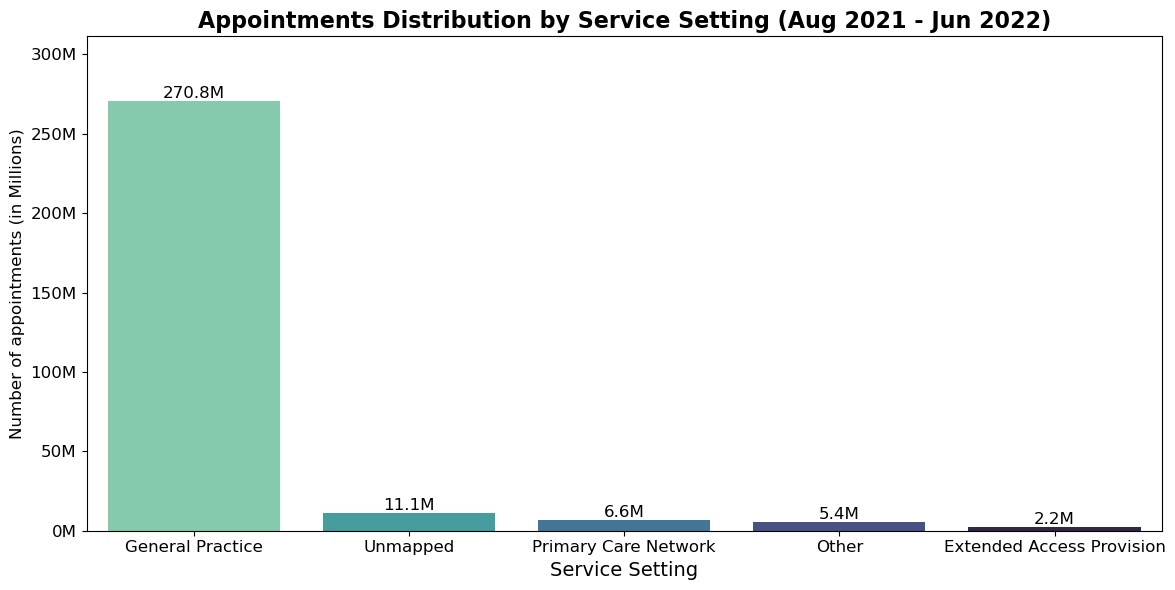

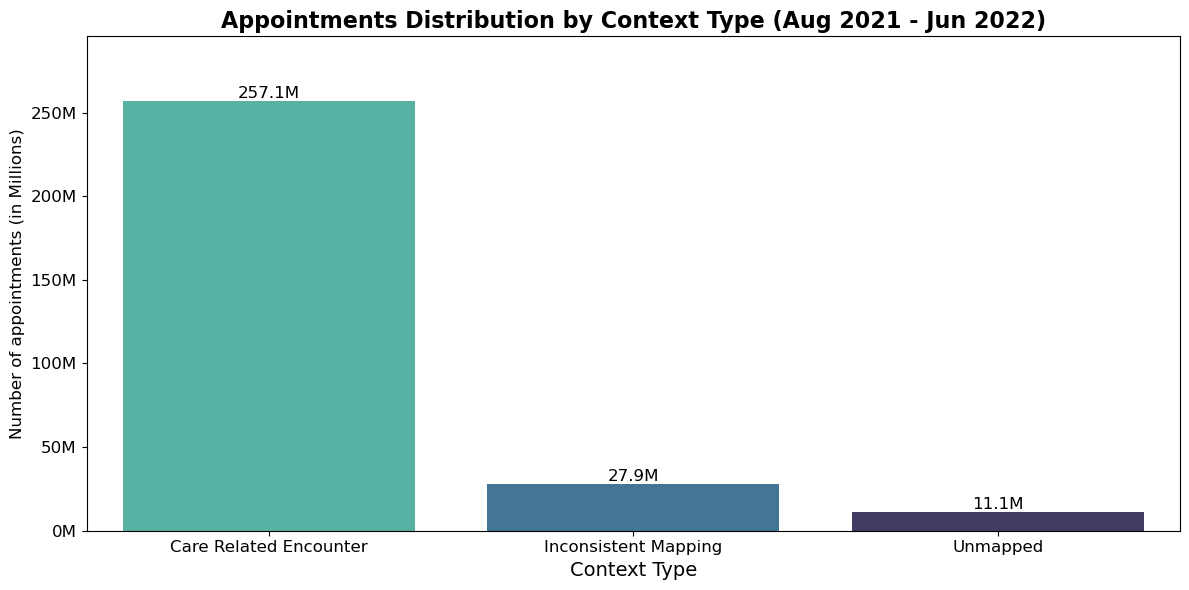

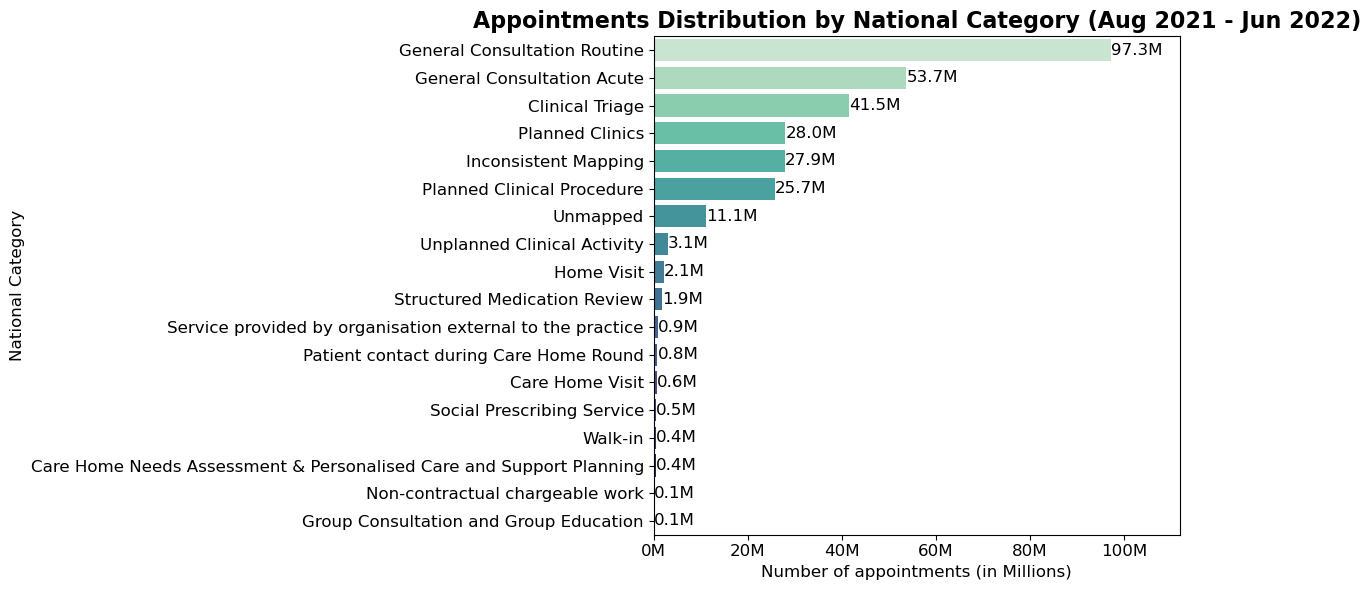

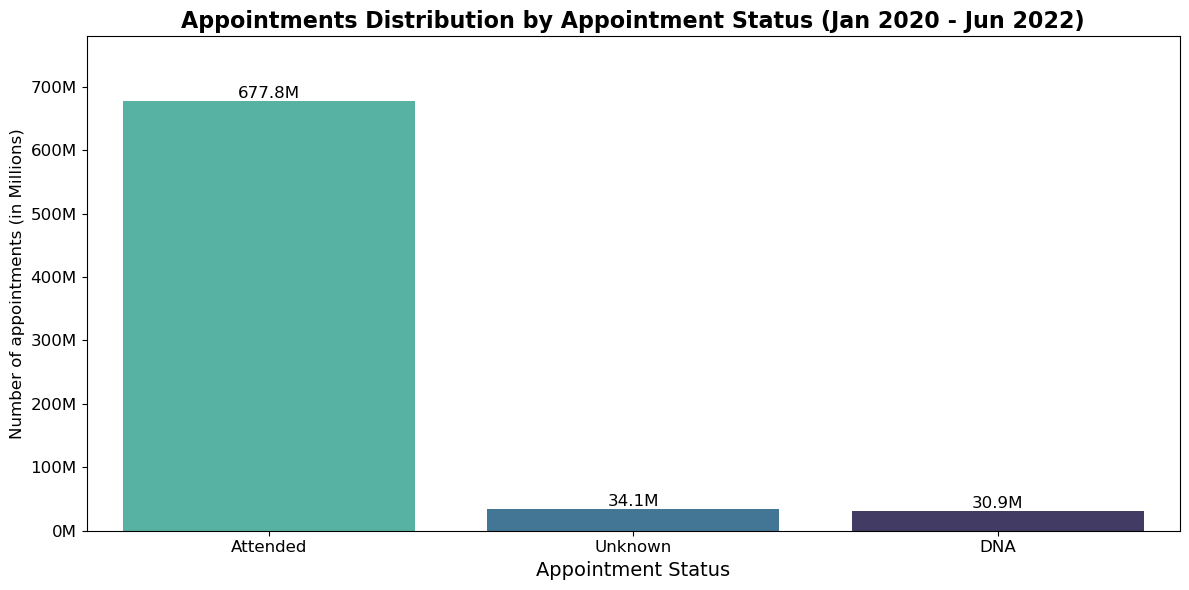

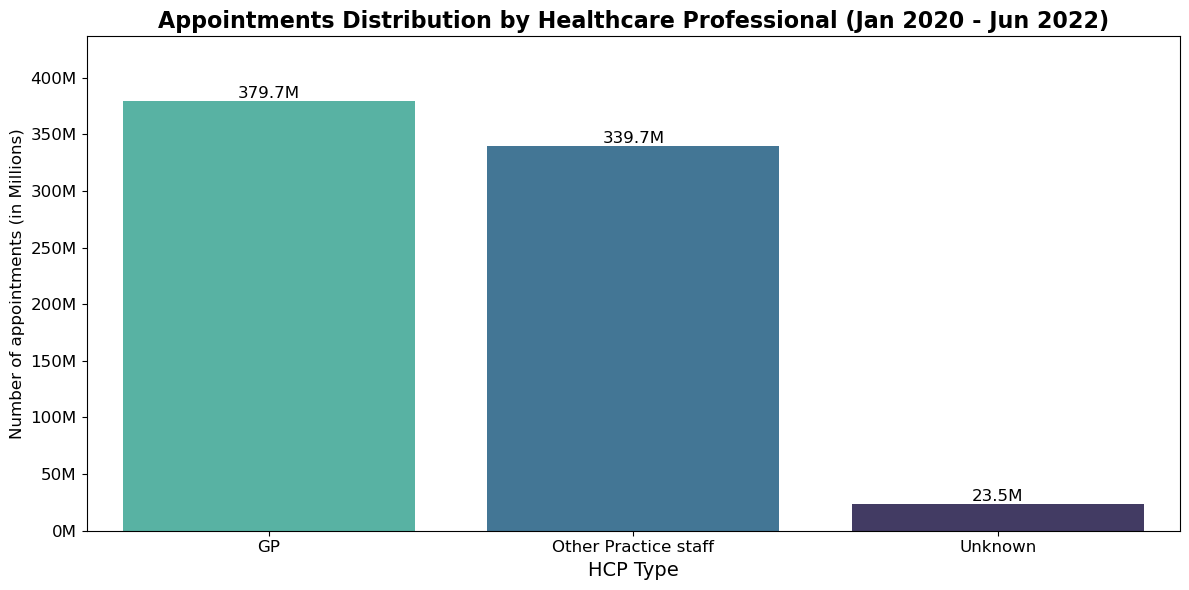

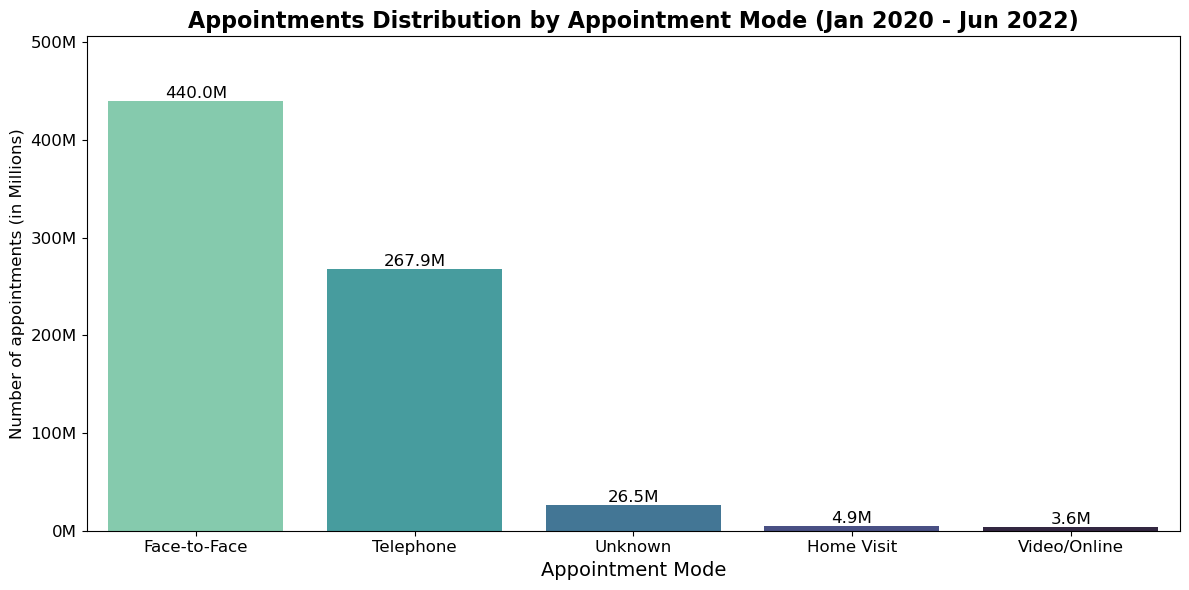

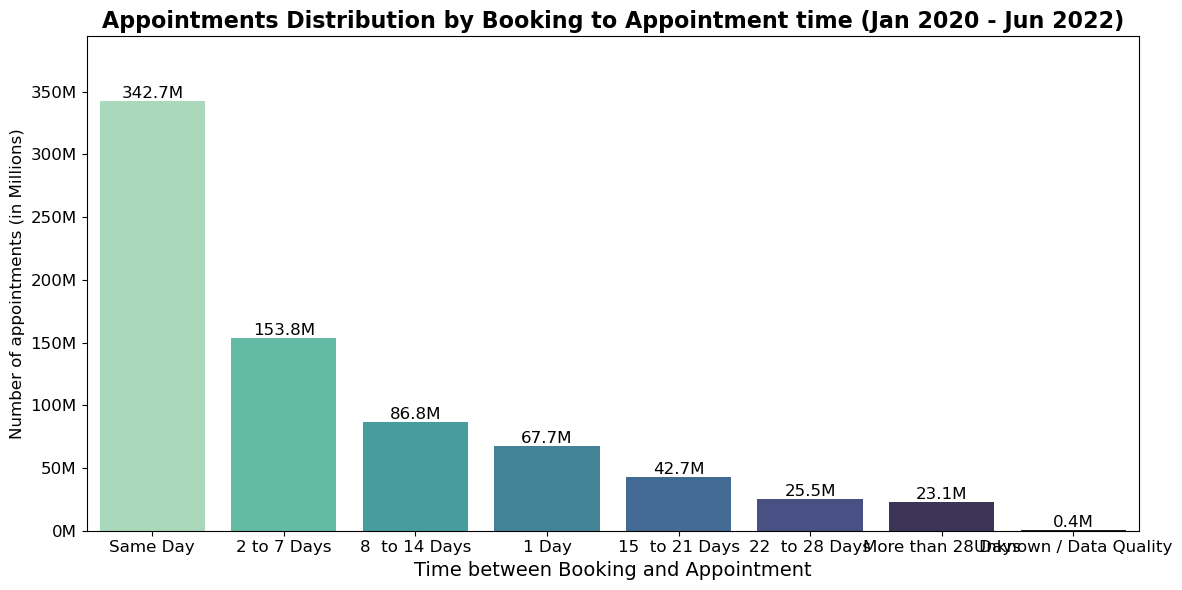

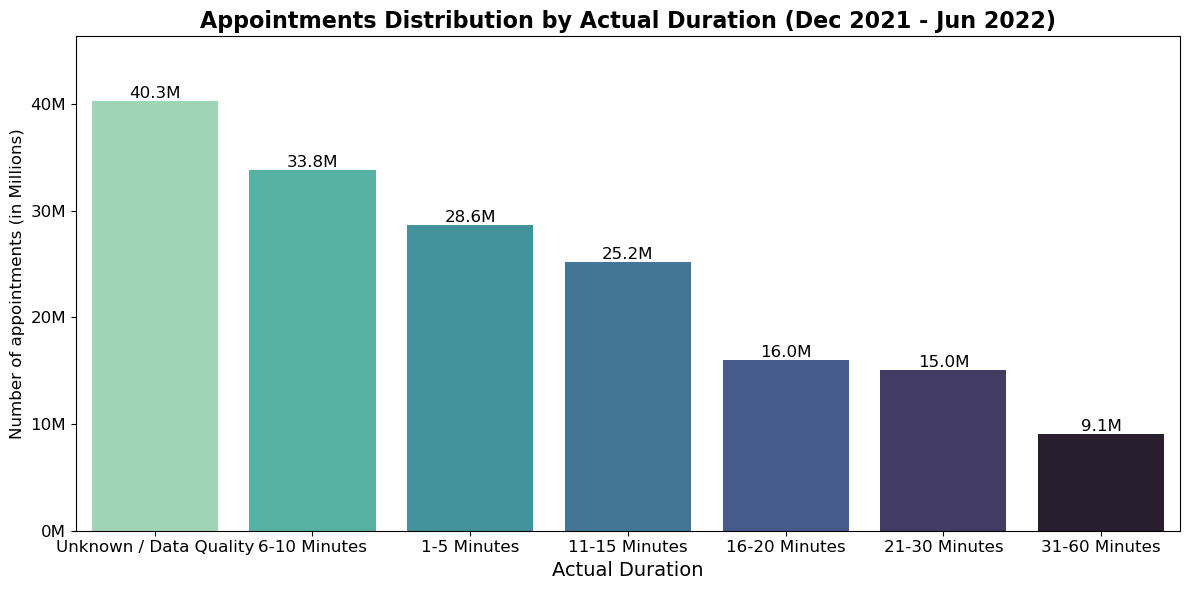

In [44]:
# Generating bar charts for the resultant tables

# National Categories Distribution plots - Service Settings, Context Type, National Category
# Service Settings
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='service_setting', y='Appointments', data=nc_result_dfs['service_setting'],palette='mako_r')
plt.title('Appointments Distribution by Service Setting (Aug 2021 - Jun 2022)', fontsize = 16, fontweight = 'bold')
plt.xlabel('Service Setting',fontsize = 14)
plt.ylabel('Number of appointments (in Millions)',fontsize = 12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, nc_result_dfs['service_setting']['Appointments'].max() * 1.15)
for index, value in enumerate(nc_result_dfs['service_setting']['Appointments']):
    plt.text(index, value, f'{value/1e6:.1f}M', va='bottom',ha='center', fontsize=12)
plt.tight_layout() 
plt.savefig('appointments_by_service_setting.png', dpi=300, bbox_inches='tight')
plt.show()

# Context Type 
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='context_type', y='Appointments', data=nc_result_dfs['context_type'],palette='mako_r')
plt.title('Appointments Distribution by Context Type (Aug 2021 - Jun 2022)', fontsize = 16, fontweight = 'bold')
plt.xlabel('Context Type',fontsize = 14)
plt.ylabel('Number of appointments (in Millions)',fontsize = 12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, nc_result_dfs['context_type']['Appointments'].max() * 1.15)
for index, value in enumerate(nc_result_dfs['context_type']['Appointments']):
    plt.text(index, value, f'{value/1e6:.1f}M', va='bottom',ha='center', fontsize=12)
plt.tight_layout() 
plt.savefig('appointments_by_context_type.png', dpi=300, bbox_inches='tight')
plt.show()

# National Categories
plt.figure(figsize=(12, 6))
ax = sns.barplot(y='national_category', x='Appointments', data=nc_result_dfs['national_category'],palette='mako_r')
plt.title('Appointments Distribution by National Category (Aug 2021 - Jun 2022)', fontsize = 16, fontweight = 'bold')
plt.ylabel('National Category',fontsize = 12)
plt.xlabel('Number of appointments (in Millions)',fontsize = 12)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, nc_result_dfs['national_category']['Appointments'].max() * 1.15)
for index, value in enumerate(nc_result_dfs['national_category']['Appointments']):
    plt.text(value, index, f'{value/1e6:.1f}M', va='center',ha='left', fontsize=12)
plt.tight_layout()
plt.savefig('appointments_by_national_category.png', dpi=300, bbox_inches='tight')
plt.show()

# Appointments Regional Distribution plots - Appointment Status, HCP Type
# Appointment Status
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='appointment_status', y='Appointments', data=ar_result_dfs['appointment_status'],palette='mako_r')
plt.title('Appointments Distribution by Appointment Status (Jan 2020 - Jun 2022)', fontsize = 16, fontweight = 'bold')
plt.xlabel('Appointment Status',fontsize = 14)
plt.ylabel('Number of appointments (in Millions)',fontsize = 12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, ar_result_dfs['appointment_status']['Appointments'].max() * 1.15)
for index, value in enumerate(ar_result_dfs['appointment_status']['Appointments']):
    plt.text(index,value, f'{value/1e6:.1f}M', va='bottom',ha='center', fontsize=12)
plt.tight_layout() 
plt.savefig('appointments_by_appt_status.png', dpi=300, bbox_inches='tight')
plt.show()

# HCP Type
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='hcp_type', y='Appointments', data=ar_result_dfs['hcp_type'],palette='mako_r')
plt.title('Appointments Distribution by Healthcare Professional (Jan 2020 - Jun 2022)', fontsize = 16, fontweight = 'bold')
plt.xlabel('HCP Type',fontsize = 14)
plt.ylabel('Number of appointments (in Millions)',fontsize = 12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, ar_result_dfs['hcp_type']['Appointments'].max() * 1.15)
for index, value in enumerate(ar_result_dfs['hcp_type']['Appointments']):
    plt.text(index,value, f'{value/1e6:.1f}M', va='bottom',ha='center', fontsize=12)
plt.tight_layout()
plt.savefig('appointments_by_hcp.png', dpi=300, bbox_inches='tight')
plt.show()

# Appointment Mode
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='appointment_mode', y='Appointments', data=ar_result_dfs['appointment_mode'],palette='mako_r')
plt.title('Appointments Distribution by Appointment Mode (Jan 2020 - Jun 2022)', fontsize = 16, fontweight = 'bold')
plt.xlabel('Appointment Mode',fontsize = 14)
plt.ylabel('Number of appointments (in Millions)',fontsize = 12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, ar_result_dfs['appointment_mode']['Appointments'].max() * 1.15)
for index, value in enumerate(ar_result_dfs['appointment_mode']['Appointments']):
    plt.text(index,value, f'{value/1e6:.1f}M', va='bottom',ha='center', fontsize=12)
plt.tight_layout() 
plt.savefig('appointments_by_mode.png', dpi=300, bbox_inches='tight')
plt.show()

# Time between Booking and Appointment
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='time_between_book_and_appointment', y='Appointments', data=ar_result_dfs['time_between_book_and_appointment'],palette='mako_r')
plt.title('Appointments Distribution by Booking to Appointment time (Jan 2020 - Jun 2022)', fontsize = 16, fontweight = 'bold')
plt.xlabel('Time between Booking and Appointment',fontsize = 14)
plt.ylabel('Number of appointments (in Millions)',fontsize = 12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, ar_result_dfs['time_between_book_and_appointment']['Appointments'].max() * 1.15)
for index, value in enumerate(ar_result_dfs['time_between_book_and_appointment']['Appointments']):
    plt.text(index,value, f'{value/1e6:.1f}M', va='bottom',ha='center', fontsize=12)
plt.tight_layout()
plt.savefig('appointments_by_booking_time.png', dpi=300, bbox_inches='tight')
plt.show()

# Actual Duration Distribution plots - Actual Duration
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='actual_duration', y='Appointments', data=ad_result_dfs['time_between_book_and_appointment'],palette='mako_r')
plt.title('Appointments Distribution by Actual Duration (Dec 2021 - Jun 2022)', fontsize = 16, fontweight = 'bold')
plt.xlabel('Actual Duration',fontsize = 14)
plt.ylabel('Number of appointments (in Millions)',fontsize = 12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, ad_result_dfs['time_between_book_and_appointment']['Appointments'].max() * 1.15)
for index, value in enumerate(ad_result_dfs['time_between_book_and_appointment']['Appointments']):
    plt.text(index,value, f'{value/1e6:.1f}M', va='bottom',ha='center', fontsize=12)
plt.tight_layout() 
plt.savefig('appointments_by_actual_duration.png', dpi=300, bbox_inches='tight')
plt.show()

#### Q2. What is the date range of the provided data sets, and which service settings reported the most appointments for a specific period?

#### 2a. Date Range of the datasets
1. AR is the bigger subset with 30 months of data, but is **monthly data** from Jan 2020 to Jun 2022
2. NC has 11 months of **daily data** from Aug 2021 to Jun 2022
3. AD has 7 months of **daily data** from Dec 2021 to Jun 2022

In [47]:
ad_merged['appointment_date'] = pd.to_datetime(ad_merged['appointment_date'])
ad_merged['appointment_month'] = pd.to_datetime(ad_merged['appointment_date']).dt.strftime('%Y-%m')
ad_merged['appointment_month'] = pd.to_datetime(ad_merged['appointment_month'], format='%Y-%m')
ar_merged['appointment_month'] = pd.to_datetime(ar_merged['appointment_month'], format='%Y-%m')
nc_merged['appointment_month'] = pd.to_datetime(nc_merged['appointment_month'], format='%Y-%m')

from dateutil.relativedelta import relativedelta

def months_between(start_date, end_date):
    r = relativedelta(end_date, start_date)
    return r.years * 12 + r.months + (r.days > 0)

# Calculate date ranges
ad_daterange = (ad_merged['appointment_date'].min(), ad_merged['appointment_date'].max())
nc_daterange = (nc_merged['appointment_date'].min(), nc_merged['appointment_date'].max())
ar_daterange = (ar_merged['appointment_month'].min(), ar_merged['appointment_month'].max())
ad_monthrange = (ad_merged['appointment_month'].min(), ad_merged['appointment_month'].max())
nc_monthrange = (nc_merged['appointment_month'].min(), nc_merged['appointment_month'].max())

overall_daterange = (min(ad_daterange[0], ar_daterange[0], nc_daterange[0]),
                     max(ad_daterange[1], ar_daterange[1], nc_daterange[1]))

# Create the date_ranges DataFrame
date_ranges = pd.DataFrame({
    'Dataset': ['Appointments Regional', 'National Categories', 'Actual Duration', 'Overall'],
    'Data Frequency': ['Monthly', 'Daily', 'Daily', '-'],
    'Start Date': [ar_daterange[0], nc_daterange[0], ad_daterange[0], overall_daterange[0]],
    'End Date': [ar_daterange[1], nc_daterange[1], ad_daterange[1], overall_daterange[1]]
})

# Calculate the Range in months
date_ranges['Range'] = date_ranges.apply(lambda row: months_between(row['Start Date'], row['End Date']), axis=1)

# Format the Range column to display months
date_ranges['Range'] = date_ranges['Range'].apply(lambda x: f"{x} months")
date_ranges

C:\Users\sujit\AppData\Local\Temp\ipykernel_57152\87024956.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ad_merged['appointment_date'] = pd.to_datetime(ad_merged['appointment_date'])


Dataset Data Frequency Start Date   End Date      Range
0  Appointments Regional        Monthly 2020-01-01 2022-06-01  29 months
1    National Categories          Daily 2021-08-01 2022-06-30  11 months
2        Actual Duration          Daily 2021-12-01 2022-06-30   7 months
3                Overall              - 2020-01-01 2022-06-30  30 months

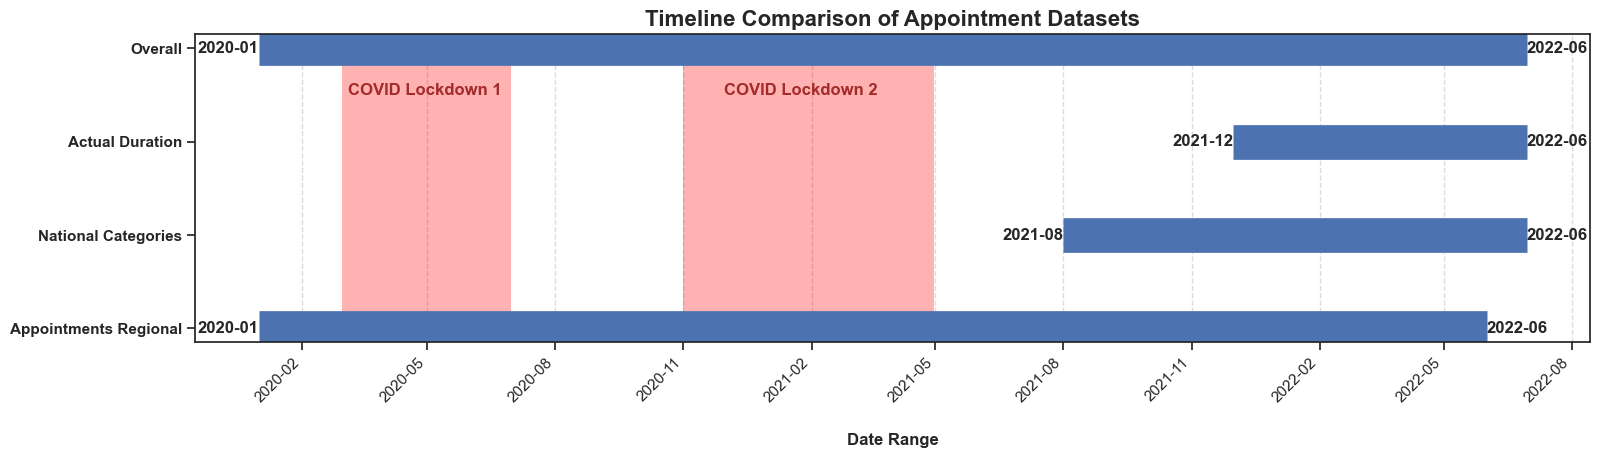

In [48]:
plt.figure(figsize=(18, 4))
sns.set_theme(style="ticks")

# Plot horizontal lines for each dataset
for i, (_, row) in enumerate(date_ranges.iterrows()):
    plt.hlines(i, row['Start Date'], row['End Date'], linewidth=25)
    plt.text(row['Start Date'], i, row['Start Date'].strftime('%Y-%m'), ha='right', va='center', fontweight='bold')
    plt.text(row['End Date'], i, row['End Date'].strftime('%Y-%m'), ha='left', va='center', fontweight='bold')

# Set y-axis labels
plt.yticks(range(len(date_ranges)), date_ranges['Dataset'], fontweight='bold')

# Set x-axis format
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Add shaded areas for the lockdown periods
plt.axvspan(pd.Timestamp('2020-03-01'), pd.Timestamp('2020-06-30'), color='red', alpha=0.3, lw=0)  # First lockdown
plt.axvspan(pd.Timestamp('2020-11-01'), pd.Timestamp('2021-04-30'), color='red', alpha=0.3, lw=0)  # Second lockdown

# Add annotations for the lockdowns
plt.annotate('COVID Lockdown 1', xy=(pd.Timestamp('2020-03-01'), 0.5), 
             xytext=(pd.Timestamp('2020-03-05'), 2.5), 
             fontsize=12, color='brown', fontweight='bold')

plt.annotate('COVID Lockdown 2', xy=(pd.Timestamp('2020-11-05'), 0.5), 
             xytext=(pd.Timestamp('2020-11-30'), 2.5), 
             fontsize=12, color='brown', fontweight='bold')

# Customize the chart
plt.title('Timeline Comparison of Appointment Datasets', fontsize=16, fontweight='bold')
plt.xlabel('Date Range', fontweight='bold', labelpad=20)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

#### 2b. Which service settings reported the most appointments for a specific period?
1. General Practice accounts for 91.5% of all appointments within the 11 month period.
2. All categorical values have already been covered in 1b. 

In [50]:
# Calling and printing service setting results from 1b
nc_result_dfs['service_setting'].style.format({
        'Appointments': my_format, 
        '% of Total': '{:.2f}'
    }).background_gradient(subset=['Appointments', '% of Total'], cmap='BuGn')

####  Q3. What is the number of appointments and records per month?
1. AR and NC monthly aggeregated appointments are matching for the common time period - Aug 2021 to June 2022
2. AR and AD monthly aggregated appointments are matching for the common time period - Dec 2021 to June 2022 with AR filtered for **Attended appointments only**
3. By number of records, all 3 datasets have an almost equal distribution across months.
4. COVID related peaks and falls in the number of appointments are visible when the counts are charted on a monthly graph.
5. Seasonal trends could also be possible (Autumn peaks)

In [52]:
ar_monthlynum = pd.DataFrame(ar_merged.groupby('appointment_month')[['count_of_appointments']].agg(['sum','count'])).reset_index()
ar_monthlynum['dataset'] = 'Appointments Regional'
ad_monthlynum = pd.DataFrame(ad_merged.groupby('appointment_month')[['count_of_appointments']].agg(['sum','count'])).reset_index()
ad_monthlynum['dataset'] = 'Appointments Duration'
nc_monthlynum = pd.DataFrame(nc_merged.groupby('appointment_month')[['count_of_appointments']].agg(['sum','count'])).reset_index()
nc_monthlynum['dataset'] = 'National Categories'

monthly_appts = pd.concat([ar_monthlynum,ad_monthlynum,nc_monthlynum])
monthly_appts['appointment_month'] = monthly_appts['appointment_month'].dt.strftime('%Y-%m')
monthly_appts.columns = ['appointment_month', 'sum_of_appointments', 'count_of_appointments', 'dataset']
monthly_appts

appointment_month  sum_of_appointments  count_of_appointments  \
0            2020-01             27199296                  20889   
1            2020-02             24104621                  20689   
2            2020-03             24053468                  21350   
3            2020-04             16007881                  19124   
4            2020-05             16417212                  18338   
5            2020-06             20690805                  18844   
6            2020-07             22491437                  19502   
7            2020-08             20150520                  19247   
8            2020-09             26714255                  20043   
9            2020-10             28301932                  20122   
10           2020-11             25061602                  19675   
11           2020-12             23535936                  19394   
12           2021-01             22492069                  19319   
13           2021-02             22399569                  18949   
14           2021-03             27225424                  19369   
15           2021-04             23879932                  19452   
16           2021-05             23508395                  19384   
17           2021-06             26784182                  19814   
18           2021-07             25739219                  19899   
19           2021-08             23852171                  19786   
20           2021-09             28522501                  20441   
21           2021-10             30303834                  20562   
22           2021-11             30405070                  20766   
23           2021-12             25140776                  20393   
24           2022-01             25635474                  20225   
25           2022-02             25355260                  20133   
26           2022-03             29595038                  20532   
27           2022-04             23913060                  20073   
28           2022-05             27495508                  20276   
29           2022-06             25828078                  20231   
0            2021-12             22853483                  19507   
1            2022-01             23597196                  19643   
2            2022-02             23351939                  18974   
3            2022-03             27170002                  21236   
4            2022-04             21948814                  19078   
5            2022-05             25343941                  20128   
6            2022-06             23715317                  19227   
0            2021-08             23852171                  69999   
1            2021-09             28522501                  74922   
2            2021-10             30303834                  74078   
3            2021-11             30405070                  77652   
4            2021-12             25140776                  72651   
5            2022-01             25635474                  71896   
6            2022-02             25355260                  71769   
7            2022-03             29595038                  82822   
8            2022-04             23913060                  70012   
9            2022-05             27495508                  77425   
10           2022-06             25828078                  74168   

                  dataset  
0   Appointments Regional  
1   Appointments Regional  
2   Appointments Regional  
3   Appointments Regional  
4   Appointments Regional  
5   Appointments Regional  
6   Appointments Regional  
7   Appointments Regional  
8   Appointments Regional  
9   Appointments Regional  
10  Appointments Regional  
11  Appointments Regional  
12  Appointments Regional  
13  Appointments Regional  
14  Appointments Regional  
15  Appointments Regional  
16  Appointments Regional  
17  Appointments Regional  
18  Appointments Regional  
19  Appointments Regional  
20  Appointments Regional  
21  Appointments Regional  
22  Appointments Regional 

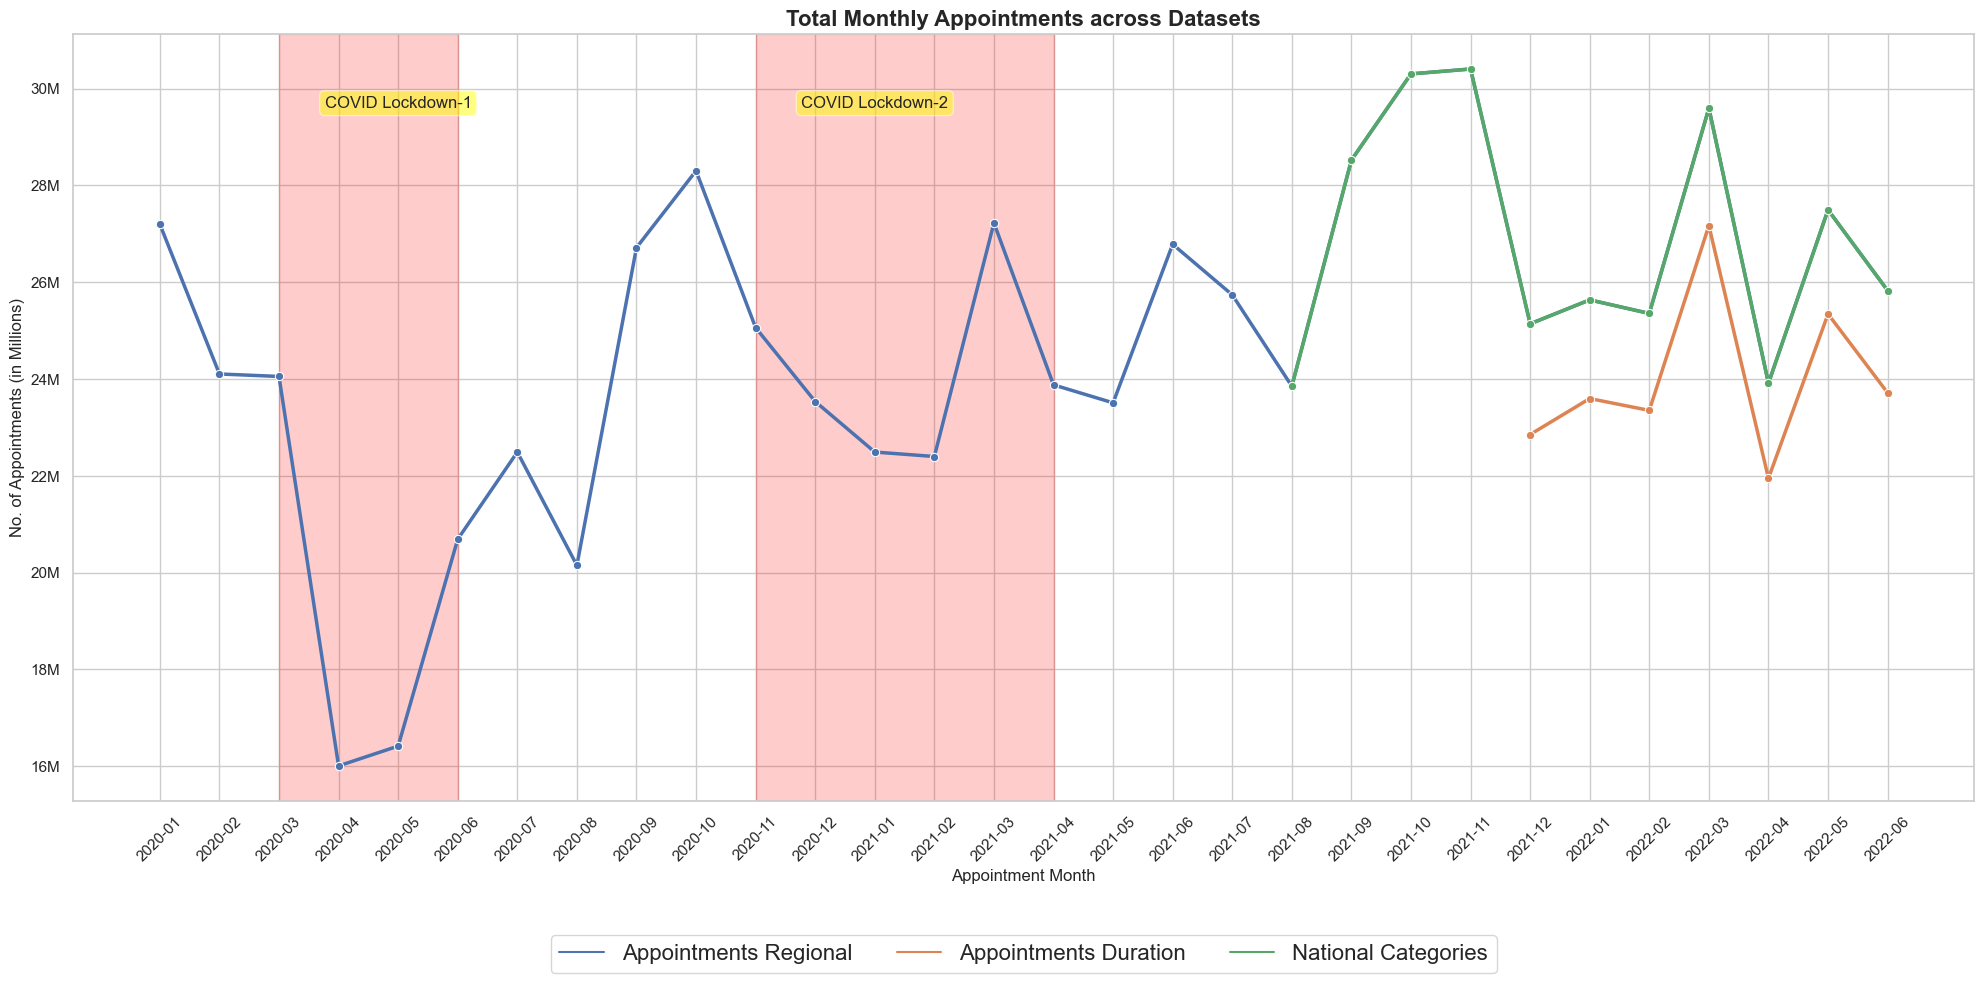

In [53]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 10))

# Create the main plot
sns.lineplot(x='appointment_month', y='sum_of_appointments', hue='dataset', data=monthly_appts, marker='o', linewidth = 2.5)

plt.xlabel('Appointment Month')
plt.ylabel('No. of Appointments (in Millions)')
plt.title('Total Monthly Appointments across Datasets', fontsize=16, fontweight = 'bold')
plt.xticks(rotation=45)
plt.legend(loc='center', bbox_to_anchor=(0.5,-0.2), ncols = 3, fontsize=16)

#loc='upper left', bbox_to_anchor=(1, 1)
# Format y-axis to show in millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))

# Highlight COVID lockdown period
plt.axvspan('2020-03', '2020-06', alpha=0.2, color='red')
plt.axvspan('2020-11', '2021-04', alpha=0.2, color='red')
plt.annotate('COVID Lockdown-1', xy=('2020-05', plt.gca().get_ylim()[1]*0.95), 
             xytext=(0, 10), textcoords='offset points', ha='center', va='top',
             bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.5),
             arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.annotate('COVID Lockdown-2', xy=('2021-01', plt.gca().get_ylim()[1]*0.95), 
             xytext=(0, 10), textcoords='offset points', ha='center', va='top',
             bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.5),
             arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.tight_layout()
plt.show()

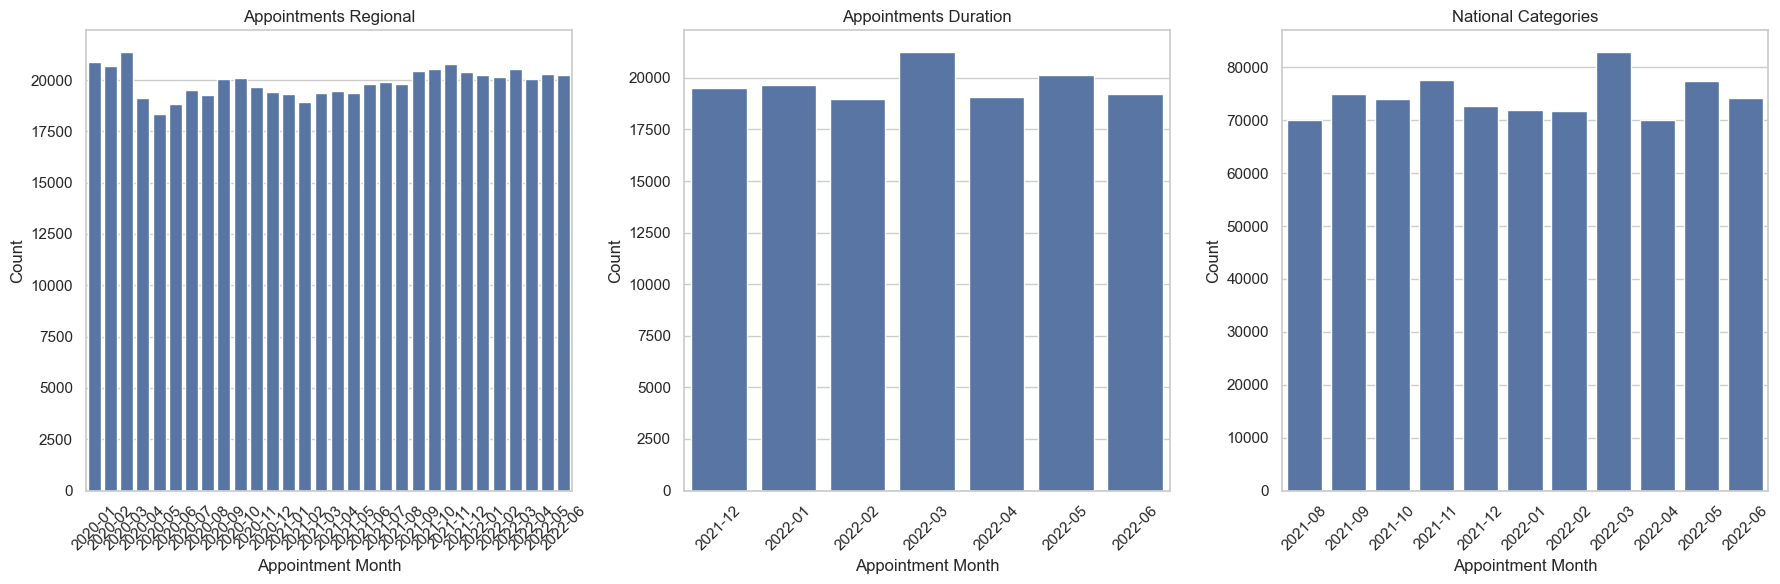

In [54]:
# Create a figure and three subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 'Appointments Regional' on the first subplot
sns.barplot(x='appointment_month', y='count_of_appointments', hue='dataset', data=monthly_appts[monthly_appts['dataset']=='Appointments Regional'], ax=axes[0])
axes[0].set_title('Appointments Regional')
axes[0].set_xlabel('Appointment Month')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation = 45)
axes[0].legend_.remove()

# Plot 'Appointments Duration' on the second subplot
sns.barplot(x='appointment_month', y='count_of_appointments', hue='dataset', data=monthly_appts[monthly_appts['dataset']=='Appointments Duration'], ax=axes[1])
axes[1].set_title('Appointments Duration')
axes[1].set_xlabel('Appointment Month')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation = 45)
axes[1].legend_.remove()

# Plot 'National Categories' on the third subplot
sns.barplot(x='appointment_month', y='count_of_appointments', hue='dataset', data=monthly_appts[monthly_appts['dataset']=='National Categories'], ax=axes[2])
axes[2].set_title('National Categories')
axes[2].set_xlabel('Appointment Month')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation = 45)
axes[2].legend_.remove()

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

#### Q4. What monthly and seasonal trends are evident, based on the number of appointments for service settings, context types, and national categories?

#### 4a. Monthly Trends
**Service Settings**
1. GP Appointments are largest, almost follows Overall monthly appointments trend.
2. Unmapped appointments for Service Settings are reducing from 1.2M in Aug 2021 to 0.7M in June 2022 - Data quality is improving
3. PCN is improving its number of appointments.

**Context Type**
1. Care Related Encounters follow similar to Overall / GP appointments pattern.
2. Unmapped is reduced from 1.2M to 0.7M - Data Quality is improving
3. Inconsistent Mapping is still holding the monthly average - deeper investigation and addressing would be needed.

**National Categories**
1. All Top 5 categories have peaks in Nov 2021 and Mar 2022.
2. Planned Clinics and Planned Clinical procedures peaking in Oct 2021 could be related to COVID.

**Appointment Mode**
1. Face to Face has reduced significantly since pre-COVID days, Telephone has doubled.
2. Online and Home visits form a small and stable subset of appointments
3. Seasonal spikes are visible in both Face to Face and Telephone appointments.

**HCP Type**
Other Practice staff appointments go higher than GP in the Autumnal peaks alone suggesting an annual pattern.

**Time between Booking and Appointment**
COVID wave troughs are not seen in same-day appointments, but spikes are suggesting same day appointments are being over utilized. 

In [57]:
# Change the data type of the appointment month to string to allow for easier plotting.
ad_copy = ad_merged.copy()
ar_copy = ar_merged.copy()
nc_copy = nc_merged.copy()

# Change appointment month column to string format for easier chart creation
ad_copy['appointment_month'] = ad_copy['appointment_month'].astype(str)
ar_copy['appointment_month'] = ar_copy['appointment_month'].astype(str)
nc_copy['appointment_month'] = nc_copy['appointment_month'].astype(str)

##### National Category Dataset - Monthly by Service Settings, Context Types, National Categories

In [59]:
# Dataset creation for charts
#Service setting
nc_ss = nc_copy.groupby(['appointment_month','service_setting']).sum(['count_of_appointments']).reset_index()
# subsets of nc_ss into GP and Other service settings as GP counts are high
gp_service_setting_monthly = (nc_ss[nc_ss['service_setting'] == 'General Practice'])
other_service_setting_monthly = (nc_ss[nc_ss['service_setting']!= 'General Practice'])
print ('\nService Settings Monthly-Sample data')
print (nc_ss.head())

#Context Types
nc_ct = nc_copy.groupby(['appointment_month','context_type']).sum(['count_of_appointments']).reset_index()
cre_context_monthly = (nc_ct[nc_ct['context_type'] == 'Care Related Encounter'])
other_context_monthly = (nc_ct[nc_ct['context_type']!= 'Care Related Encounter'])
print ('\nContext Type Monthly-Sample data')
print (nc_ct.head())

#National Category
nc_nct = nc_copy.groupby(['appointment_month','national_category']).sum(['count_of_appointments']).reset_index()
# subset of nc_nct without inconsistent mapping to view true top 5 national categories
nc_nct1 = nc_nct[nc_nct['national_category']!='Inconsistent Mapping']
print ('\nNational Category Monthly-Sample data')
print (nc_nct.head())


Service Settings Monthly-Sample data
  appointment_month            service_setting  count_of_appointments
0        2021-08-01  Extended Access Provision                 160927
1        2021-08-01           General Practice               21575852
2        2021-08-01                      Other                 449101
3        2021-08-01       Primary Care Network                 432448
4        2021-08-01                   Unmapped                1233843

Context Type Monthly-Sample data
  appointment_month            context_type  count_of_appointments
0        2021-08-01  Care Related Encounter               20255235
1        2021-08-01    Inconsistent Mapping                2363093
2        2021-08-01                Unmapped                1233843
3        2021-09-01  Care Related Encounter               24404251
4        2021-09-01    Inconsistent Mapping                2782135

National Category Monthly-Sample data
  appointment_month                                  national_categ

C:\Users\sujit\AppData\Local\Temp\ipykernel_57152\903314300.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(ylabels)


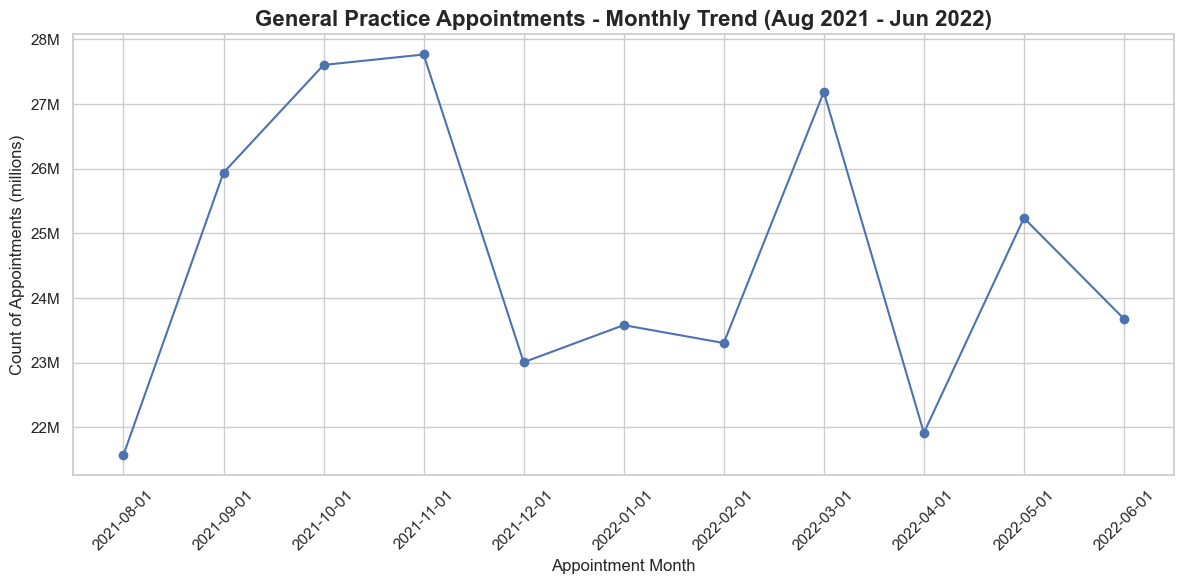

C:\Users\sujit\AppData\Local\Temp\ipykernel_57152\903314300.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(ylabels)


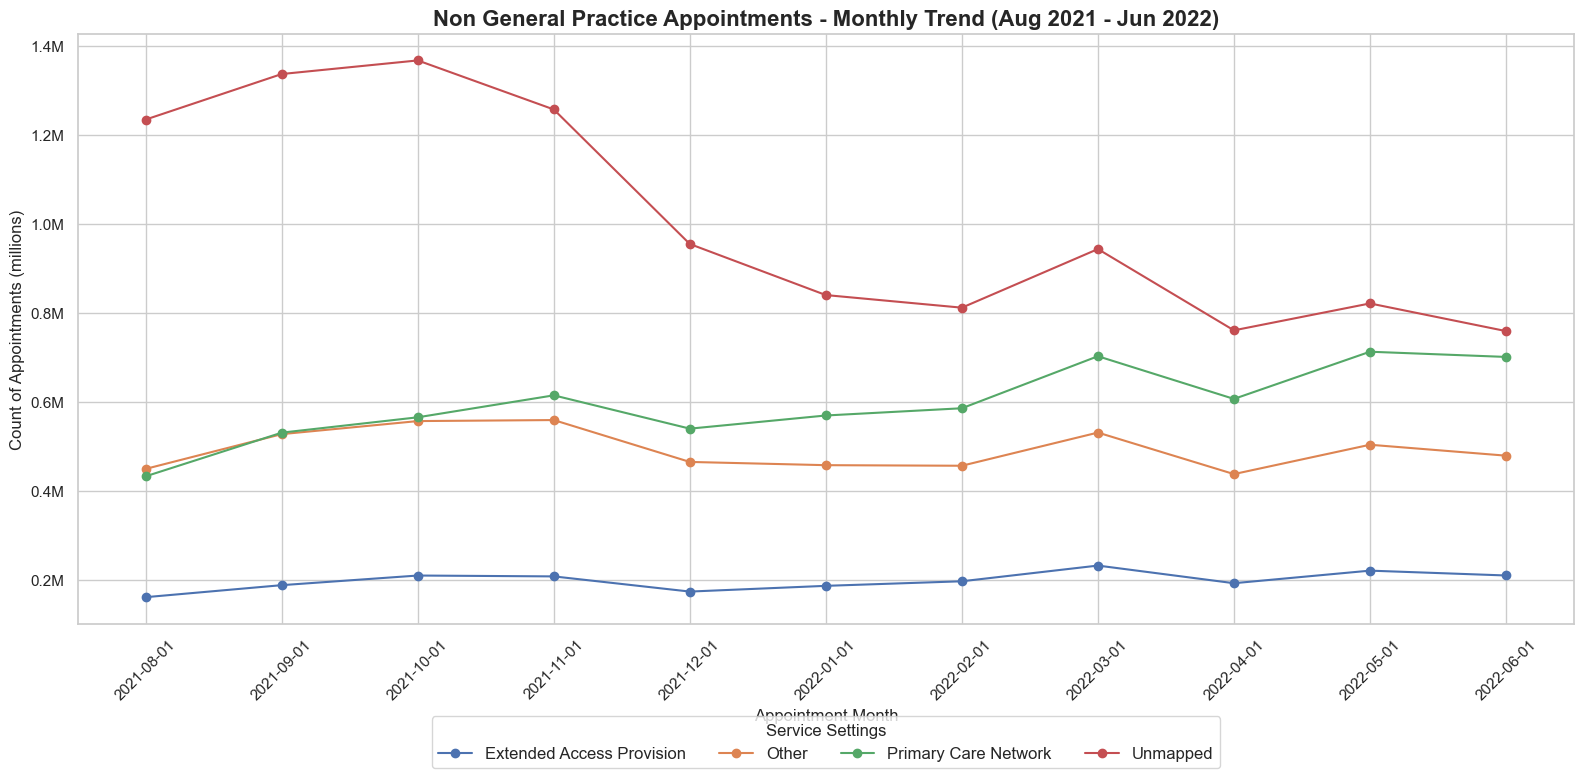

C:\Users\sujit\AppData\Local\Temp\ipykernel_57152\903314300.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(ylabels)


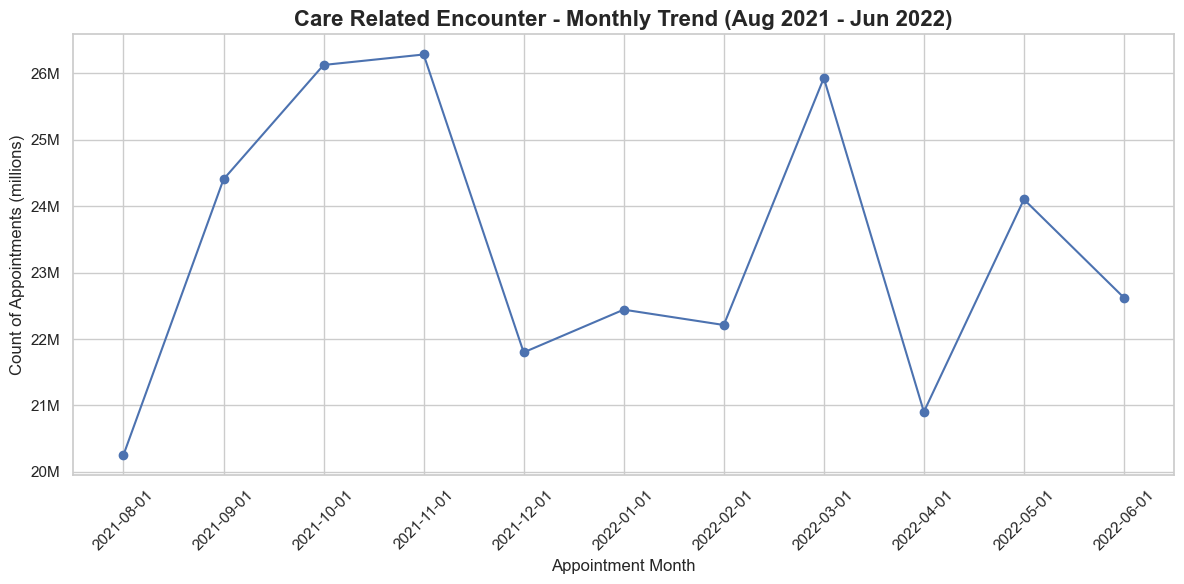

C:\Users\sujit\AppData\Local\Temp\ipykernel_57152\903314300.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(ylabels)


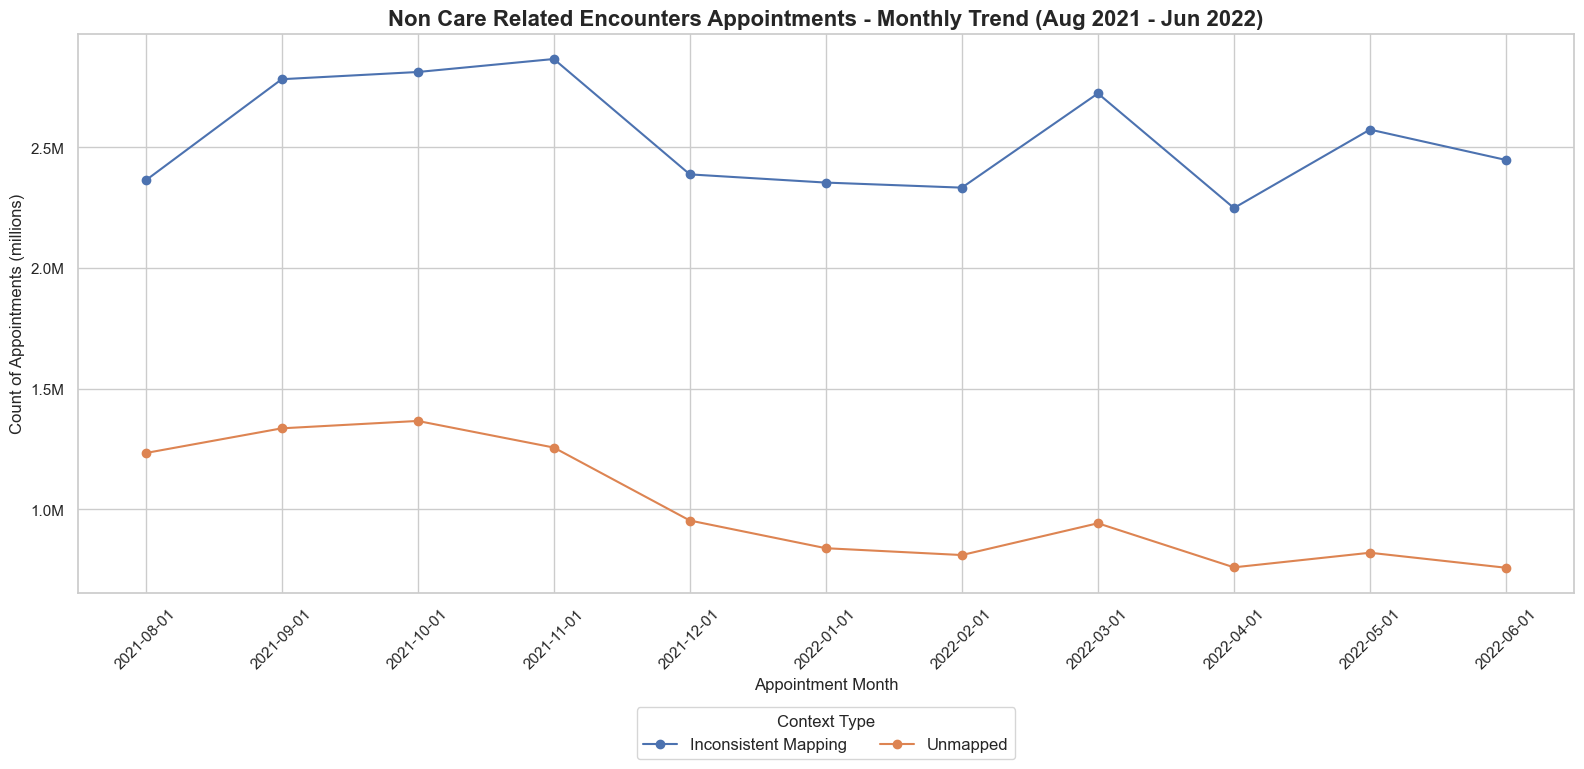

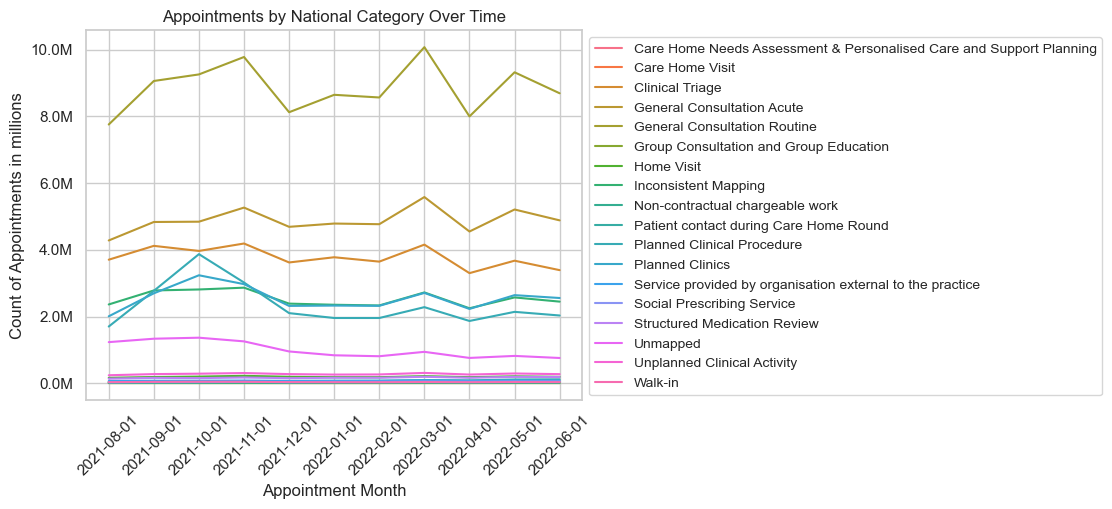

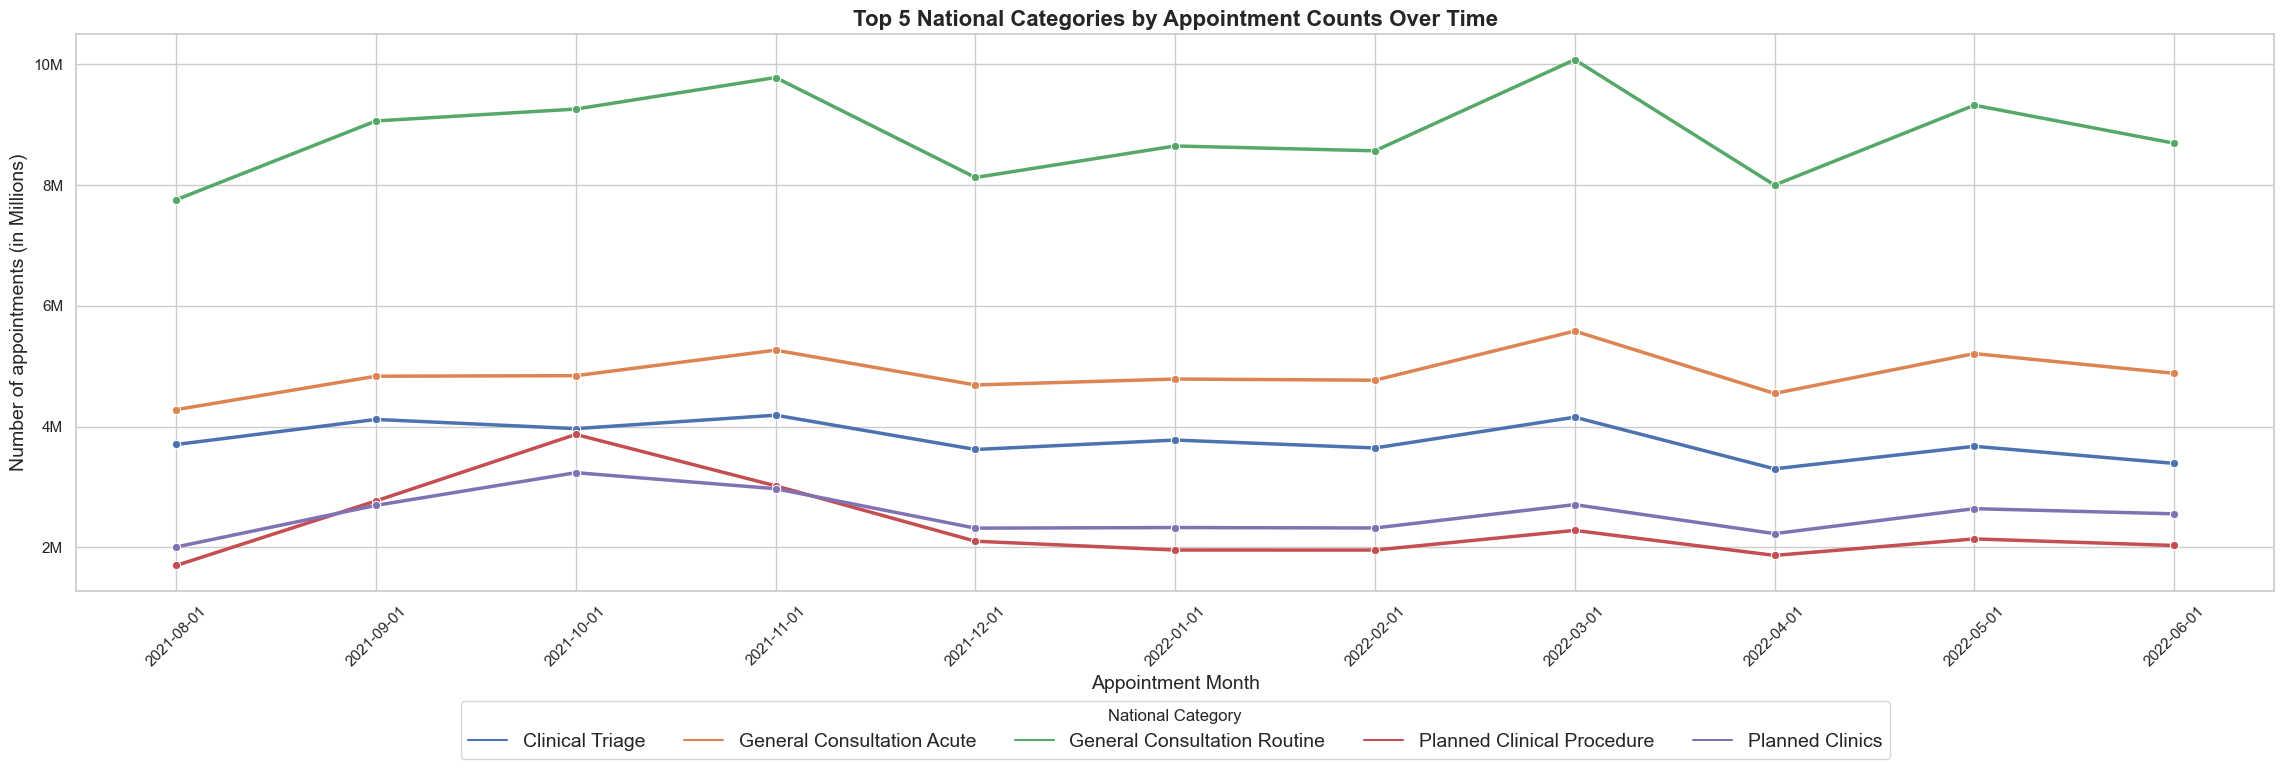

In [60]:
# ---  Monthly appointments - Lineplot for  General Practice Service Setting (As the values are very high) ---
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.set_style("whitegrid")
ax.plot(gp_service_setting_monthly['appointment_month'], 
          gp_service_setting_monthly['count_of_appointments'], 
          marker='o')
ax.set_title('General Practice Appointments - Monthly Trend (Aug 2021 - Jun 2022)', fontsize=16, fontweight= 'bold')
ax.set_xlabel('Appointment Month', fontsize=12)
ax.set_ylabel('Count of Appointments (millions)', fontsize=12)
plt.xticks(rotation=45)
ax.ticklabel_format(style='plain', axis='y')
ylabels = [f'{x/1e6:.0f}M' for x in plt.gca().get_yticks()]
plt.gca().set_yticklabels(ylabels)
plt.tight_layout()
plt.show()

# ---  Monthly appointments - Lineplot for NON General Practice Service Setting (All except GP) ---
fig, ax = plt.subplots(figsize=(16, 8))
sns.set_style("whitegrid")

service_settings = ['Extended Access Provision', 'Primary Care Network', 'Unmapped', 'Other']

for setting in other_service_setting_monthly['service_setting'].unique():
    data = other_service_setting_monthly[other_service_setting_monthly['service_setting'] == setting]
    ax.plot(data['appointment_month'], data['count_of_appointments'], 
               marker='o', label=setting)
ax.set_title('Non General Practice Appointments - Monthly Trend (Aug 2021 - Jun 2022)', fontsize=16, fontweight= 'bold')
ax.set_xlabel('Appointment Month', fontsize = 12)
plt.xticks(rotation=45)
ax.set_ylabel('Count of Appointments (millions)',fontsize = 12)
ax.legend(title='Service Settings', title_fontsize='12', fontsize='12', 
             loc='center', ncols = 4, bbox_to_anchor=(0.5, - 0.2
                                                     ))
ylabels = [f'{x/1e6:.1f}M' for x in plt.gca().get_yticks()]
plt.gca().set_yticklabels(ylabels)
plt.tight_layout()
plt.show()

# ---  Monthly appointments - Lineplot: 'Care Related Encounter' Context Type ---
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.set_style("whitegrid")
ax.plot(cre_context_monthly['appointment_month'], 
          cre_context_monthly['count_of_appointments'], 
          marker='o')
ax.set_title('Care Related Encounter - Monthly Trend (Aug 2021 - Jun 2022)', fontsize=16, fontweight= 'bold')
ax.set_xlabel('Appointment Month', fontsize=12)
ax.set_ylabel('Count of Appointments (millions)', fontsize=12)
plt.xticks(rotation=45)
ax.ticklabel_format(style='plain', axis='y')
ylabels = [f'{x/1e6:.0f}M' for x in plt.gca().get_yticks()]
plt.gca().set_yticklabels(ylabels)
plt.tight_layout()
plt.show()

# ---  Monthly appointments - Lineplot: Non 'Care Related Encounter' Context Type --- 
fig, ax = plt.subplots(figsize=(16, 8))
sns.set_style("whitegrid")

context_types = ['Inconsistent Mapping', 'Unmapped']

for setting in other_context_monthly['context_type'].unique():
    data = other_context_monthly[other_context_monthly['context_type'] == setting]
    ax.plot(data['appointment_month'], data['count_of_appointments'], 
               marker='o', label=setting)
ax.set_title('Non Care Related Encounters Appointments - Monthly Trend (Aug 2021 - Jun 2022)', fontsize=16, fontweight= 'bold')
ax.set_xlabel('Appointment Month', fontsize = 12)
plt.xticks(rotation=45)
ax.set_ylabel('Count of Appointments (millions)',fontsize = 12)
ax.legend(title='Context Type', title_fontsize='12', fontsize='12', 
             loc='center', ncols = 2, bbox_to_anchor=(0.5, - 0.25
                                                     ))
ylabels = [f'{x/1e6:.1f}M' for x in plt.gca().get_yticks()]
plt.gca().set_yticklabels(ylabels)
plt.tight_layout()
plt.show()

# ---  Monthly appointments - Lineplot: National Categories: All--- 
sns.lineplot(data = nc_nct, y='count_of_appointments',x='appointment_month',hue = 'national_category')
plt.title('Appointments by National Category Over Time')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.xlabel('Appointment Month')
plt.ylabel('Count of Appointments in millions')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))
plt.show()

# ---  Monthly appointments - Lineplot: Top 5 National Categories --- 
category_totals = nc_nct1.groupby('national_category')['count_of_appointments'].sum().sort_values(ascending=False)
# Get the top 5 national categories
top_5_categories = category_totals.head(5).index
# Filter the original dataframe for the top 5 categories
filtered_data = nc_nct1[nc_nct1['national_category'].isin(top_5_categories)]

# Plot the line plot for top 5 national categories over time
plt.figure(figsize=(23,8))
sns.lineplot(data=filtered_data, x='appointment_month', y='count_of_appointments', hue='national_category', linewidth = 2.5, marker='o')
plt.title('Top 5 National Categories by Appointment Counts Over Time', fontsize = 16, fontweight = 'bold')
plt.xlabel('Appointment Month', fontsize = 14)
plt.legend(title = 'National Category',loc='center', bbox_to_anchor=(0.5, - 0.25),fontsize='14', ncols = 5)
plt.ylabel('Number of appointments (in Millions)',fontsize = 14)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Appointments Regional and Actual Duration Categories - Appointment Mode, HealthCare Professional, Time between booking and appointment, Actual Duration

In [62]:
#Dataset creation for charts
#Appointment Mode
appt_modes_monthly = ar_copy.groupby(['appointment_month','appointment_mode']).sum('count_of_appointments').reset_index()

#HealthCare Professional
hcp_monthly = ar_copy.groupby(['appointment_month','hcp_type']).sum('count_of_appointments').reset_index()

#HealthCare Professional
monthly_bookingtime =ar_copy.groupby(['time_between_book_and_appointment','appointment_month']).sum('count_of_appointments').reset_index()
monthly_bookingtime = monthly_bookingtime[monthly_bookingtime['time_between_book_and_appointment']!='Unknown / Data Quality']

#Actual Duration
ad_monthly = ad_copy.groupby(['appointment_month','actual_duration']).sum('count_of_appointments').reset_index()

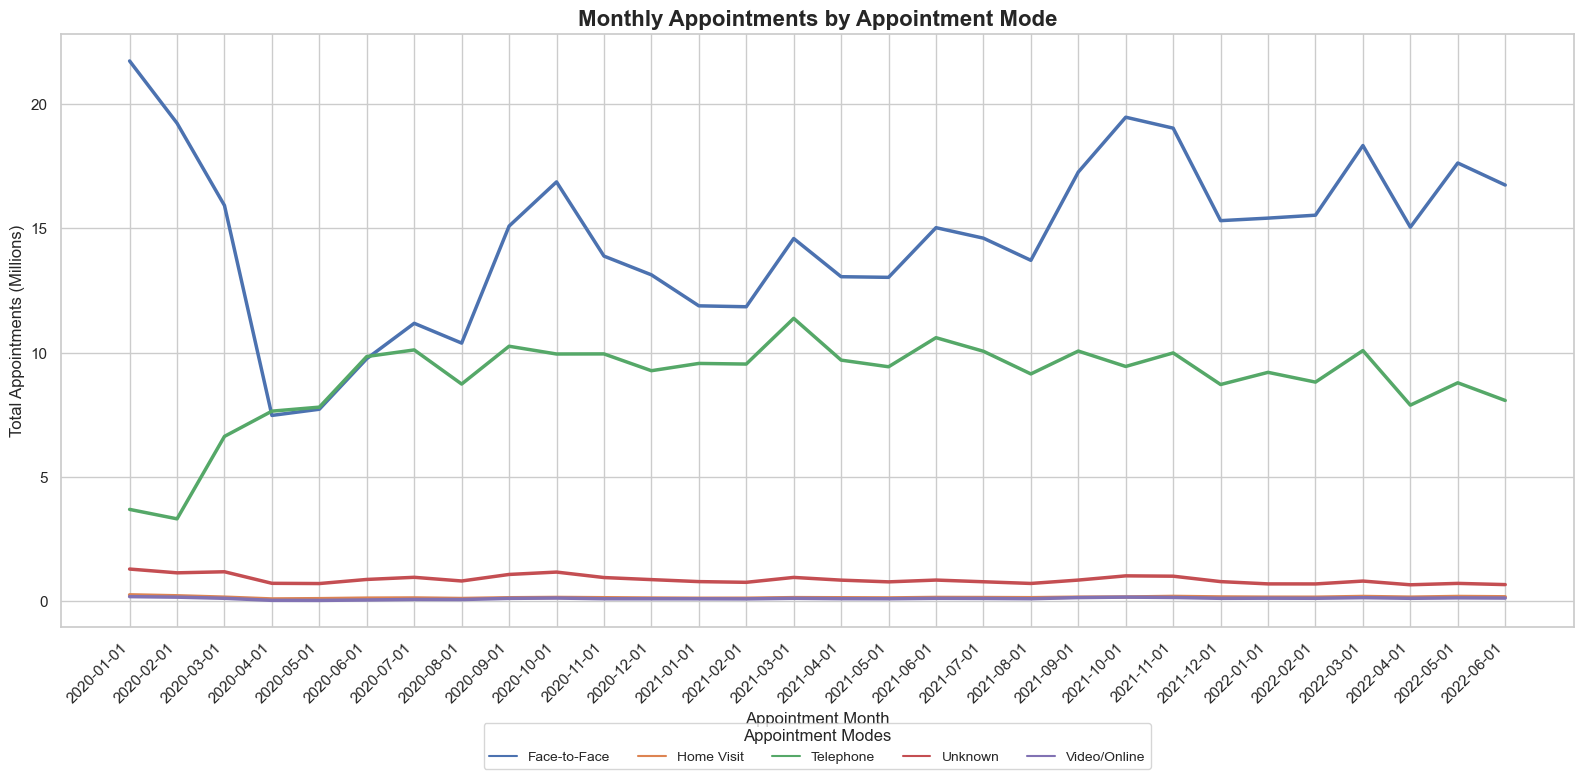

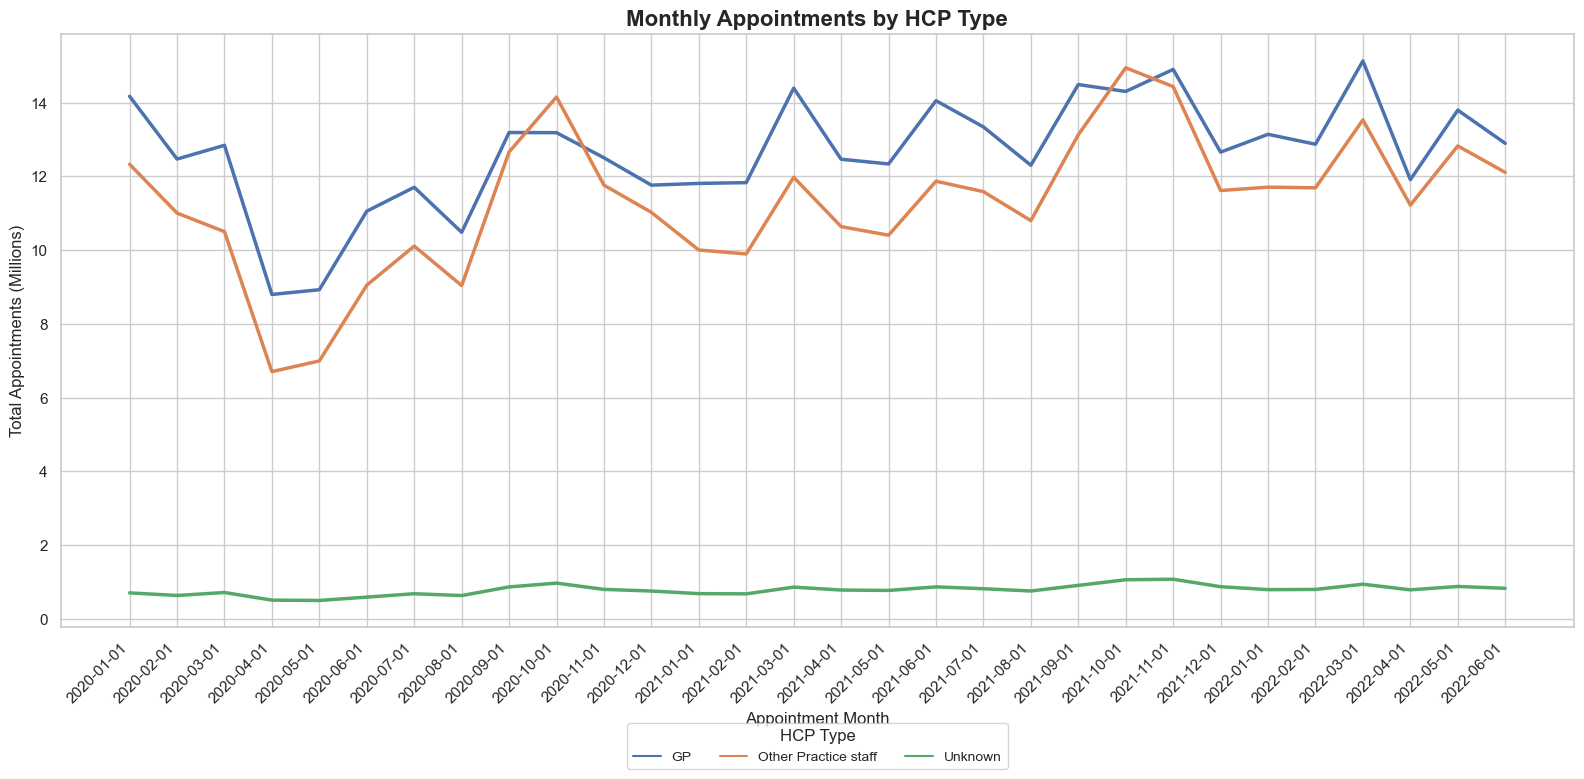

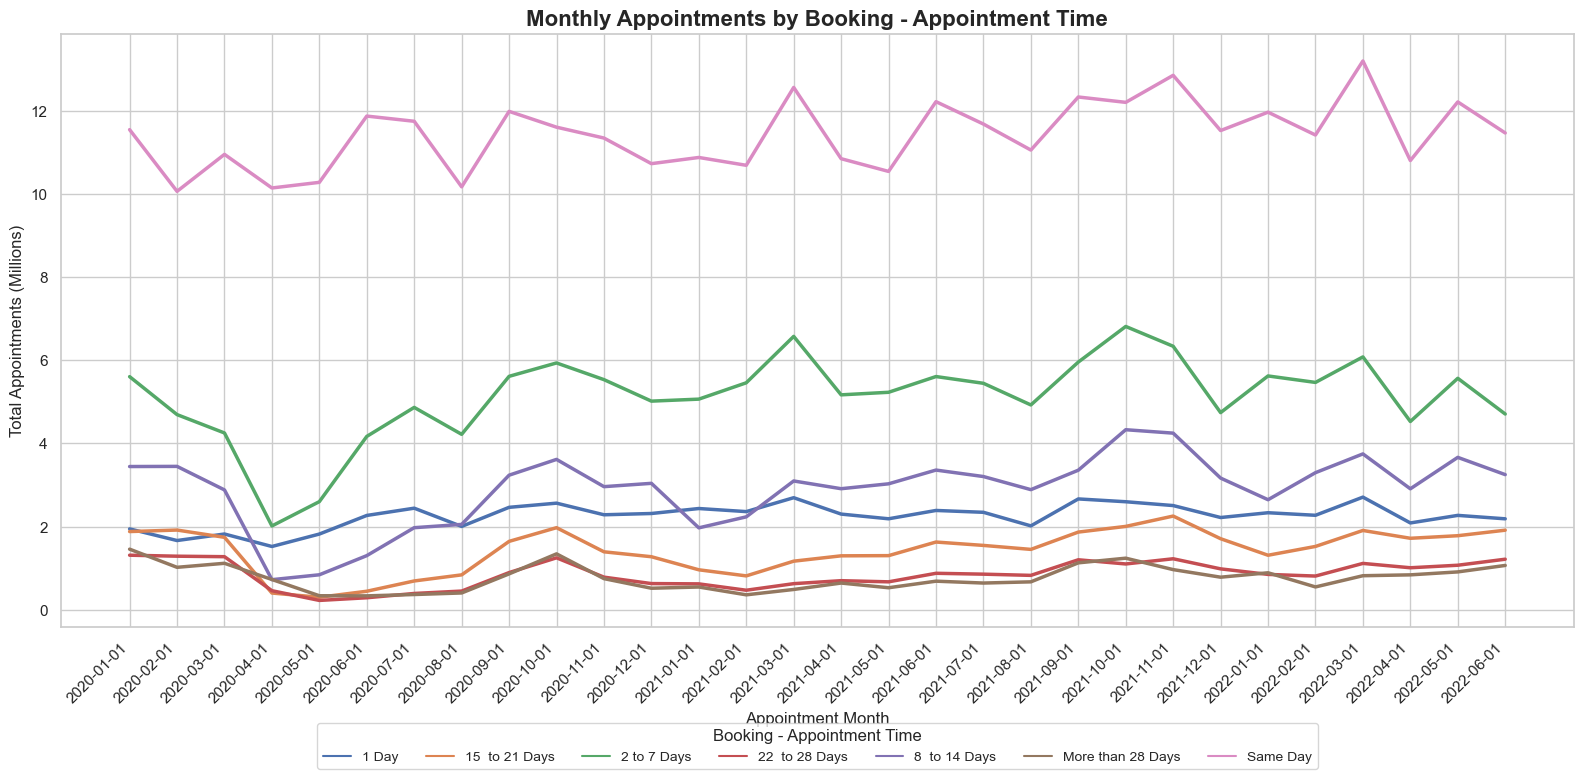

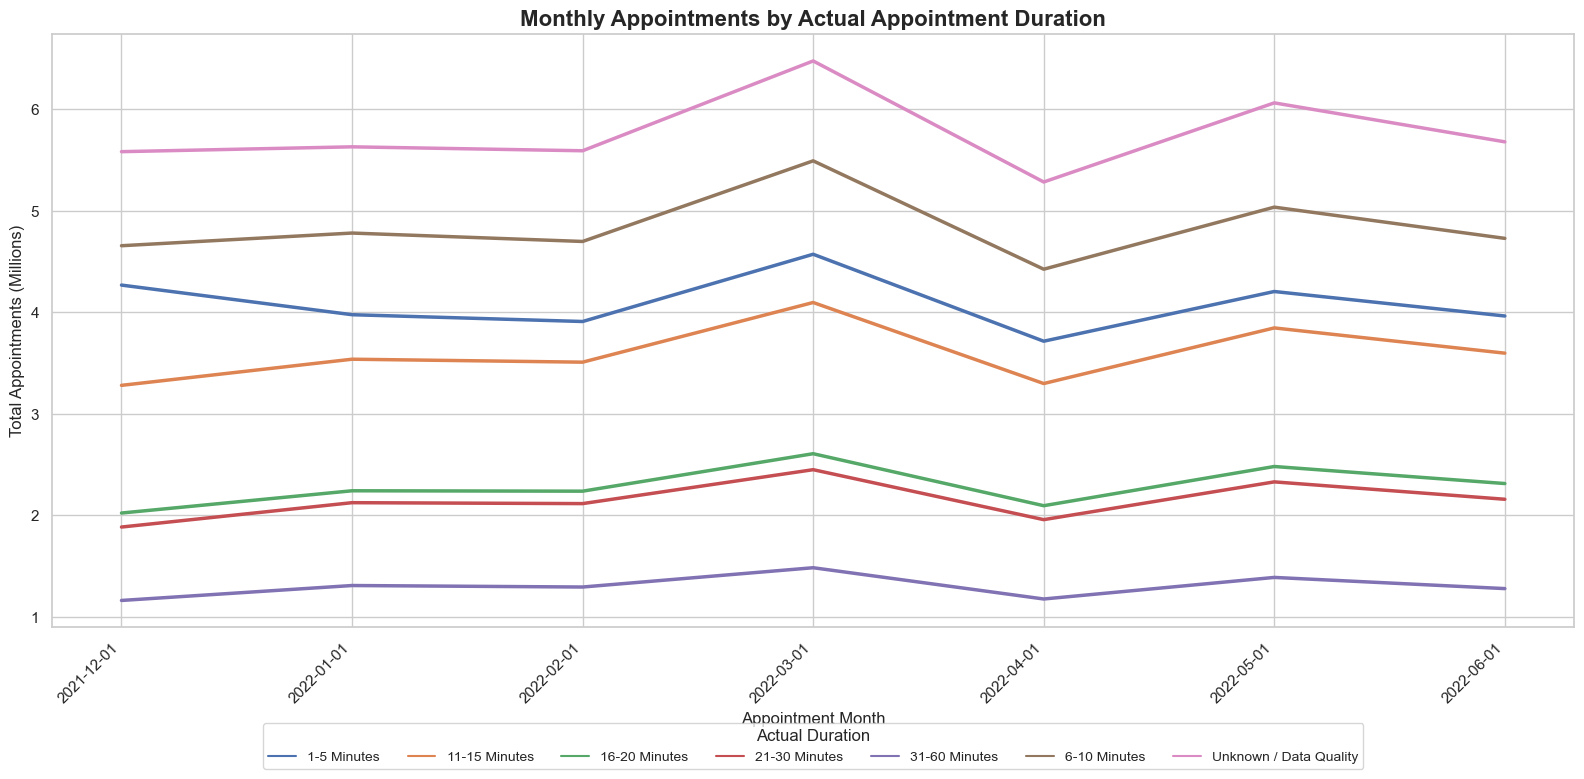

In [63]:
# --- Monthly appointments - Lineplot by Appointment mode ---
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")
sns.lineplot(data= appt_modes_monthly,x='appointment_month',y='count_of_appointments',hue='appointment_mode',errorbar=None, linewidth = 2.5)
plt.title('Monthly Appointments by Appointment Mode', fontsize=16, fontweight= 'bold')
plt.xlabel('Appointment Month', fontsize=12)
plt.ylabel('Total Appointments (Millions)', fontsize=12)
plt.legend(title = 'Appointment Modes',loc='center', bbox_to_anchor=(0.5,-0.2), ncols = 5, fontsize='small')
plt.xticks(rotation=45, ha='right')
# Format y-axis to show thousands
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x/1e6), ',')))
plt.tight_layout()
plt.show()

# --- Monthly appointments - Lineplot by HCP Type ---
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")
sns.lineplot(data= hcp_monthly,x='appointment_month',y='count_of_appointments',hue='hcp_type',errorbar=None, linewidth = 2.5)
plt.title('Monthly Appointments by HCP Type', fontsize=16, fontweight= 'bold')
plt.xlabel('Appointment Month', fontsize=12)
plt.ylabel('Total Appointments (Millions)', fontsize=12)
plt.legend(title = 'HCP Type',loc='center', bbox_to_anchor=(0.5,-0.2), ncols = 3, fontsize='small')
plt.xticks(rotation=45, ha='right')
# Format y-axis to show thousands
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x/1e6), ',')))
plt.tight_layout()
plt.show()

# --- Monthly appointments - Lineplot by Booking - Appointment Time ---
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")
sns.lineplot(data= monthly_bookingtime,x='appointment_month',y='count_of_appointments',hue='time_between_book_and_appointment',errorbar=None, linewidth = 2.5)
plt.title('Monthly Appointments by Booking - Appointment Time', fontsize=16,fontweight= 'bold')
plt.xlabel('Appointment Month', fontsize=12)
plt.ylabel('Total Appointments (Millions)', fontsize=12)
plt.legend(title = 'Booking - Appointment Time',loc='center', bbox_to_anchor=(0.5,-0.2), ncols = 8, fontsize='small')
plt.xticks(rotation=45, ha='right')
# Format y-axis to show thousands
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x/1e6), ',')))
plt.tight_layout()
plt.show()

# --- Monthly appointments - Lineplot by Booking - Actual Duration ---
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")
sns.lineplot(data= ad_monthly,x='appointment_month',y='count_of_appointments',hue='actual_duration',errorbar=None, linewidth = 2.5)
plt.title('Monthly Appointments by Actual Appointment Duration', fontsize=16,fontweight= 'bold')
plt.xlabel('Appointment Month', fontsize=12)
plt.ylabel('Total Appointments (Millions)', fontsize=12)
plt.legend(title = 'Actual Duration',loc='center', bbox_to_anchor=(0.5,-0.2), ncols = 8, fontsize='small')
plt.xticks(rotation=45, ha='right')
# Format y-axis to show thousands
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x/1e6), ',')))
plt.tight_layout()
plt.show()

#### 4b. Seasonal Trends
**Patterns are similar to Monthly trends - Repetition in peaks seem to follow COVID lockdowns and not seasons.**

In [65]:
# Define a function to assign seasons based on the appointment_date
def assign_season(row):
    year = row.year
    month = row.month
    if month in [12, 1, 2]:  # Dec, Jan, Feb
        if month == 12:
            return f'Winter {year}'  # December is part of Winter of the current year
        else:
            return f'Winter {year-1}'  # January and February belong to the previous year
    elif month in [3, 4, 5]:  # Mar, Apr, May
        return f'Spring {year}'
    elif month in [6, 7, 8]:  # Jun, Jul, Aug
        return f'Summer {year}'
    elif month in [9, 10, 11]:  # Sep, Oct, Nov
        return f'Autumn {year}'

#Creating copies of AR and NC datasets to explore seasonal trends. 
ar_season = ar_merged.copy()
nc_season = nc_merged.copy()

#Adding season column to the copied datasets by applying defined custom function
ar_season['season'] = ar_season['appointment_month'].apply(assign_season)
nc_season ['season']= nc_season['appointment_month'].apply(assign_season)

#Defining season order (otherwise groupbys orders alphabetically)
season_order = ['Winter 2019', 'Spring 2020', 'Summer 2020', 'Autumn 2020',
                'Winter 2020', 'Spring 2021', 'Summer 2021', 'Autumn 2021',
                'Winter 2021', 'Spring 2022', 'Summer 2022']

# Convert the season column to a categorical type with the defined order
ar_season['season'] = pd.Categorical(ar_season['season'], categories=season_order, ordered=True)
nc_season['season'] = pd.Categorical(nc_season['season'], categories=season_order, ordered=True)

##### AR Dataset - Seasonal trends (Jan 2020- Jun 2022)

In [67]:
ar_season_appts = ar_season.groupby(['season']).sum('count_of_appointments').reset_index()
# Removing Winter 2019 and Summer 2022 as the seasons have only 1 month data
ar_season_appts = ar_season_appts[ar_season_appts['season']!='Summer 2022']
ar_season_appts = ar_season_appts[ar_season_appts['season']!='Winter 2019']
ar_season_appts

season  count_of_appointments
1  Spring 2020               56478561
2  Summer 2020               63332762
3  Autumn 2020               80077789
4  Winter 2020               68427574
5  Spring 2021               74613751
6  Summer 2021               76375572
7  Autumn 2021               89231405
8  Winter 2021               76131510
9  Spring 2022               81003606

In [68]:
# Groupby Season and AR categorical columns
ar_season_status = ar_season.groupby(['season','appointment_status']).sum('count_of_appointments').reset_index()
ar_season_status = ar_season_status[ar_season_status['season']!='Summer 2022']
ar_season_status = ar_season_status[ar_season_status['season']!='Winter 2019']

ar_season_mode = ar_season.groupby(['season','appointment_mode']).sum('count_of_appointments').reset_index()
ar_season_mode = ar_season_mode[ar_season_mode['season']!='Summer 2022']
ar_season_mode = ar_season_mode[ar_season_mode['season']!='Winter 2019']

ar_season_region = ar_season.groupby(['region_name','season']).sum('count_of_appointments').reset_index()
ar_season_region = ar_season_region[ar_season_region['season']!='Summer 2022']
ar_season_region = ar_season_region[ar_season_region['season']!='Winter 2019']

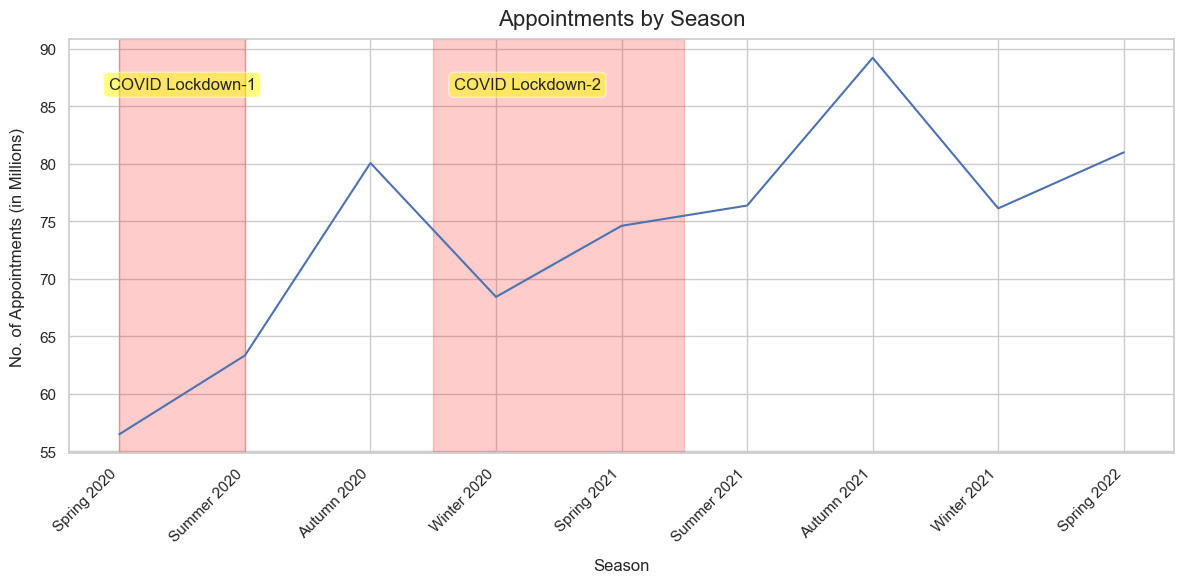

In [69]:
# Lineplot for Appointments by Season
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=ar_season_appts,x='season',y='count_of_appointments')
# Customize the plot
ax.set_title('Appointments by Season', fontsize=16, pad=10)
ax.set_xlabel('Season', fontsize=12, labelpad=10)
ax.set_ylabel('No. of Appointments (in Millions)', fontsize=12, labelpad=10)
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x/1e6), ',')))

# Highlight COVID lockdown period
plt.axvspan('Spring 2020','Summer 2020', alpha=0.2, color='red')
plt.axvspan(3.5, 5.5, alpha=0.2, color='red')
# Highlight COVID lockdown period 1- '2020-03', '2020-06'
plt.annotate('COVID Lockdown-1', xy=(1.5, plt.gca().get_ylim()[1]*0.95), 
             xytext=(0, 10), textcoords='offset points', ha='center', va='top',
             bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.5),
             arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
# Highlight COVID lockdown period 2 - 2020-11, '2021-04'
plt.annotate('COVID Lockdown-2', xy=(4.25, plt.gca().get_ylim()[1]*0.95), 
             xytext=(0, 10), textcoords='offset points', ha='center', va='top',
             bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.5),
             arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.tight_layout()
# Show the plot
plt.show()

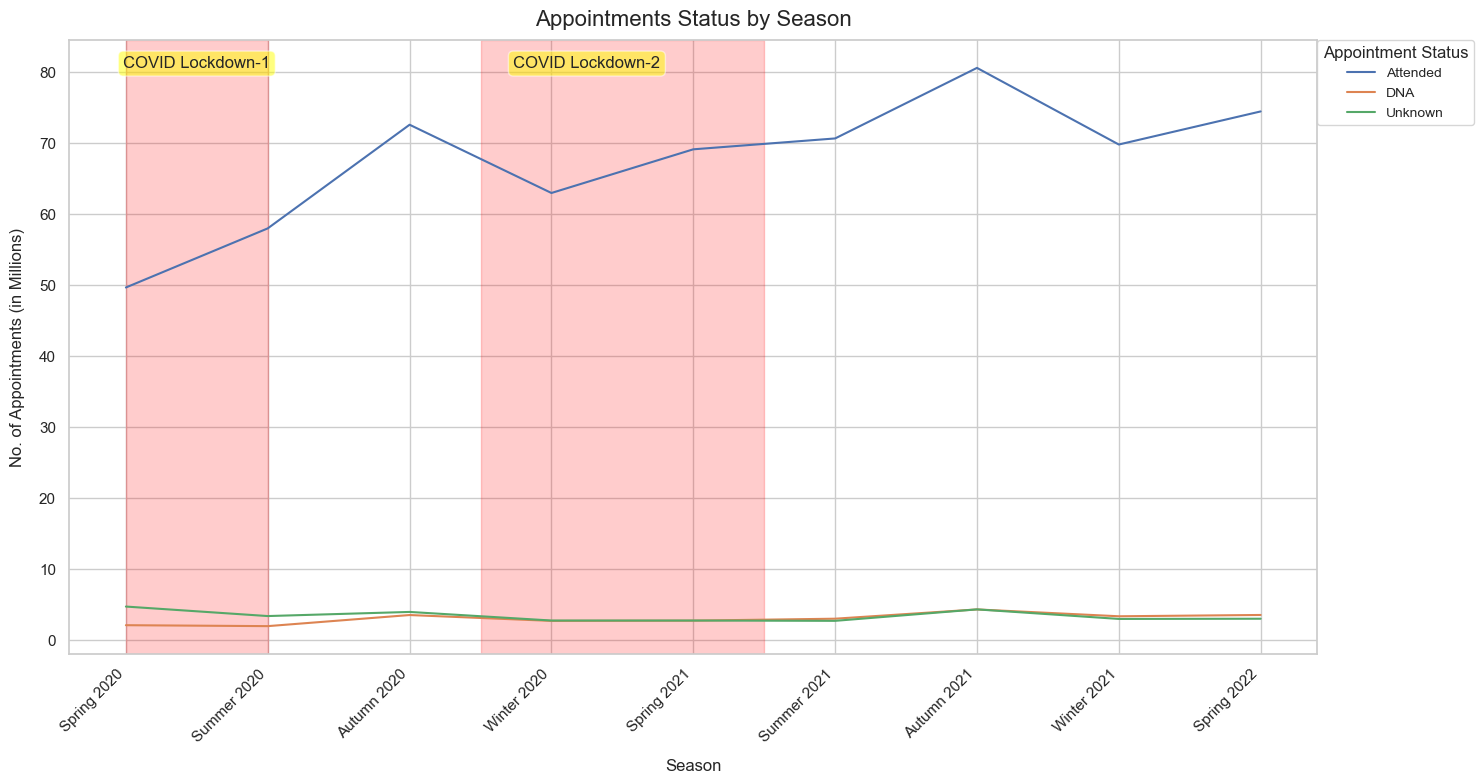

In [70]:
#Lineplot for Seasonal appointments by Appointment Status
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(data=ar_season_status,x='season',y='count_of_appointments',hue = 'appointment_status')
# Customize the plot
ax.set_title('Appointments Status by Season', fontsize=16, pad=10)
ax.set_xlabel('Season', fontsize=12, labelpad=10)
ax.set_ylabel('No. of Appointments (in Millions)', fontsize=12, labelpad=10)
plt.legend(title ='Appointment Status',bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0., fontsize = 10)
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x/1e6), ',')))
# Adjust layout to prevent cutting off labels
# Highlight COVID lockdown period
plt.axvspan('Spring 2020','Summer 2020', alpha=0.2, color='red')
plt.axvspan(3.5, 5.5, alpha=0.2, color='red')
plt.annotate('COVID Lockdown-1', xy=(1.5, plt.gca().get_ylim()[1]*0.95), 
             xytext=(0, 10), textcoords='offset points', ha='center', va='top',
             bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.5),
             arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.annotate('COVID Lockdown-2', xy=(4.25, plt.gca().get_ylim()[1]*0.95), 
             xytext=(0, 10), textcoords='offset points', ha='center', va='top',
             bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.5),
             arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.tight_layout()

# Show the plot
plt.show()

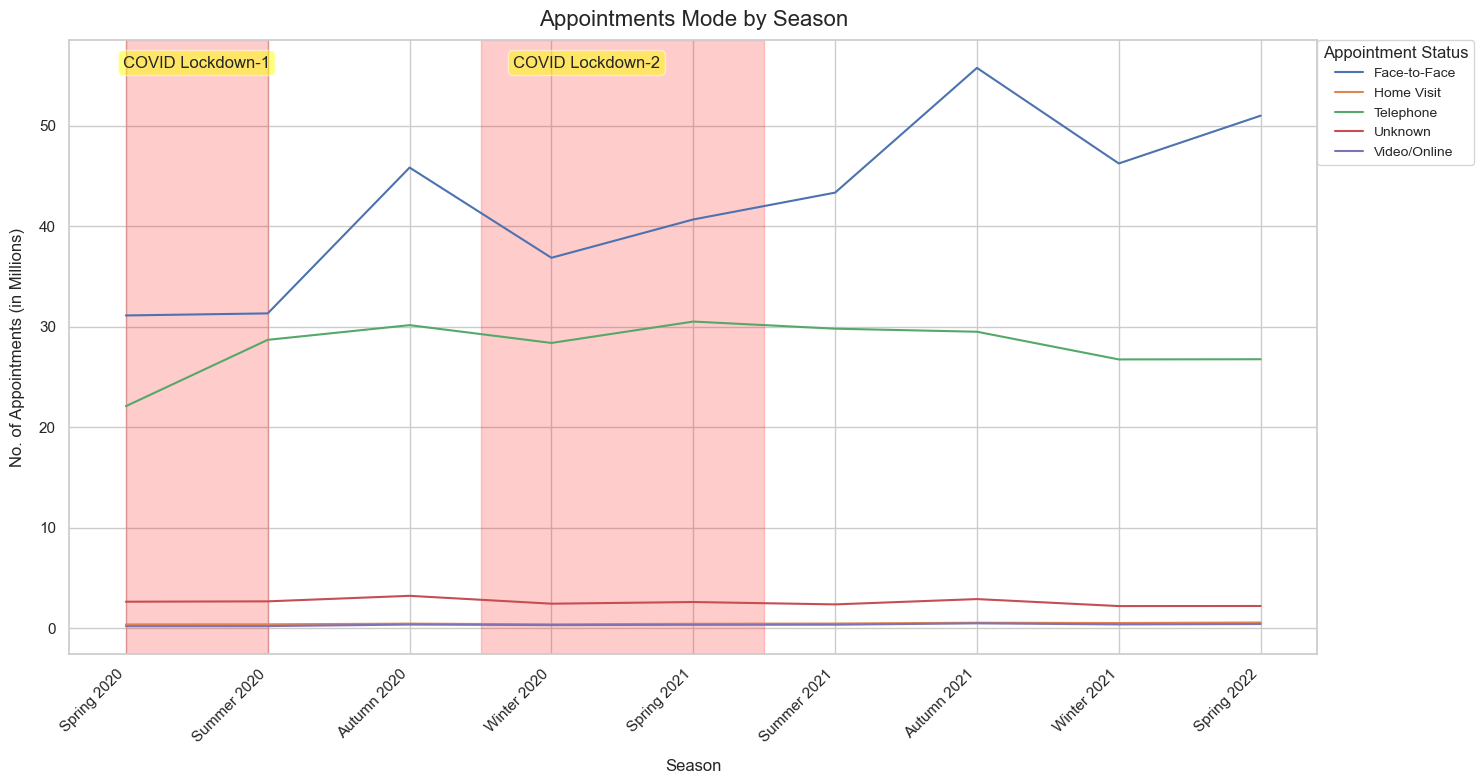

In [71]:
#Lineplot for Seasonal appointments by Appointment Mode
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(data=ar_season_mode,x='season',y='count_of_appointments',hue = 'appointment_mode')
# Customize the plot
ax.set_title('Appointments Mode by Season', fontsize=16, pad=10)
ax.set_xlabel('Season', fontsize=12, labelpad=10)
ax.set_ylabel('No. of Appointments (in Millions)', fontsize=12, labelpad=10)
plt.legend(title ='Appointment Status',bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0., fontsize = 10)
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x/1e6), ',')))

# Highlight COVID lockdown period
plt.axvspan('Spring 2020','Summer 2020', alpha=0.2, color='red')
plt.axvspan(3.5, 5.5, alpha=0.2, color='red')
plt.annotate('COVID Lockdown-1', xy=(1.5, plt.gca().get_ylim()[1]*0.95), 
             xytext=(0, 10), textcoords='offset points', ha='center', va='top',
             bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.5),
             arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.annotate('COVID Lockdown-2', xy=(4.25, plt.gca().get_ylim()[1]*0.95), 
             xytext=(0, 10), textcoords='offset points', ha='center', va='top',
             bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.5),
             arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.tight_layout()

# Show the plot
plt.show()

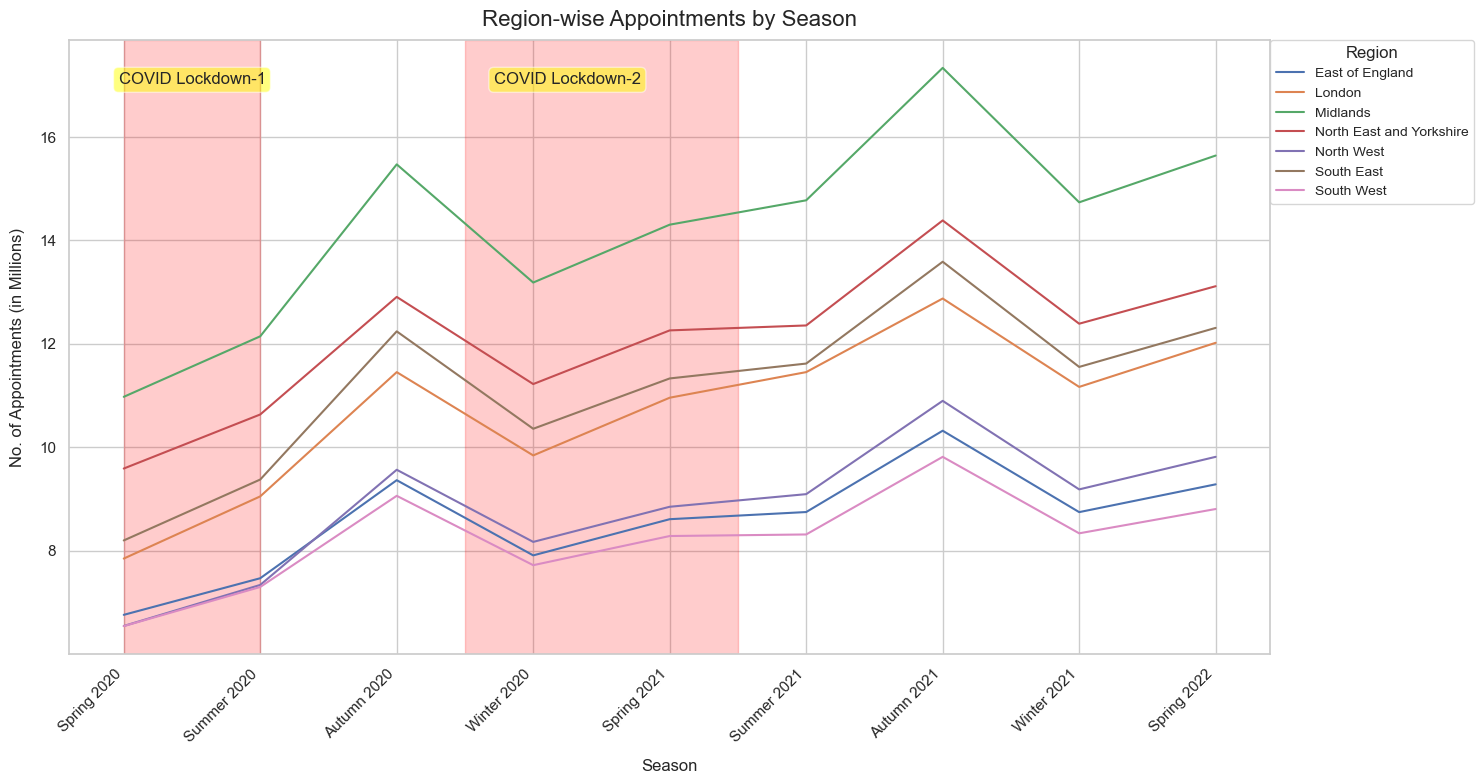

In [72]:
#Lineplot for Seasonal appointments by Region
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(data=ar_season_region,x='season',y='count_of_appointments',hue = 'region_name')
# Customize the plot
ax.set_title('Region-wise Appointments by Season', fontsize=16, pad=10)
ax.set_xlabel('Season', fontsize=12, labelpad=10)
ax.set_ylabel('No. of Appointments (in Millions)', fontsize=12, labelpad=10)
plt.legend(title ='Region',bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0., fontsize = 10)
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x/1e6), ',')))
# Adjust layout to prevent cutting off labels

# Highlight COVID lockdown period
plt.axvspan('Spring 2020','Summer 2020', alpha=0.2, color='red')
plt.axvspan(3.5, 5.5, alpha=0.2, color='red')
plt.annotate('COVID Lockdown-1', xy=(1.5, plt.gca().get_ylim()[1]*0.95), 
             xytext=(0, 10), textcoords='offset points', ha='center', va='top',
             bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.5),
             arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.annotate('COVID Lockdown-2', xy=(4.25, plt.gca().get_ylim()[1]*0.95), 
             xytext=(0, 10), textcoords='offset points', ha='center', va='top',
             bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.5),
             arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.tight_layout()

# Show the plot
plt.show()

#### Q5. What are the top trending hashtags (#) on the supplied Twitter data set and how can this be used in the decision-making process?

In [74]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns
import re


# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

# Load the data set.
tweets = pd.read_csv('tweets.csv')

# View the DataFrame.
tweets.head()

tweet_id  \
0  1567629223795527681   
1  1567582846612553728   
2  1567582787070304256   
3  1567582767625428992   
4  1567582720460570625   

                                                                                                                                                                                           tweet_full_text  \
0  As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...   
1                                                              RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed.  We're #hiring for…   
2                                                           RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…   
3                                                             RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…   
4  ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...   

                                                                                                                                                                                            tweet_entities  \
0  {'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...   
1  {'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...   
2  {'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...   
3  {'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...   
4  {'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...   

                                                              tweet_entities_hashtags  \
0                                                                         #Healthcare   
1                                                             #PremiseHealth, #hiring   
2                                                                         #Healthcare   
3                                                                                #NEW   
4  #blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare   

                                         tweet_metadata  tweet_retweet_count  \
0  {'iso_language_code': 'en', 'result_type': 'recent'}                    0   
1  {'iso_language_code': 'en', 'result_type': 'recent'}                    2   
2  {'iso_language_code': 'en', 'result_type': 'recent'}                   39   
3  {'iso_language_code': 'en', 'result_type': 'recent'}                    5   
4  {'iso_language_code': 'en', 'result_type': 'recent'}                    0   

   tweet_favorite_count  tweet_favorited  tweet_retweeted tweet_lang  
0                     0            False            False         en  
1                     0            False            False         en  
2                     0            False            False         en  
3                     0            False            False         en  
4           

In [75]:
# Explore the metadata.
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


In [76]:
# Getting the hashtags and their counts based on full tweet text column
tags = []
pattern = r"#\w+"

for y in [re.findall(pattern, x) for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            tags.append(z.lower())

tags_series = pd.Series(tags).value_counts()
tags_series

#healthcare           844
#health                88
#ai                    47
#medicine              42
#job                   38
                     ... 
#thebighealthevent      1
#epiccare               1
#patientreview          1
#publicsector           1
#csjmu                  1
Name: count, Length: 1559, dtype: int64

In [77]:
# Verifying against tweet entities column
tweet_entities = pd.DataFrame(tweets['tweet_entities_hashtags'].str.lower())
all_hashtags = tweet_entities['tweet_entities_hashtags'].str.split(',').explode().str.strip()
tags2_series = pd.Series(all_hashtags).value_counts()
tags2_series

tweet_entities_hashtags
#healthcare     844
#health          86
#ai              47
#medicine        42
#job             38
               ... 
#nola             1
#louisiana        1
#flexibility      1
#treatments       1
#csjmu            1
Name: count, Length: 1497, dtype: int64

In [78]:
trending_tags = pd.DataFrame(tags_series).reset_index()
trending_tags2 = pd.DataFrame(tags2_series).reset_index()

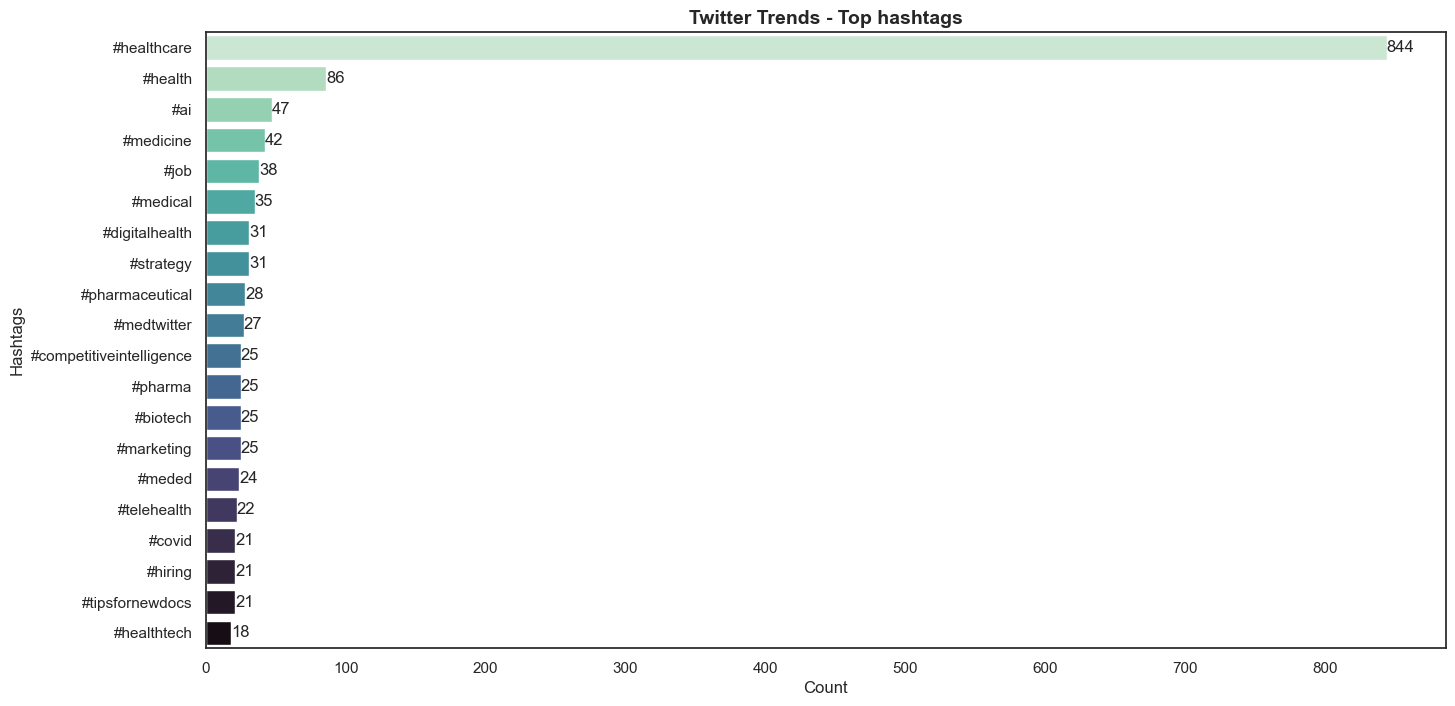

In [79]:
#Generating plot for top 20 hashtags - from Twitter entities column data
top20_1 = trending_tags2.head(20)
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(data=top20_1,y='tweet_entities_hashtags',x='count',palette='mako_r')
for index, value in enumerate(top20_1['count']):
    plt.text(value, index, f'{value}', va='center')
plt.title('Twitter Trends - Top hashtags',fontsize = 14,fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Hashtags')
plt.show()

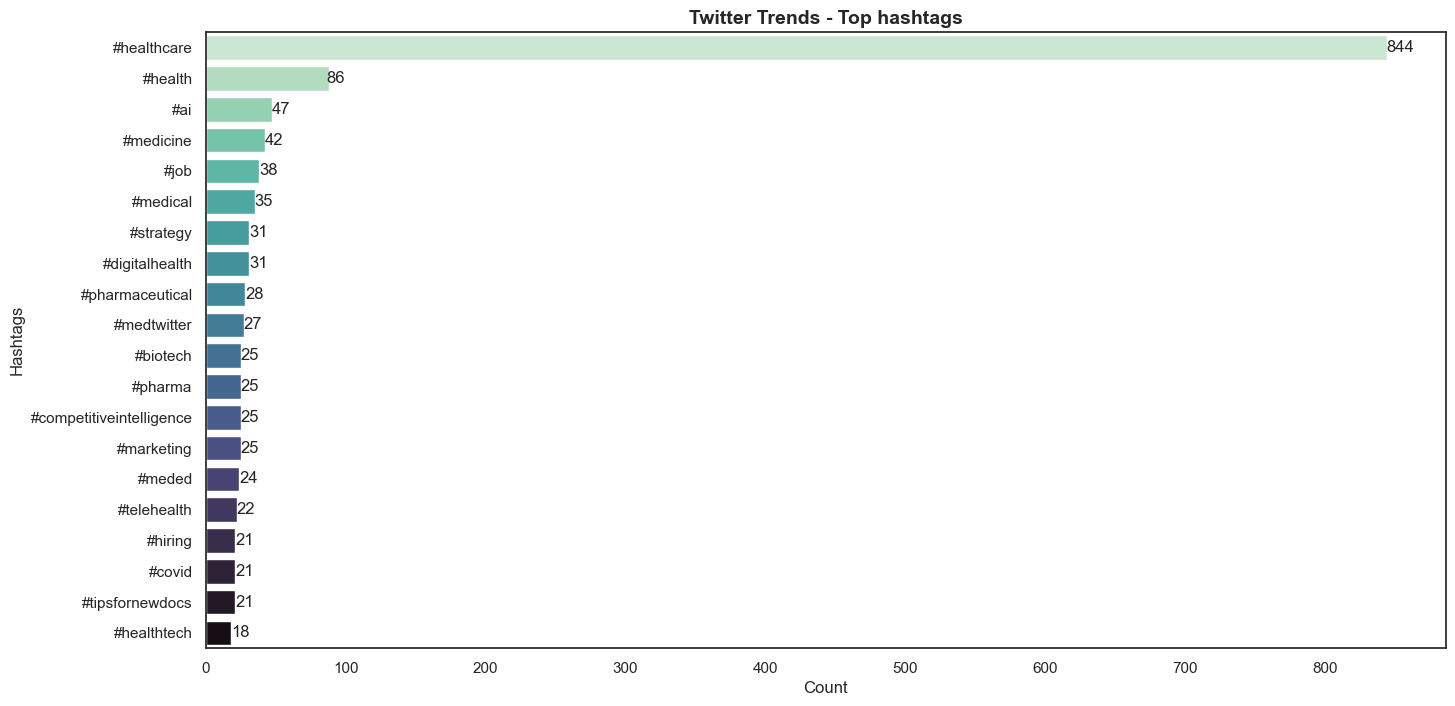

In [80]:
#Generating plot for top 20 hashtags - from tweet full text data
top20_2 = trending_tags.head(20)
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(data=top20_2,y='index',x='count',palette='mako_r')
for index, value in enumerate(top20_1['count']):
    plt.text(value, index, f'{value}', va='center')
plt.title('Twitter Trends - Top hashtags',fontsize = 14,fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Hashtags')
plt.show()

### Data Analysis and Forecasting

#### Q6. Was there adequate staff and capacity in the networks?
#### Q7. What was the actual utilisation of resources?

**The NHS has provided a figure of an average of 1,200,000 appointments per day being used for planning purposes, which you can use as a guideline for maximum capacity.**

#### Daily Utilisation Analysis:
1. Mondays, Tuesdays, Wednesdays are over-utilised, Tuesday has the highest mean utilisation rate of 103%
2. Thursdays, Fridays are optimally utilised with mean utilisation rates at 92%-98%.
3. Mondays have more low days/holidays, bringing down the mean utilisation rate, with the max value going to 120%
4. Weekends are barely utilised, utilisation rates are at 10% for Saturdays and 1% for Sundays.
5. Monthly Averages can be better calculated with weekends excluded.  

In [87]:
#NHS provided figure for avg. maximum daily capacity
max_daily_util = 1200000

# Calculating and Plotting Daily Utilisation Rates from NC
nc_agg = nc_util.groupby('appointment_date').sum('count_of_appointments').reset_index()
nc_agg['daily_utilisation_rate']=nc_agg['count_of_appointments']/max_daily_util*100
nc_agg.head(10)

appointment_date  count_of_appointments  daily_utilisation_rate
0       2021-08-01                   5627                0.468917
1       2021-08-02                1222768              101.897333
2       2021-08-03                1169920               97.493333
3       2021-08-04                1093532               91.127667
4       2021-08-05                1074043               89.503583
5       2021-08-06                1032165               86.013750
6       2021-08-07                  26245                2.187083
7       2021-08-08                   5173                0.431083
8       2021-08-09                1223650              101.970833
9       2021-08-10                1167188               97.265667

#### Investigating the low daily utilisation rates seen in the first 10 rows


In [86]:
nc_util = nc_merged.copy()
nc_util['weekday'] = nc_util['appointment_date'].dt.strftime('%A')

# Create a categorical column with days in order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
nc_util['weekday'] = pd.Categorical(nc_util['weekday'], categories=day_order, ordered=True)

weekday_gpby = nc_util.groupby(['weekday']).sum('count_of_appointments').reset_index()
weekday_gpby['% of Total'] = (weekday_gpby['count_of_appointments'] / total_nc_appts)*100
weekday_gpby.style.format({'count_of_appointments': my_format, '% of Total': '{:.2f}'}).background_gradient(subset=['count_of_appointments','% of Total'], cmap='RdYlGn')

In [90]:
#Adding weekday to nc_agg to confirm pattern
nc_agg['weekday'] = nc_agg['appointment_date'].dt.strftime('%A')

# Create a categorical column with days in order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
nc_agg['weekday'] = pd.Categorical(nc_agg['weekday'], categories=day_order, ordered=True)
nc_agg.head(10)

appointment_date  count_of_appointments  daily_utilisation_rate    weekday
0       2021-08-01                   5627                0.468917     Sunday
1       2021-08-02                1222768              101.897333     Monday
2       2021-08-03                1169920               97.493333    Tuesday
3       2021-08-04                1093532               91.127667  Wednesday
4       2021-08-05                1074043               89.503583   Thursday
5       2021-08-06                1032165               86.013750     Friday
6       2021-08-07                  26245                2.187083   Saturday
7       2021-08-08                   5173                0.431083     Sunday
8       2021-08-09                1223650              101.970833     Monday
9       2021-08-10                1167188               97.265667    Tuesday

In [92]:
# Confirming with Day-wise stats
weekday_stats = nc_agg.groupby('weekday').agg({
    'daily_utilisation_rate': ['min','mean','max','count']
}).round(2)
weekday_stats

daily_utilisation_rate                      
                             min    mean     max count
weekday                                               
Monday                      0.45  103.64  123.35    48
Tuesday                     0.85  107.30  117.29    48
Wednesday                  88.22  102.40  110.99    48
Thursday                    0.54   98.92  109.46    48
Friday                      0.45   92.90  106.97    47
Saturday                    0.41    9.88   52.36    47
Sunday                      0.31    1.07    4.07    48

In [94]:
# Create weekdays dataframe
weekdays_df = nc_agg[~nc_agg['appointment_date'].dt.weekday.isin([5, 6])]

# Create weekends dataframe
weekends_df = nc_agg[nc_agg['appointment_date'].dt.weekday.isin([5, 6])]
weekdays_df.head(10)

appointment_date  count_of_appointments  daily_utilisation_rate    weekday
1        2021-08-02                1222768              101.897333     Monday
2        2021-08-03                1169920               97.493333    Tuesday
3        2021-08-04                1093532               91.127667  Wednesday
4        2021-08-05                1074043               89.503583   Thursday
5        2021-08-06                1032165               86.013750     Friday
8        2021-08-09                1223650              101.970833     Monday
9        2021-08-10                1167188               97.265667    Tuesday
10       2021-08-11                1104807               92.067250  Wednesday
11       2021-08-12                1080555               90.046250   Thursday
12       2021-08-13                1041610               86.800833     Friday

(array([1, 2, 3, 4, 5, 6, 7]),
 [Text(1, 0, 'Monday'),
  Text(2, 0, 'Tuesday'),
  Text(3, 0, 'Wednesday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Friday'),
  Text(6, 0, 'Saturday'),
  Text(7, 0, 'Sunday')])

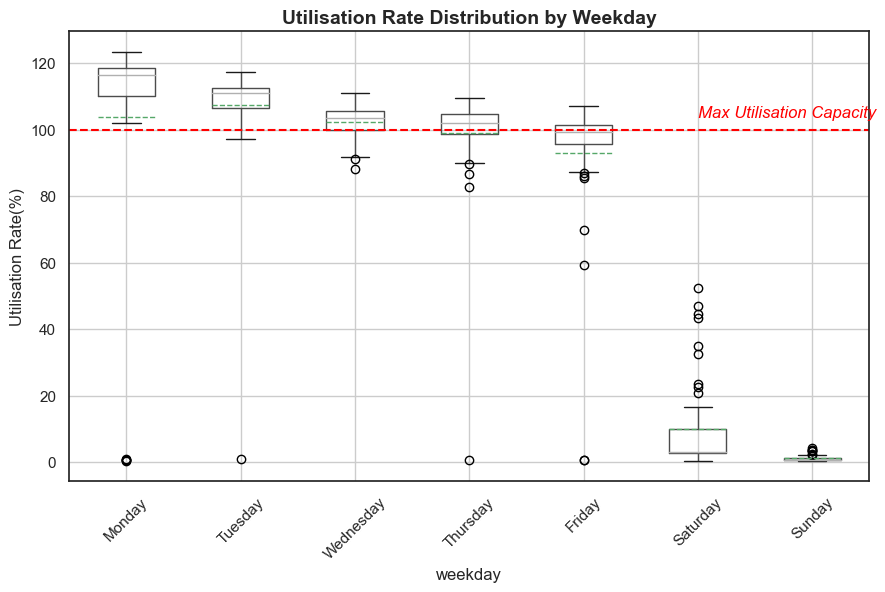

In [96]:
# Utilisation boxplot by days (Mon-Sun)
fig, ax = plt.subplots(figsize=(10, 6))
nc_agg.boxplot(column='daily_utilisation_rate', by='weekday', 
                   ax=ax, meanline=True, showmeans=True)
ax.axhline(100, color='red', linestyle='--', label='Max Capacity')
plt.title('Utilisation Rate Distribution by Weekday', fontsize = 14, fontweight = 'bold')
plt.suptitle('')  # Remove automatic suptitle
plt.ylabel('Utilisation Rate(%)')
ax.text(6, 105, 'Max Utilisation Capacity', color='red', fontsize=12, style='italic', va='center')
plt.xticks(rotation=45)

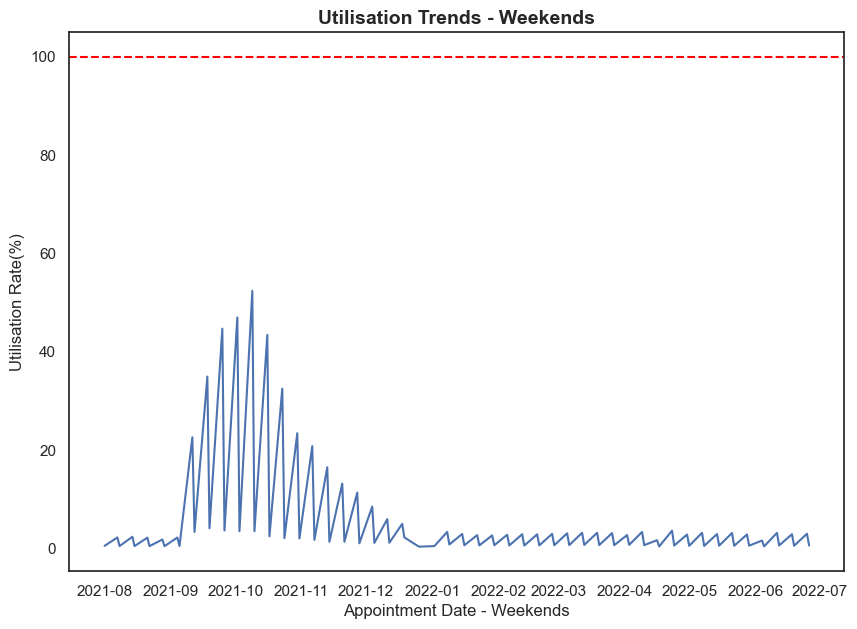

In [98]:
# Lineplot of Utilisation - Weekends subset(sat,sun)
fig, ax = plt.subplots(figsize=(10, 7))
sns.lineplot(data=weekends_df,y='daily_utilisation_rate',x='appointment_date')
ax.axhline(100, color='red', linestyle='--', label='Max Capacity')
plt.title('Utilisation Trends - Weekends',fontsize = 14,fontweight='bold')
plt.xticks(rotation=0)
plt.xlabel('Appointment Date - Weekends')
plt.ylabel('Utilisation Rate(%)')
plt.show()

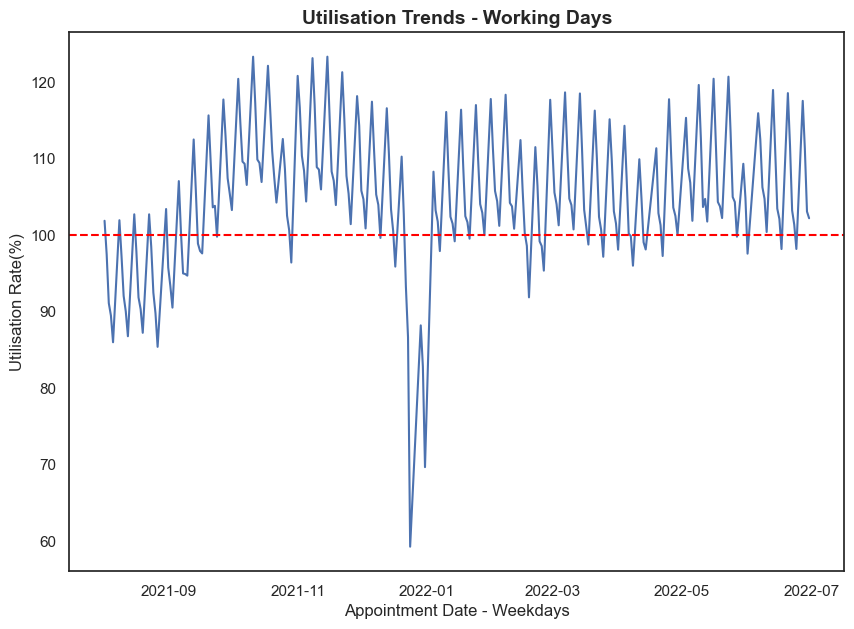

In [99]:
#Working-Weekdays to exclude the Holiday Weekdays
wkgdays_df = weekdays_df[weekdays_df['daily_utilisation_rate']>10]
# Lineplot of Utilisation - Weekdays subset(Mon-Fri)
fig, ax = plt.subplots(figsize=(10, 7))
sns.lineplot(data=wkgdays_df,y='daily_utilisation_rate',x='appointment_date')
ax.axhline(100, color='red', linestyle='--', label='Max Capacity')
plt.title('Utilisation Trends - Working Days',fontsize = 14,fontweight='bold')
plt.xticks(rotation=0)
plt.xlabel('Appointment Date - Weekdays')
plt.ylabel('Utilisation Rate(%)')
plt.show()

#### Monthly Utilisation Analysis:

In [103]:
#Monthly Aggregation from Daily Utilisation
nc_agg2 = nc_agg.copy()
nc_agg2['appointment_month'] = nc_agg2['appointment_date'].dt.strftime('%Y-%m')
nc_agg2.groupby('appointment_month').mean('avg_monthly_utilisation_rate')

count_of_appointments  daily_utilisation_rate
appointment_month                                               
2021-08                     7.694249e+05               64.118739
2021-09                     9.507500e+05               79.229169
2021-10                     9.775430e+05               81.461919
2021-11                     1.013502e+06               84.458528
2021-12                     8.109928e+05               67.582731
2022-01                     8.269508e+05               68.912565
2022-02                     9.055450e+05               75.462083
2022-03                     9.546786e+05               79.556554
2022-04                     7.971020e+05               66.425167
2022-05                     8.869519e+05               73.912656
2022-06                     8.609359e+05               71.744661

In [105]:
#Adding Appointment Month column to Weekdays, Weekends DFs
weekdays_df['appointment_month'] = weekdays_df['appointment_date'].dt.strftime('%Y-%m')
weekends_df['appointment_month'] = weekends_df['appointment_date'].dt.strftime('%Y-%m')

#Calculating Monthly Avg. Utilisation rate - Weekdays and Weekends
NC_Mutil_wkdys = weekdays_df.groupby('appointment_month').mean('daily_utilisation_rate')
NC_Mutil_wkends = weekends_df.groupby('appointment_month').mean('daily_utilisation_rate')
NC_Mutil_wkdys.rename(columns = {'daily_utilisation_rate':'avg_utilisation_rate'},inplace=True)
NC_Mutil_wkends.rename(columns = {'daily_utilisation_rate':'avg_utilisation_rate'},inplace=True)
print(NC_Mutil_wkdys.head(11))
print(NC_Mutil_wkends.head(11))

                   count_of_appointments  avg_utilisation_rate
appointment_month                                             
2021-08                     1.078430e+06             89.869159
2021-09                     1.233360e+06            102.780008
2021-10                     1.321946e+06            110.162198
2021-11                     1.345519e+06            112.126568
2021-12                     1.080279e+06             90.023225
2022-01                     1.212287e+06            101.023929
2022-02                     1.259643e+06            104.970262
2022-03                     1.278974e+06            106.581199
2022-04                     1.129507e+06             94.125544
2022-05                     1.241980e+06            103.498299
2022-06                     1.167233e+06             97.269383
                   count_of_appointments  avg_utilisation_rate
appointment_month                                             
2021-08                     14079.222222              1

C:\Users\sujit\AppData\Local\Temp\ipykernel_57152\162310296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekdays_df['appointment_month'] = weekdays_df['appointment_date'].dt.strftime('%Y-%m')
C:\Users\sujit\AppData\Local\Temp\ipykernel_57152\162310296.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekends_df['appointment_month'] = weekends_df['appointment_date'].dt.strftime('%Y-%m')


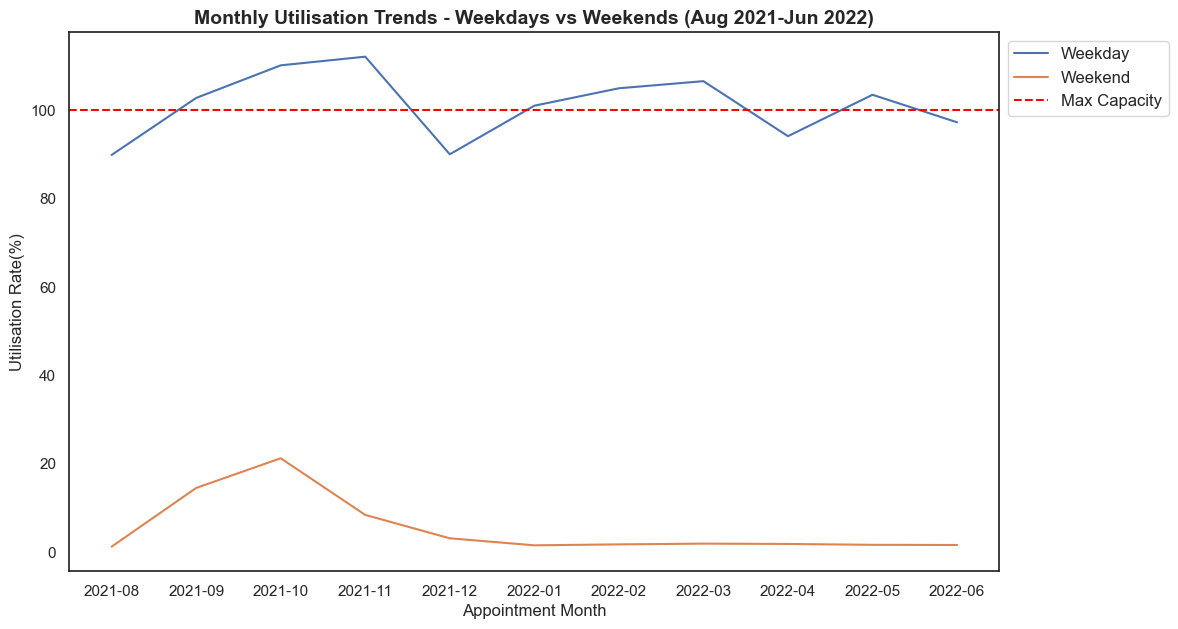

In [107]:
# Concatenate the dataframes, adding a column to identify weekdays and weekends
combined_df = pd.concat([NC_Mutil_wkdys.assign(day_type='Weekday'), NC_Mutil_wkends.assign(day_type='Weekend')])

#Line chart showing monthly weekdays and weekends utilisation trends
plt.figure(figsize=(12, 7))
sns.lineplot(data=combined_df, x='appointment_month', y='avg_utilisation_rate', hue='day_type')

# Adding horizontal line for max capacity
plt.axhline(100, color='red', linestyle='--', label='Max Capacity')

# Customize the plot
plt.title('Monthly Utilisation Trends - Weekdays vs Weekends (Aug 2021-Jun 2022)', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)
plt.ylabel('Utilisation Rate(%)')
plt.xlabel('Appointment Month') 
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
plt.show()

**Based on daily utilisation patterns, applying utilisation metrics to AR gives us Utilisation metrics for COVID and Post-COVID time-frame**

In [110]:
ar_df = ar_merged.groupby('appointment_month').sum('count_of_appointments')

#Workingdays
wkgdays_month = 22.15
monthly_util = max_daily_util*wkgdays_month

ar_df['weekday_utilisation']=(ar_df['count_of_appointments']/wkgdays_month).round(1)
ar_df['monthly_utilisation_rate'] = (ar_df['count_of_appointments']/monthly_util*100).round(1)
# View the DataFrame.
ar_df

count_of_appointments  weekday_utilisation  \
appointment_month                                               
2020-01-01                      27199296            1227959.2   
2020-02-01                      24104621            1088244.7   
2020-03-01                      24053468            1085935.3   
2020-04-01                      16007881             722703.4   
2020-05-01                      16417212             741183.4   
2020-06-01                      20690805             934122.1   
2020-07-01                      22491437            1015414.8   
2020-08-01                      20150520             909730.0   
2020-09-01                      26714255            1206061.2   
2020-10-01                      28301932            1277739.6   
2020-11-01                      25061602            1131449.3   
2020-12-01                      23535936            1062570.5   
2021-01-01                      22492069            1015443.3   
2021-02-01                      22399569            1011267.2   
2021-03-01                      27225424            1229138.8   
2021-04-01                      23879932            1078100.8   
2021-05-01                      23508395            1061327.1   
2021-06-01                      26784182            1209218.1   
2021-07-01                      25739219            1162041.5   
2021-08-01                      23852171            1076847.4   
2021-09-01                      28522501            1287697.6   
2021-10-01                      30303834            1368118.9   
2021-11-01                      30405070            1372689.4   
2021-12-01                      25140776            1135023.7   
2022-01-01                      25635474            1157357.7   
2022-02-01                      25355260            1144707.0   
2022-03-01                      29595038            1336119.1   
2022-04-01                      23913060            1079596.4   
2022-05-01                      27495508            1241332.2   
2022-06-01                      25828078            1166053.2   

                   monthly_utilisation_rate  
appointment_month                            
2020-01-01                            102.3  
2020-02-01                             90.7  
2020-03-01                             90.5  
2020-04-01                             60.2  
2020-05-01                             61.8  
2020-06-01                             77.8  
2020-07-01                             84.6  
2020-08-01                             75.8  
2020-09-01                            100.5  
2020-10-01                            106.5  
2020-11-01                             94.3  
2020-12-01                             88.5  
2021-01-01                             84.6  
2021-02-01                             84.3  
2021-03-01                            102.4  
2021-04-01                             89.8  
2021-05-01                             88.4  
2021-06-01                            100.8  
2021-07-01                             96.8  
2021-08-01                             89.7  
2021-09-01                            107.3  
2021-10-01                            114.0  
2021-11-01                            114.4  
2021-12-01                             94.6  
2022-01-01                             96.4  
2022-02-01                             95.4  
2022-03-01                            111.3  
2022-04-01                             90.0  
2022-05-01                            103.4  
2022-06-01                             97.2

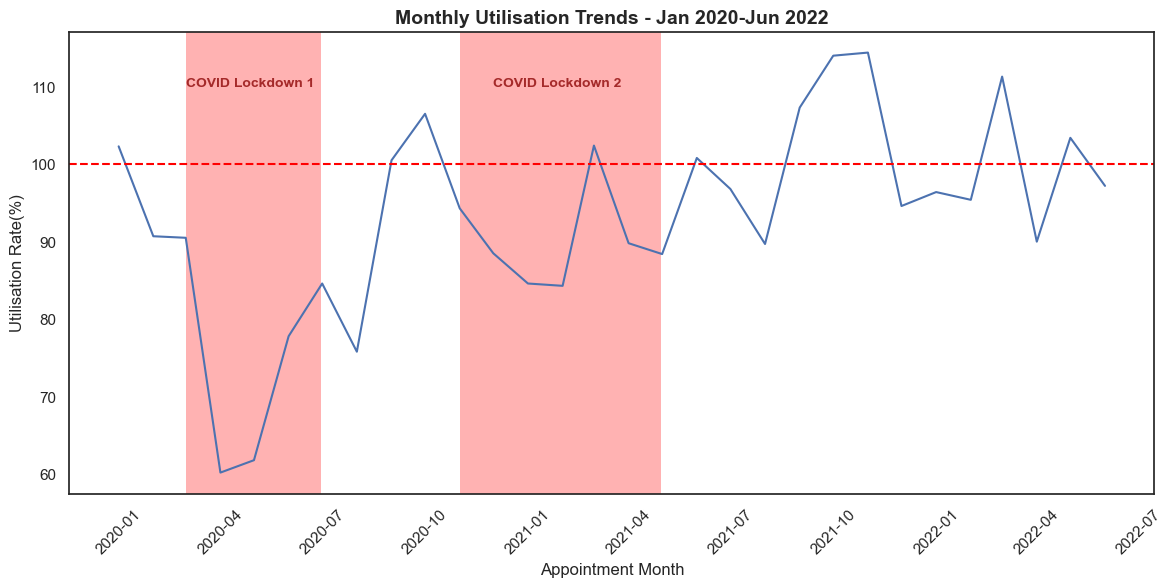

In [112]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.lineplot(data=ar_df,x='appointment_month',y='monthly_utilisation_rate',markers = True)
ax.axhline(100, color='red', linestyle='--', label='Max Capacity')
plt.title('Monthly Utilisation Trends - Jan 2020-Jun 2022',fontsize = 14, fontweight = 'bold')
plt.xticks(rotation=45)
plt.ylabel('Utilisation Rate(%)')
plt.xlabel('Appointment Month')
plt.axvspan(pd.Timestamp('2020-03-01'), pd.Timestamp('2020-06-30'), color='red', alpha=0.3, lw=0)  # First lockdown
plt.axvspan(pd.Timestamp('2020-11-01'), pd.Timestamp('2021-04-30'), color='red', alpha=0.3, lw=0)  # Second lockdown

# Add annotations for the lockdowns
plt.annotate('COVID Lockdown 1', xy=(pd.Timestamp('2020-03'), 100), 
             xytext=(pd.Timestamp('2020-03'), 110), 
             fontsize=10, color='brown', fontweight='bold')

plt.annotate('COVID Lockdown 2', xy=(pd.Timestamp('2020-12'), 100), 
             xytext=(pd.Timestamp('2020-12'), 110), 
             fontsize=10, color='brown', fontweight='bold')

plt.show()

#### Q8. What insights can be gained by looking at missed appointments?
#### Missed Appointments Analysis

**Dataset creations - grouping by 1 / 2 / 3 factors available within the Appointments Regional dataset:**

In [139]:
#1. Subsets of Missed and Attended appointments
DNA = ar_merged[ar_merged['appointment_status']=='DNA']
Attended = ar_merged[ar_merged['appointment_status']=='Attended']
Total_DNA_appts = DNA['count_of_appointments'].sum()

# 2. DNA Appointments grouped by different factors within AR Dataframe - Individual groupby
DNA1 = DNA.groupby(['appointment_mode']).sum('count_of_appointments').sort_values(by='count_of_appointments',ascending = False).reset_index()
print('DNA1\n')
print(DNA1.head())
print('\n\n')
DNA2 = DNA.groupby(['hcp_type']).sum('count_of_appointments').sort_values(by='count_of_appointments',ascending = False).reset_index()
print('DNA2\n')
print(DNA2.head())
print('\n\n')
DNA3 = DNA.groupby(['time_between_book_and_appointment']).sum('count_of_appointments').sort_values(by='count_of_appointments',ascending = False).reset_index()
print('DNA3\n')
print(DNA3.head())
print('\n\n')
DNA4 = DNA.groupby(['region_name']).sum('count_of_appointments').sort_values(by='count_of_appointments',ascending = False).reset_index()
print('DNA4\n')
print(DNA4.head())
print('\n\n')
DNA5 = DNA.groupby(['icb_name']).sum('count_of_appointments').sort_values(by='count_of_appointments',ascending = False).reset_index()
print('DNA5\n')
print(DNA5.head())
print('\n\n')

#AR_Overall_Restructured - To compare Missed and Total appointments by Appointment Mode
AR_overall = ar_merged.groupby(['appointment_month','appointment_status']).sum(['count_of_appointments']).reset_index()
AR_overall = AR_overall.pivot_table(index='appointment_month',columns ='appointment_status',values ='count_of_appointments').reset_index()
AR_overall['Total Appointments'] = AR_overall['Attended']+AR_overall['DNA']+AR_overall['Unknown']
AR_overall.rename(columns = {'Attended':'Attended Appointments','DNA':'DNA Appointments'},inplace=True)
AR_overall['DNA % of Total'] = (AR_overall['DNA Appointments'] / AR_overall['Total Appointments'])*100
AR_overall['Attended % of Total'] = (AR_overall['Attended Appointments'] / AR_overall['Total Appointments'])*100
AR_overall.drop(columns =['Unknown'],inplace=True)
AR_overall['appointment_mode']='Overall'
AR_overall.reset_index(inplace = True)
AR_overall_restructured = AR_overall[[
    'appointment_month', 'appointment_mode', 'Total Appointments', 
    'DNA Appointments', 'Attended Appointments', 'DNA % of Total', 'Attended % of Total'
]]
AR_overall_restructured = AR_overall_restructured.reset_index(drop=True)

# 3. Groupby Attended and Missed appointments by Appointment Mode
Attndgpby2 = Attndgpby2 = Attended.groupby(['appointment_month','appointment_mode'])[['count_of_appointments']].sum()
DNAgpby2 = DNA.groupby(['appointment_month','appointment_mode'])[['count_of_appointments']].sum()

#AR_DNA2_filtered - Group Missed appointments by Appointment Month, Appointment mode - with comparison to Total Appointments.
AR_dna_gpby2 = ar_merged.groupby(['appointment_month','appointment_mode']).sum(['count_of_appointments'])
AR_dna_gpby2.reset_index(inplace = True)
AR_dna_gpby2.rename(columns={'count_of_appointments':'Total Appointments'},inplace=True)
AR_DNA2 = pd.merge(AR_dna_gpby2,DNAgpby2, on = ['appointment_month','appointment_mode'],how = 'left')
AR_DNA2 = pd.merge(AR_DNA2,Attndgpby2, on = ['appointment_month','appointment_mode'],how = 'left')
AR_DNA2.rename(columns = {'count_of_appointments_x':'DNA Appointments'},inplace=True)
AR_DNA2.rename(columns = {'count_of_appointments_y':'Attended Appointments'},inplace=True)
AR_DNA2['DNA % of Total'] = (AR_DNA2['DNA Appointments'] / AR_DNA2['Total Appointments'])*100
AR_DNA2['Attended % of Total'] = (AR_DNA2['Attended Appointments'] / AR_DNA2['Total Appointments'])*100

AR_DNA2.sort_values (by =['appointment_month','appointment_mode'],inplace=True)
AR_DNA2_filtered = AR_DNA2[AR_DNA2['appointment_mode']!='Unknown']

#AR_DNA_Modes2
AR_DNA_Modes2 = pd.concat([AR_DNA2_filtered,AR_overall_restructured],ignore_index = True)
AR_DNA_Modes2 = AR_DNA_Modes2.sort_values(by=['appointment_month', 'appointment_mode'], ignore_index=True)
print('\nAR_DNA_Modes2 - Appointment Month and Mode\n')
print(AR_DNA_Modes2.head())
print('\n\n')


# 4. Groupby using 2 Factors - Appointment Mode and Time between booking and appointment
DNAgpby1 = DNA.groupby(['appointment_mode','time_between_book_and_appointment']).sum(['count_of_appointments'])

#AR_DNA_1_filtered - Group Missed appointments by Time between Booking and appointment, Appointment mode - with comparison to Total Appointments.
AR_dna_gpby_1 = ar_merged.groupby(['time_between_book_and_appointment','appointment_mode']).sum(['count_of_appointments'])
AR_dna_gpby_1.reset_index(inplace = True)
AR_dna_gpby_1.rename(columns={'count_of_appointments':'Total Appointments'},inplace=True)
AR_DNA_1 = pd.merge(AR_dna_gpby_1,DNAgpby1, on = ['time_between_book_and_appointment','appointment_mode'],how = 'left')
AR_DNA_1.rename(columns = {'count_of_appointments':'DNA Appointments'},inplace=True)
AR_DNA_1['% of Total'] = (AR_DNA_1['DNA Appointments'] / AR_DNA_1['Total Appointments'])*100

AR_DNA_1['time_between_book_and_appointment1'] = pd.Categorical(AR_DNA_1['time_between_book_and_appointment'], ["Same Day", "1 Day", "2 to 7 Days","8  to 14 Days","15  to 21 Days","22  to 28 Days","More than 28 Days","Unknown / Data Quality"])
AR_DNA_1.sort_values (by =['time_between_book_and_appointment1','appointment_mode'],inplace=True)
AR_DNA_1_filtered = AR_DNA_1[AR_DNA_1['appointment_mode']!='Unknown']
print('\nAR_DNA_1_filtered - Monthly Appointment Mode, Booking Time with Unknown filtered out\n')
print(AR_DNA_1_filtered.head())
print('\n\n')



# 5. 3 Factor grouping - Region + Appointment Mode + Time Between Booking and Appointment 
#AR_DNA_reg_filtered - Region wise Missed appointments with Mode and Time between booking and appointment.
DNAgpby_reg = DNA.groupby(['region_name','appointment_mode','time_between_book_and_appointment']).sum(['count_of_appointments'])
AR_dna_gpby_reg = ar_merged.groupby(['region_name','appointment_mode','time_between_book_and_appointment']).sum(['count_of_appointments'])
AR_dna_gpby_reg.reset_index(inplace = True)
AR_dna_gpby_reg.rename(columns={'count_of_appointments':'Total Appointments'},inplace=True)
AR_DNA_reg = pd.merge(AR_dna_gpby_reg,DNAgpby_reg, on = ['region_name','appointment_mode','time_between_book_and_appointment'],how = 'left')
AR_DNA_reg.rename(columns = {'count_of_appointments':'DNA Appointments'},inplace=True)
AR_DNA_reg['% of Total'] = (AR_DNA_reg['DNA Appointments'] / AR_DNA_reg['Total Appointments'])*100

AR_DNA_reg['time_between_book_and_appointment'] = pd.Categorical(AR_DNA_reg['time_between_book_and_appointment'], ["Same Day", "1 Day", "2 to 7 Days","8  to 14 Days","15  to 21 Days","22  to 28 Days","More than 28 Days","Unknown / Data Quality"])
AR_DNA_reg.sort_values (by =['region_name','appointment_mode','time_between_book_and_appointment'],inplace=True)
AR_DNA_reg_filtered = AR_DNA_reg[AR_DNA_reg['appointment_mode']!='Unknown']
print('\nAR_DNA_reg_filtered - Monthly Appointment Mode, Booking Time across regions with Unknown filtered out\n')
print(AR_DNA_reg_filtered.head())
print('\n\n')

DNA1

  appointment_mode  count_of_appointments
0     Face-to-Face               24253038
1        Telephone                5262251
2          Unknown                1049427
3       Home Visit                 187571
4     Video/Online                 158946



DNA2

               hcp_type  count_of_appointments
0  Other Practice staff               20829335
1                    GP                9428935
2               Unknown                 652963



DNA3

  time_between_book_and_appointment  count_of_appointments
0                       2 to 7 Days                8697476
1                     8  to 14 Days                6193368
2                          Same Day                6052604
3                    15  to 21 Days                3282752
4                             1 Day                2634536



DNA4

                region_name  count_of_appointments
0                  Midlands                6082480
1                    London                5457490
2                Nor

**Customized bar charts for analysis based on the datasets created:**

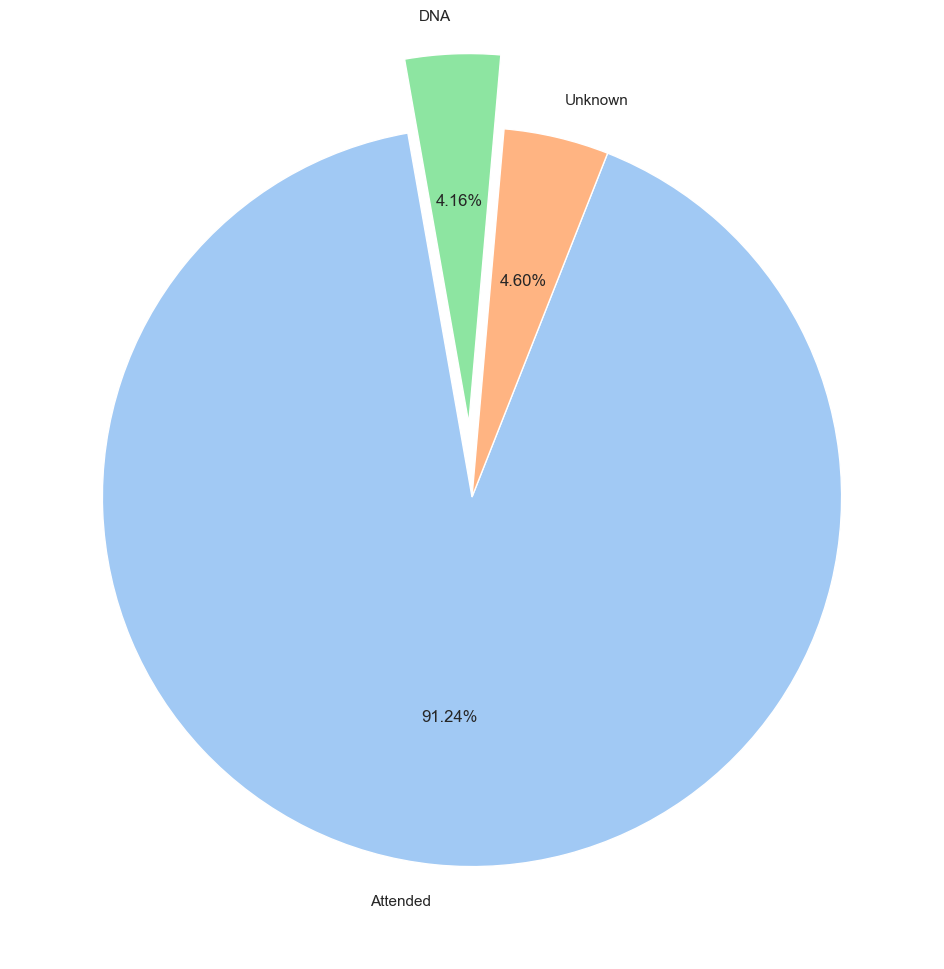

In [119]:
# Simple pie chart to show Missed appointments in terms of total appointments
palette_color = sns.color_palette('pastel') 
plt.pie(data = ar_result_dfs['appointment_status'], x = 'Appointments', labels='appointment_status', colors=palette_color, autopct='%.2f%%', startangle = 100, explode = [0,0,0.2])
plt.show()

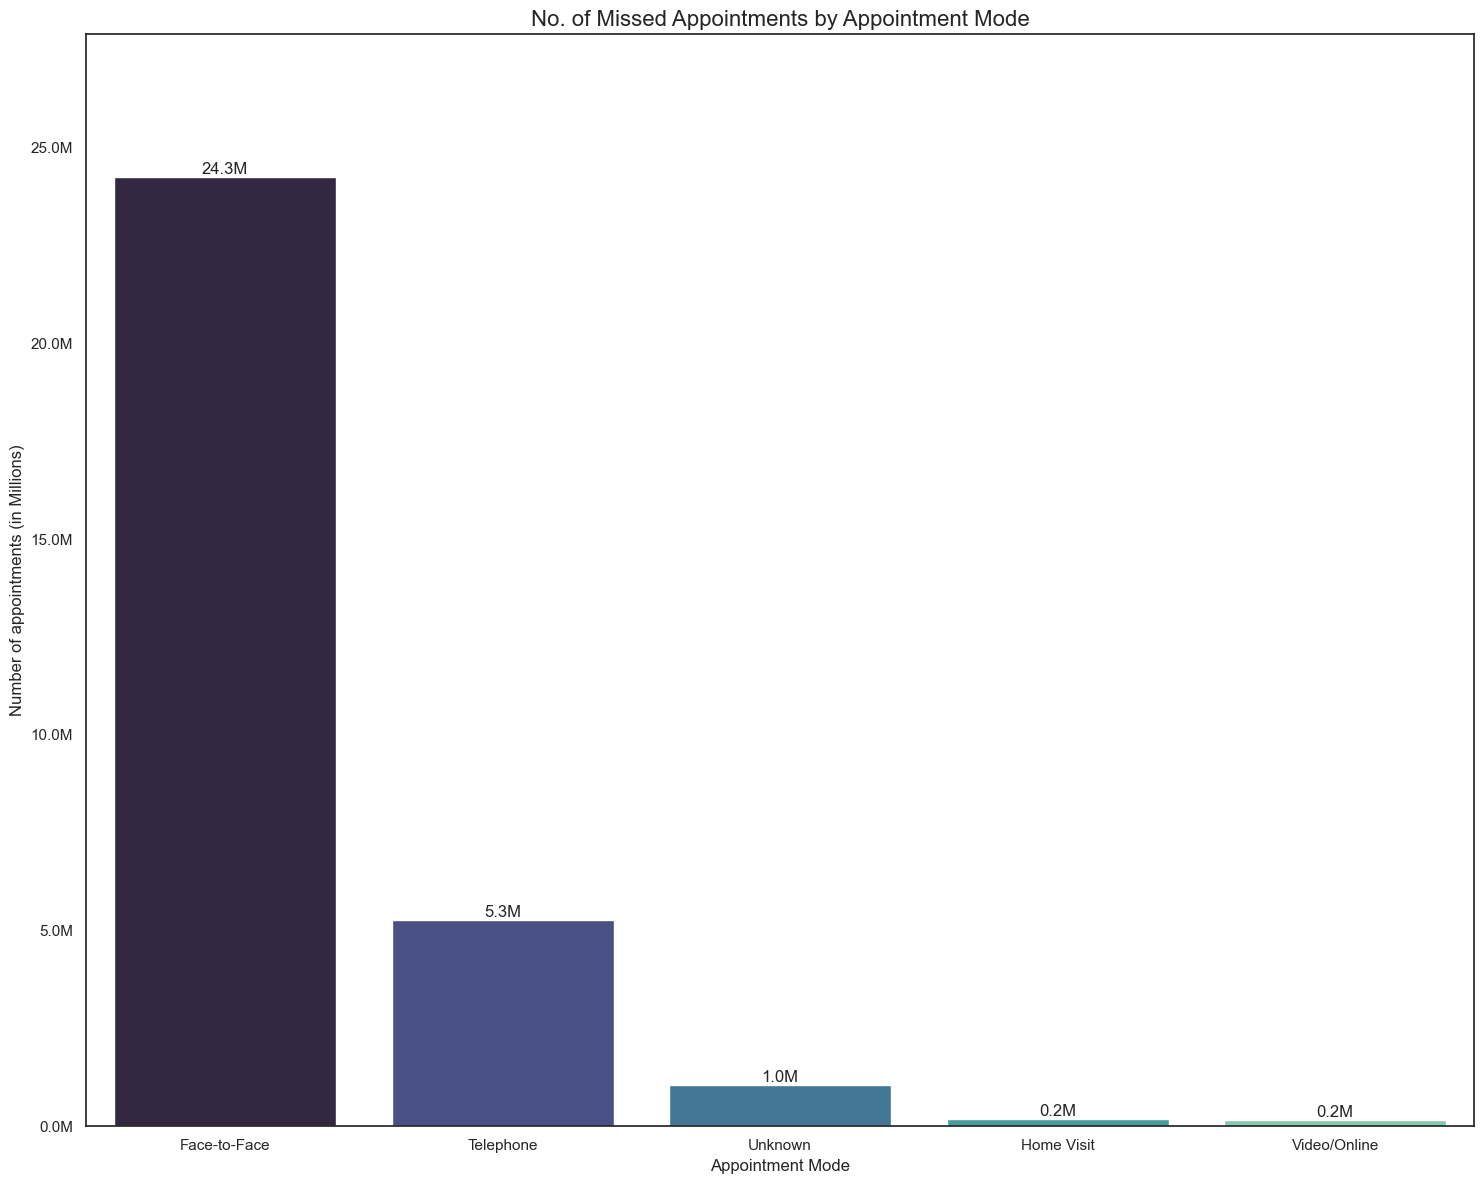

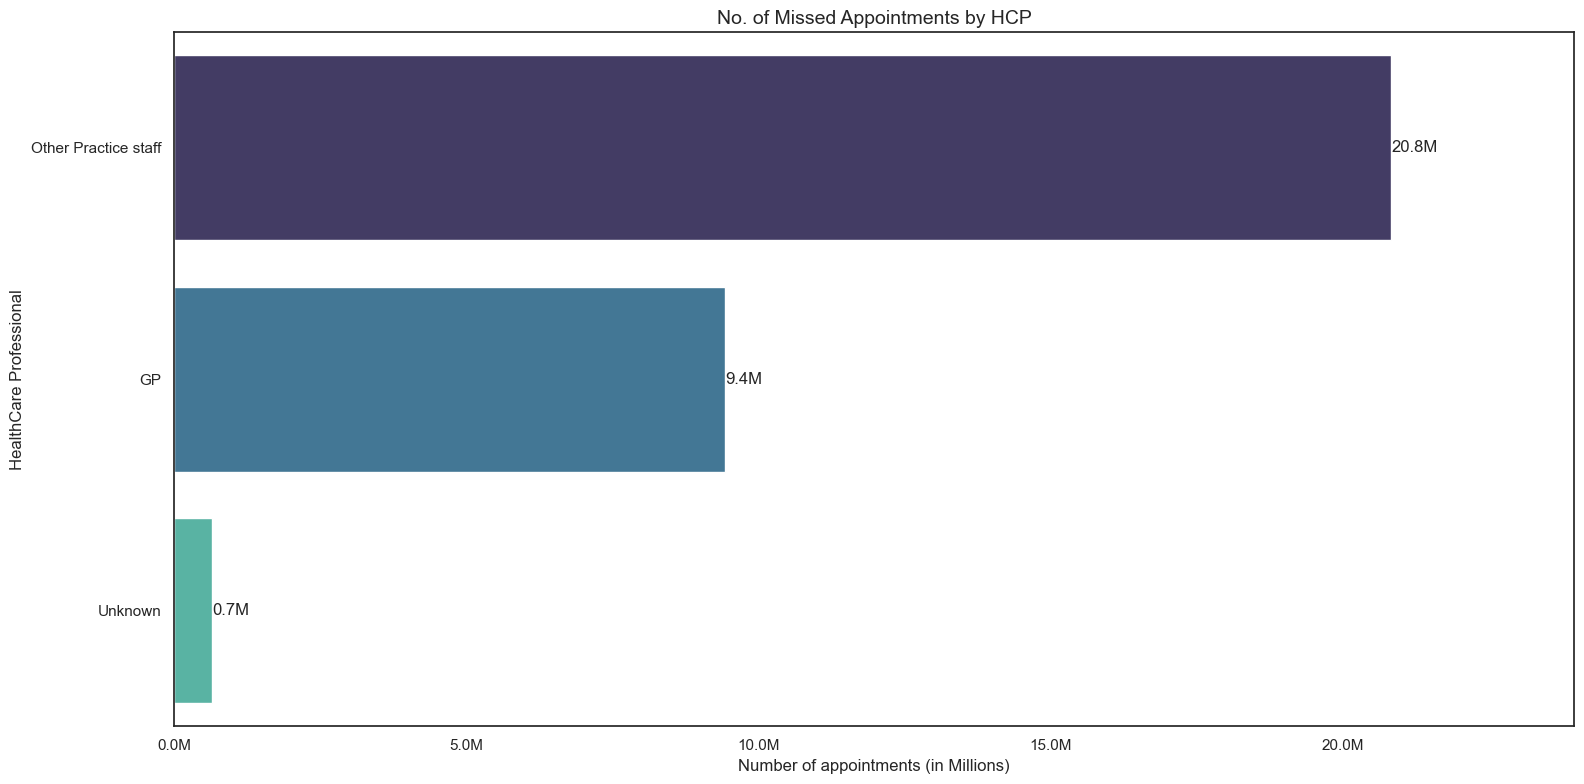

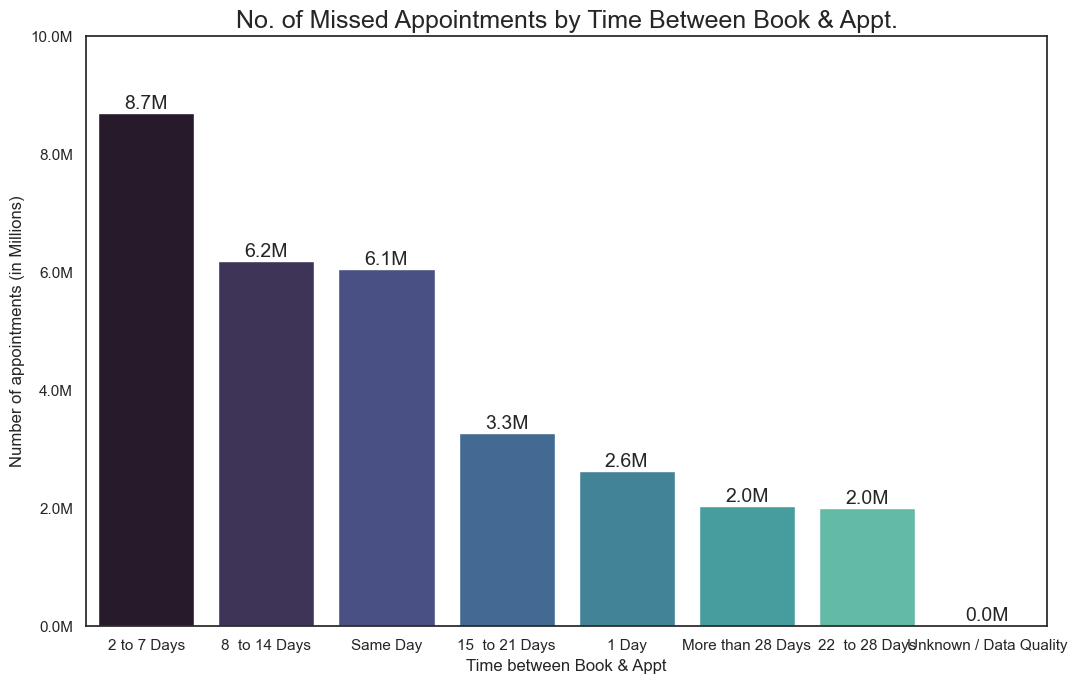

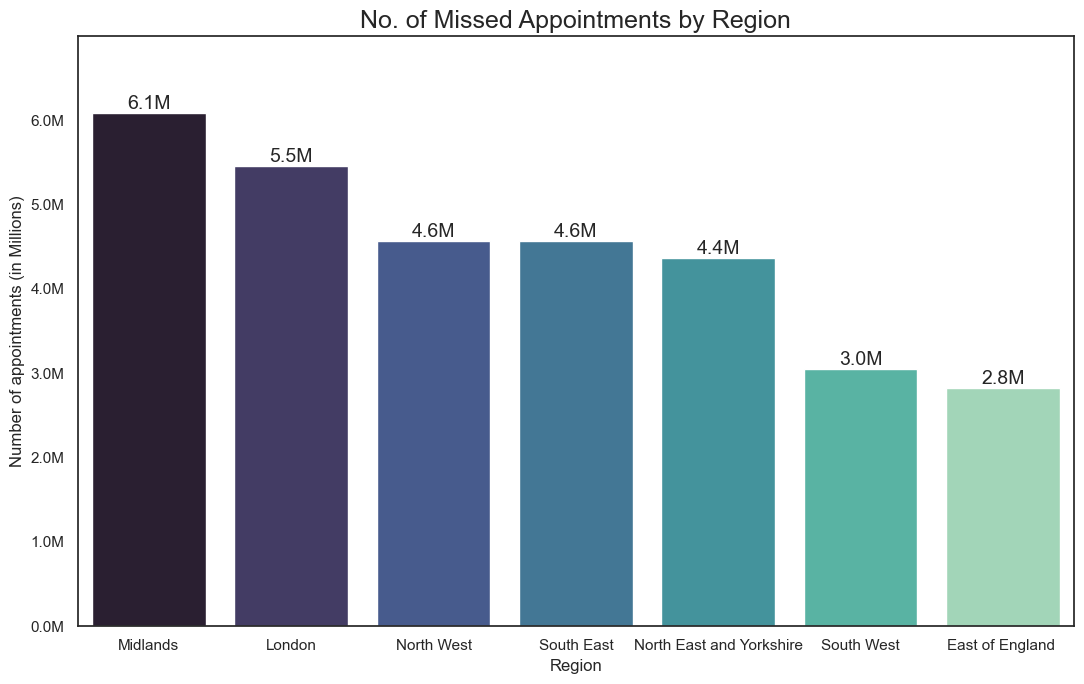

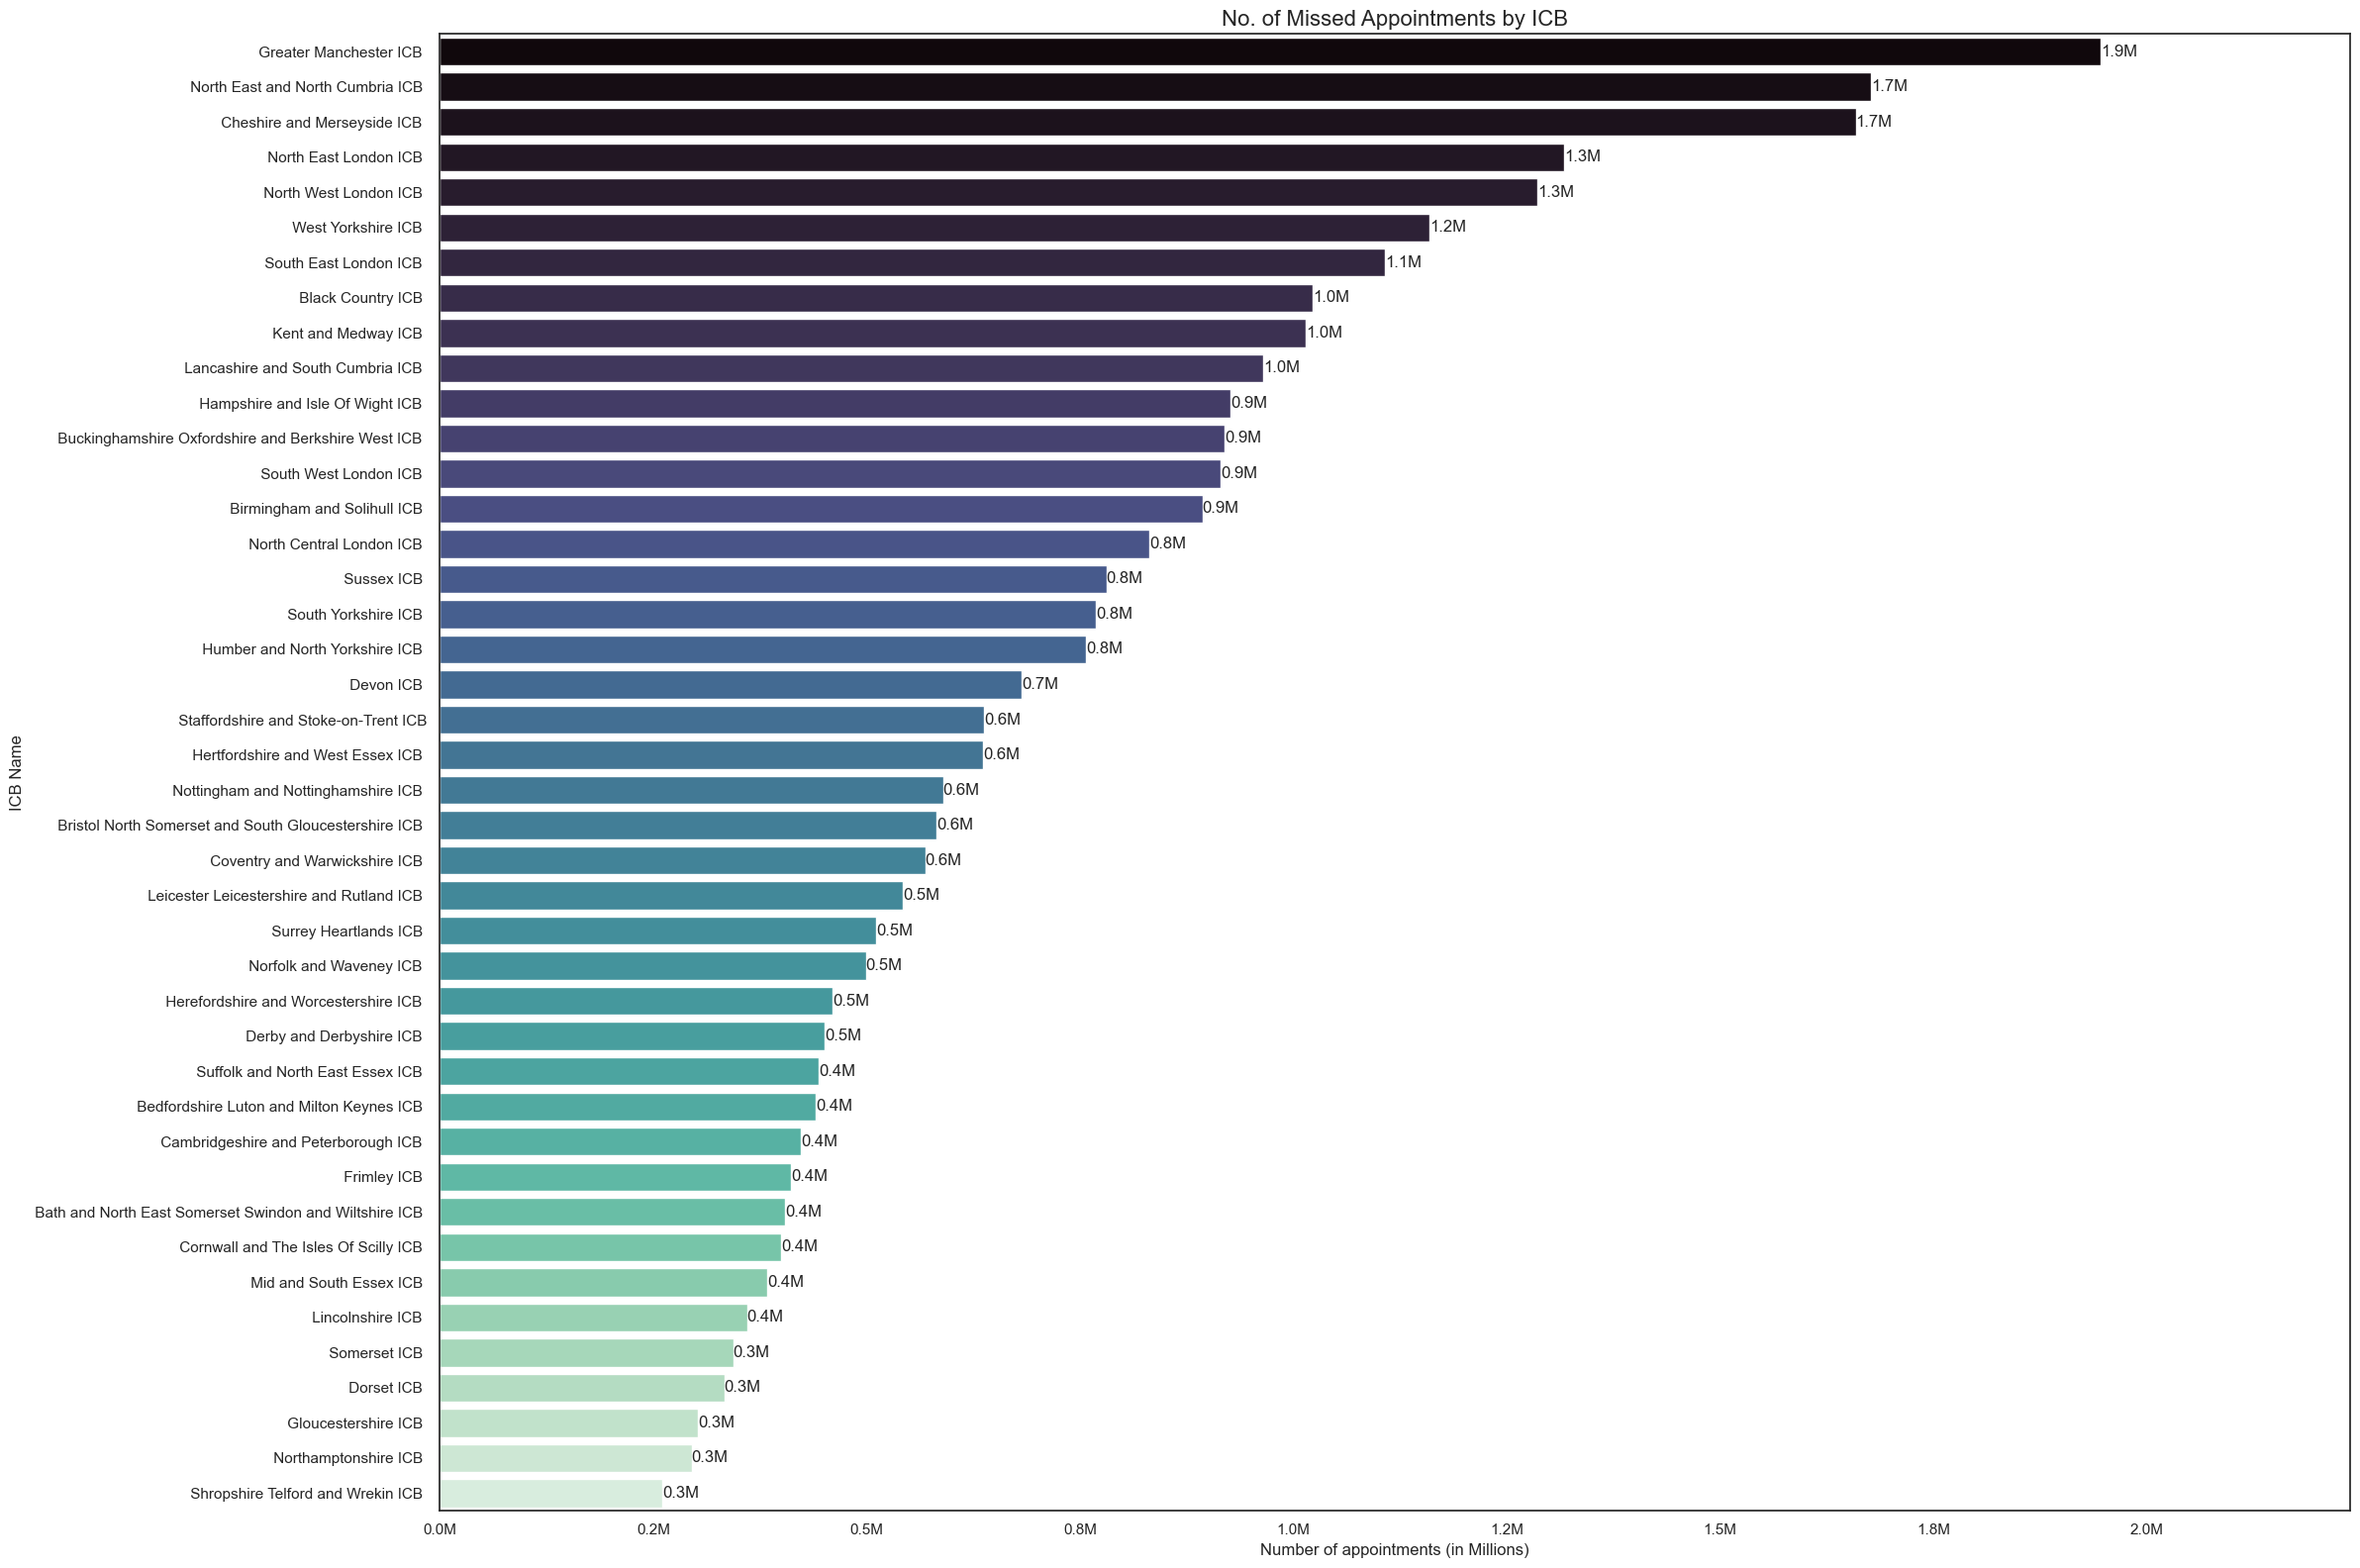

In [121]:
# Bar chart for Missed appointments by Mode
ax = sns.barplot(x='appointment_mode', y='count_of_appointments', data=DNA1,palette='mako')
plt.title('No. of Missed Appointments by Appointment Mode', fontsize = 16)
plt.xlabel('Appointment Mode',fontsize = 12)
plt.ylabel('Number of appointments (in Millions)',fontsize = 12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))
plt.ylim(0, DNA1['count_of_appointments'].max() * 1.15)
for index, value in enumerate(DNA1['count_of_appointments']):
    plt.text(index, value, f'{value/1e6:.1f}M', va='bottom',ha='center', fontsize=12)
plt.tight_layout()
plt.show()

# Bar chart for Missed appointments by HCP
plt.figure(figsize=(16, 8))
ax = sns.barplot(y='hcp_type', x='count_of_appointments', data=DNA2,palette='mako')
plt.title('No. of Missed Appointments by HCP', fontsize = 14)
plt.ylabel('HealthCare Professional',fontsize = 12)
plt.xlabel('Number of appointments (in Millions)',fontsize = 12)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))
plt.xlim(0, DNA2['count_of_appointments'].max() * 1.15)
for index, value in enumerate(DNA2['count_of_appointments']):
    plt.text(value, index, f'{value/1e6:.1f}M', va='center',ha='left', fontsize=12)
plt.tight_layout()
plt.show()

# Bar chart for Missed appointments by Time between Booking and Appointment
plt.figure(figsize=(11, 7))
ax = sns.barplot(x='time_between_book_and_appointment', y='count_of_appointments', data=DNA3,palette='mako')
plt.title('No. of Missed Appointments by Time Between Book & Appt.', fontsize = 18)
plt.xlabel('Time between Book & Appt',fontsize = 12)
plt.ylabel('Number of appointments (in Millions)',fontsize = 12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))
plt.ylim(0, DNA3['count_of_appointments'].max() * 1.15)
for index, value in enumerate(DNA3['count_of_appointments']):
    plt.text(index, value, f'{value/1e6:.1f}M', va='bottom',ha='center', fontsize=14)
plt.tight_layout()
plt.show()

# Bar chart for Missed appointments by Regions
plt.figure(figsize=(11, 7))
ax = sns.barplot(x='region_name', y='count_of_appointments', data=DNA4,palette='mako')
plt.title('No. of Missed Appointments by Region', fontsize = 18)
plt.xlabel('Region',fontsize = 12)
plt.ylabel('Number of appointments (in Millions)',fontsize = 12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))
plt.ylim(0, DNA4['count_of_appointments'].max() * 1.15)
for index, value in enumerate(DNA4['count_of_appointments']):
    plt.text(index, value, f'{value/1e6:.1f}M', va='bottom',ha='center', fontsize=14)
plt.tight_layout()
plt.show()

# Bar chart for Missed appointments by ICB - Print as this is large.
plt.figure(figsize=(24, 16))
ax = sns.barplot(y='icb_name', x='count_of_appointments', data=DNA5,palette='mako')
plt.title('No. of Missed Appointments by ICB', fontsize = 16)
plt.ylabel('ICB Name', fontsize = 12)
plt.xlabel('Number of appointments (in Millions)', fontsize = 12)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))
plt.xlim(0, DNA5['count_of_appointments'].max() * 1.15)
for index, value in enumerate(DNA5['count_of_appointments']):
    plt.text(value, index, f'{value/1e6:.1f}M', va='center',ha='left', fontsize=12)
plt.tight_layout()
plt.savefig(f"DNAbyICB_appointments.png", dpi=300, bbox_inches='tight')
plt.show()

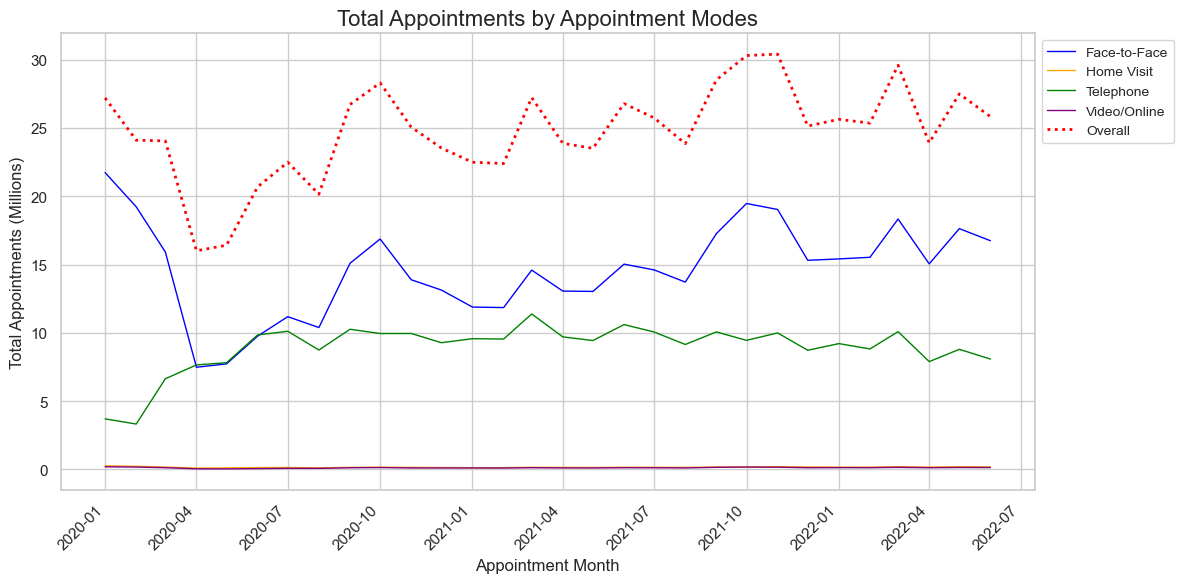

In [122]:
# TOTAL APPOINTMENTS BY APPOINTMENT MODE with OVERALL
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Define colors and styles for each appointment mode
styles = {
    'Face-to-Face': ('blue', '-'),
    'Home Visit': ('orange', '-'),
    'Telephone': ('green', '-'),
    'Video/Online': ('purple', '-'),
    'Overall': ('red', ':')  }

# Plot lines for each appointment mode
for mode, (color, linestyle) in styles.items():
    data = AR_DNA_Modes2[AR_DNA_Modes2['appointment_mode'] == mode]
    plt.plot(data['appointment_month'], data['Total Appointments'], 
             label=mode, color=color, linestyle=linestyle, linewidth=2 if mode == 'Overall' else 1)

# Customize the plot
plt.title('Total Appointments by Appointment Modes', fontsize=16)
plt.xlabel('Appointment Month', fontsize=12)
plt.ylabel('Total Appointments (Millions)', fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Format y-axis to show thousands
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x/1e6), ',')))

# Adjust layout and display
plt.tight_layout()
plt.show()

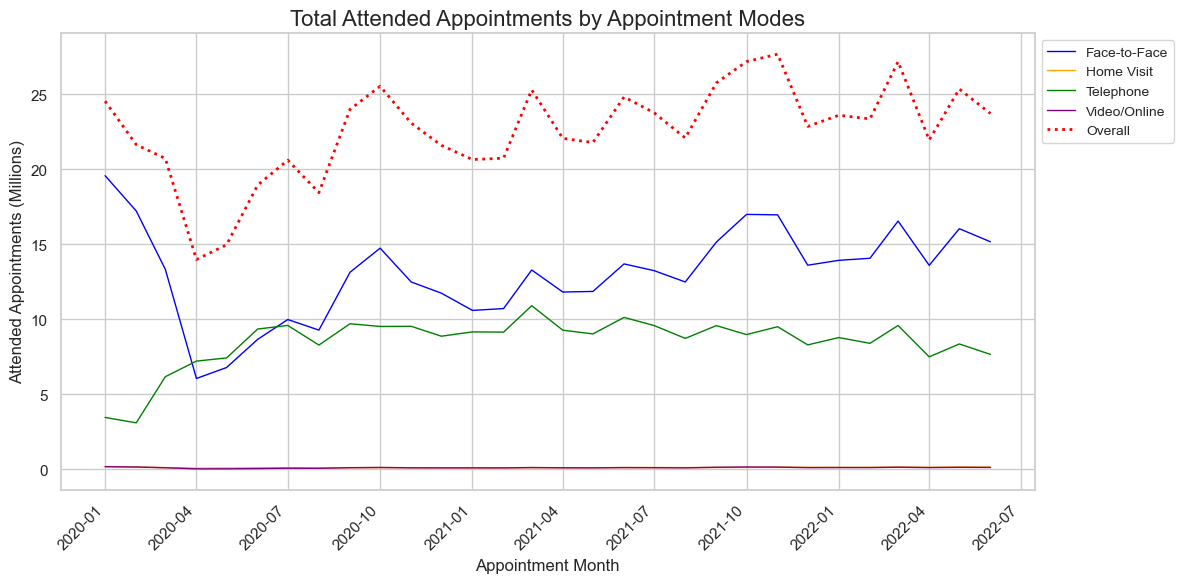

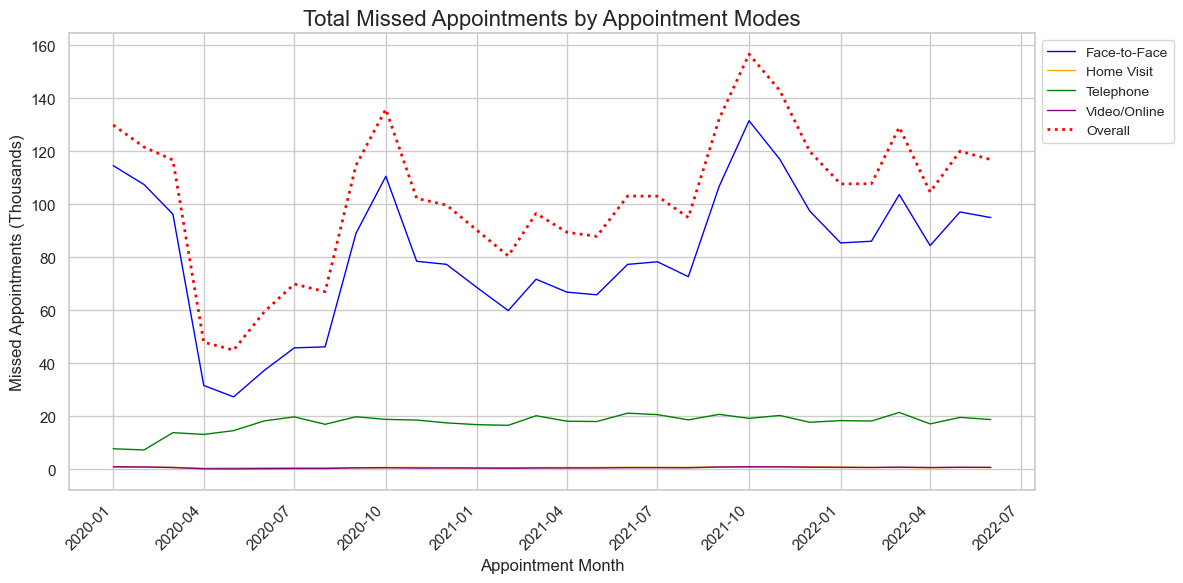

In [125]:
# TOTAL ATTENDED APPOINTMENTS BY APPOINTMENT MODE with OVERALL
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
# Define colors and styles for each appointment mode
styles = {
    'Face-to-Face': ('blue', '-'),
    'Home Visit': ('orange', '-'),
    'Telephone': ('green', '-'),
    'Video/Online': ('purple', '-'),
    'Overall': ('red', ':')  }

# Plot lines for each appointment mode
for mode, (color, linestyle) in styles.items():
    data = AR_DNA_Modes2[AR_DNA_Modes2['appointment_mode'] == mode]
    plt.plot(data['appointment_month'], data['Attended Appointments'], 
             label=mode, color=color, linestyle=linestyle, linewidth=2 if mode == 'Overall' else 1)

# Customize the plot
plt.title('Total Attended Appointments by Appointment Modes', fontsize=16)
plt.xlabel('Appointment Month', fontsize=12)
plt.ylabel('Attended Appointments (Millions)', fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x/1e6), ',')))
plt.tight_layout()
plt.show()

# TOTAL DNA APPOINTMENTS BY APPOINTMENT MODE with OVERALL
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
# Define colors and styles for each appointment mode
styles = {
    'Face-to-Face': ('blue', '-'),
    'Home Visit': ('orange', '-'),
    'Telephone': ('green', '-'),
    'Video/Online': ('purple', '-'),
    'Overall': ('red', ':')  }

# Plot lines for each appointment mode
for mode, (color, linestyle) in styles.items():
    data = AR_DNA_Modes2[AR_DNA_Modes2['appointment_mode'] == mode]
    plt.plot(data['appointment_month'], data['DNA Appointments'], 
             label=mode, color=color, linestyle=linestyle, linewidth=2 if mode == 'Overall' else 1)

# Customize the plot
plt.title('Total Missed Appointments by Appointment Modes', fontsize=16)
plt.xlabel('Appointment Month', fontsize=12)
plt.ylabel('Missed Appointments (Thousands)', fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x/1e4), ',')))
plt.tight_layout()
plt.show()

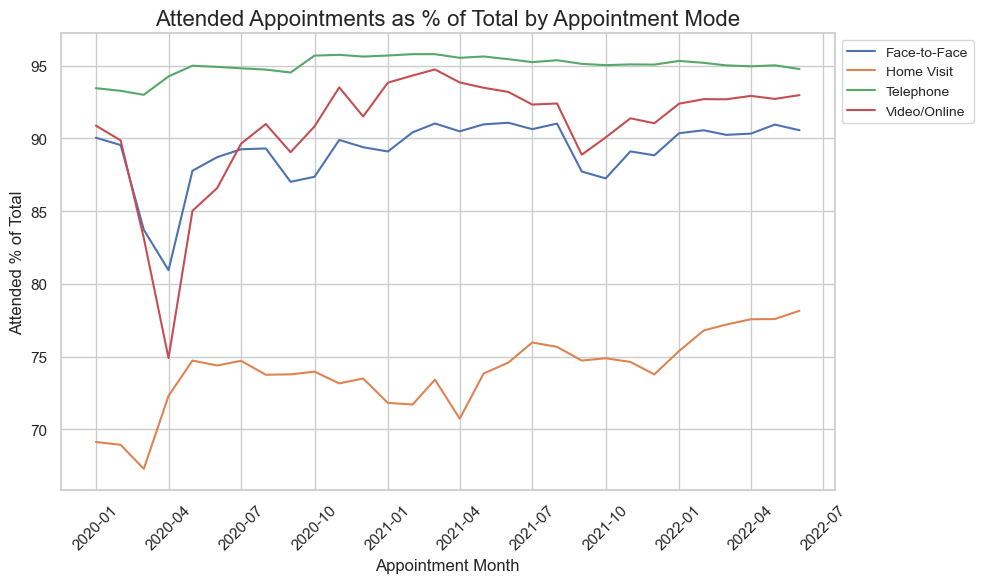

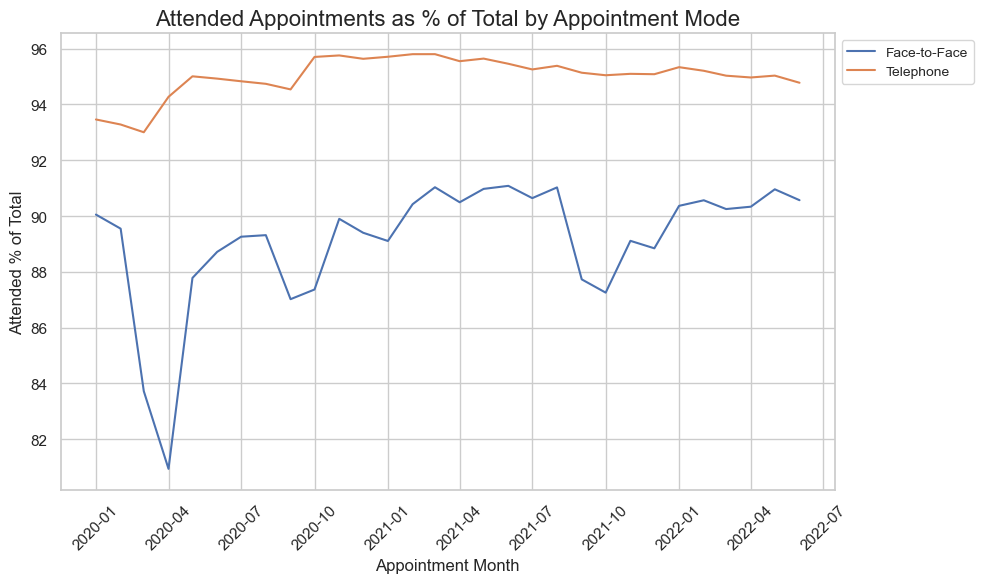

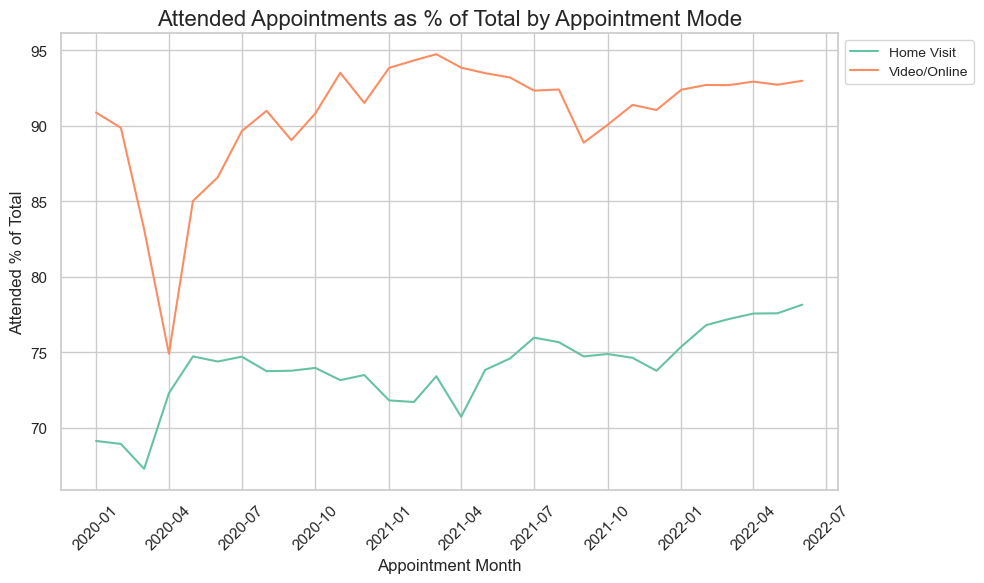

In [126]:
# Attended appointments - Monthly breakdown charts (line graphs) by Appointment mode
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(data=AR_DNA2_filtered,x='appointment_month',y='Attended % of Total',hue='appointment_mode')
plt.xticks(rotation=45)
plt.grid(True)
plt.title('Attended Appointments as % of Total by Appointment Mode',  fontsize = 16)
plt.xlabel('Appointment Month',  fontsize = 12)
plt.ylabel('Attended % of Total',  fontsize = 12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.tight_layout()
plt.show()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=AR_DNA2_filtered[AR_DNA2_filtered['appointment_mode'].isin(['Face-to-Face','Telephone'])],x='appointment_month',y='Attended % of Total',hue='appointment_mode')
plt.xticks(rotation=45)
plt.grid(True)
plt.title('Attended Appointments as % of Total by Appointment Mode',  fontsize = 16)
plt.xlabel('Appointment Month',  fontsize = 12)
plt.ylabel('Attended % of Total',  fontsize = 12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.tight_layout()
plt.show()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=AR_DNA2_filtered[AR_DNA2_filtered['appointment_mode'].isin(['Home Visit','Video/Online'])],x='appointment_month',y='Attended % of Total',hue='appointment_mode',  palette='Set2')
plt.xticks(rotation=45)
plt.grid(True)
plt.title('Attended Appointments as % of Total by Appointment Mode',  fontsize = 16)
plt.xlabel('Appointment Month',  fontsize = 12)
plt.ylabel('Attended % of Total',  fontsize = 12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.tight_layout()
plt.show()

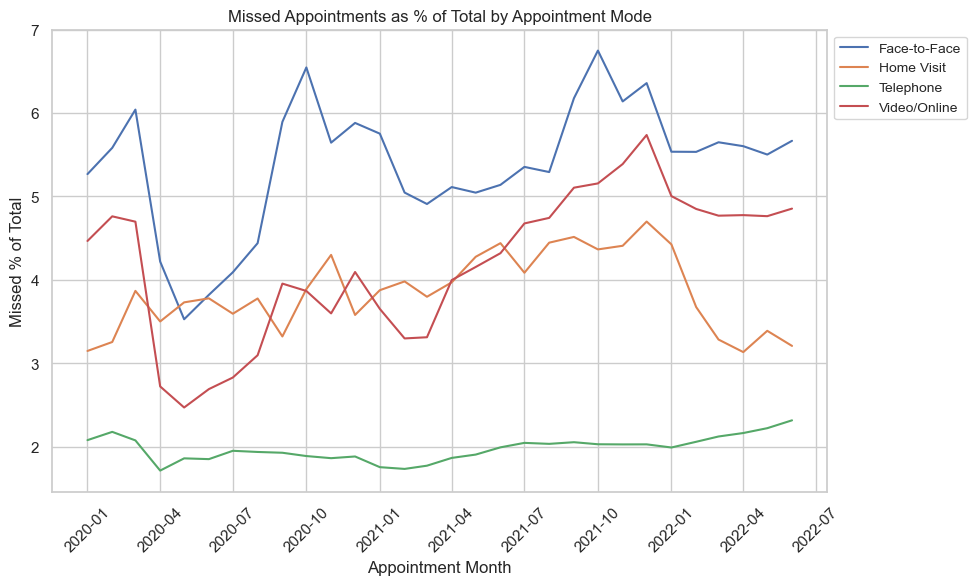

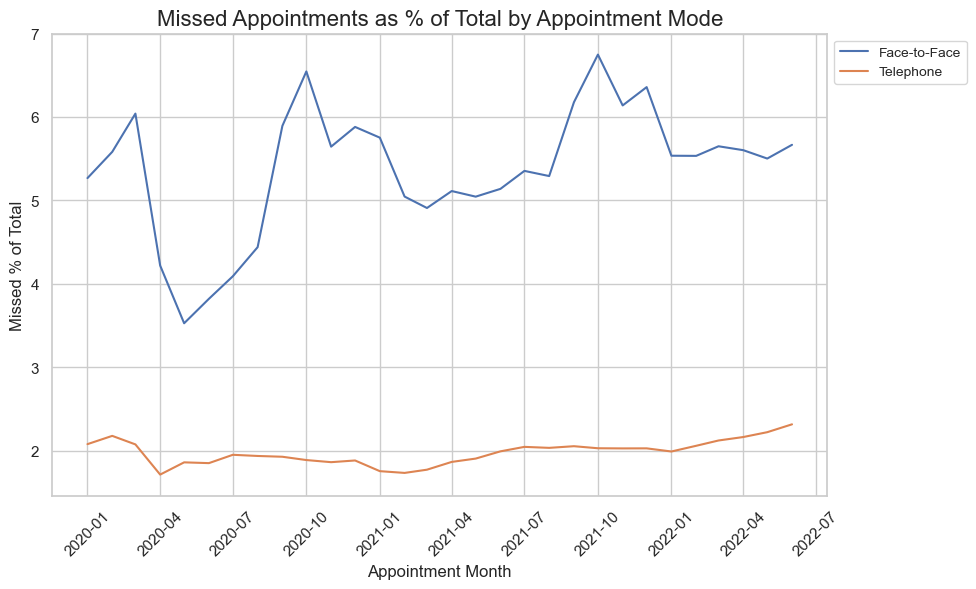

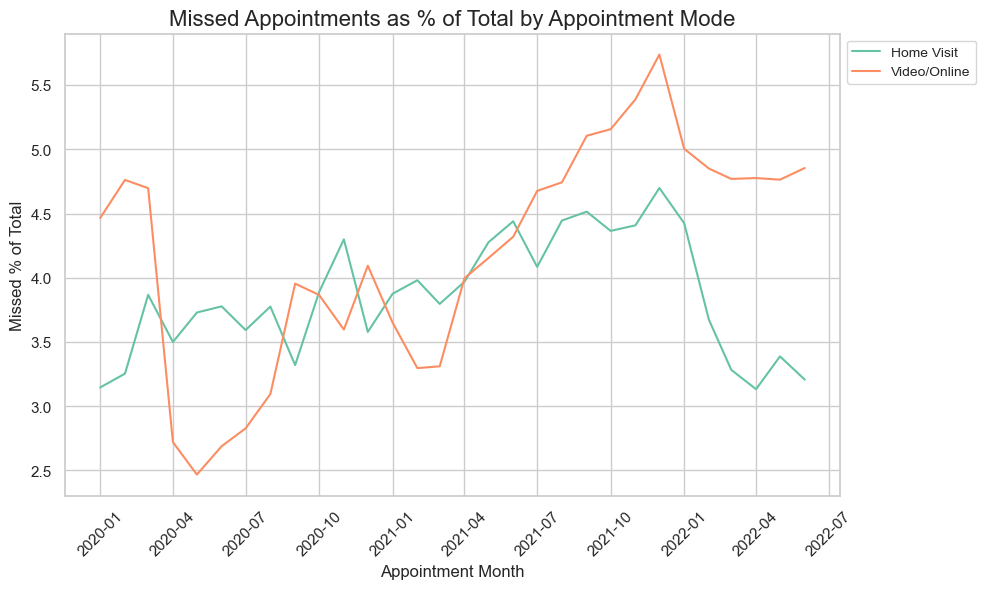

In [128]:
# Missed appointments - Monthly breakdown charts (line graphs) by Appointment mode
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=AR_DNA2_filtered,x='appointment_month',y='DNA % of Total',hue='appointment_mode')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.grid(True)
plt.title('Missed Appointments as % of Total by Appointment Mode')
plt.xlabel('Appointment Month')
plt.ylabel('Missed % of Total')
plt.show()


sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=AR_DNA2_filtered[AR_DNA2_filtered['appointment_mode'].isin(['Face-to-Face','Telephone'])],x='appointment_month',y='DNA % of Total',hue='appointment_mode')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.grid(True)
plt.title('Missed Appointments as % of Total by Appointment Mode', fontsize = 16)
plt.xlabel('Appointment Month', fontsize = 12)
plt.ylabel('Missed % of Total', fontsize = 12)
plt.show()


sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=AR_DNA2_filtered[AR_DNA2_filtered['appointment_mode'].isin(['Home Visit','Video/Online'])],x='appointment_month',y='DNA % of Total',hue='appointment_mode', palette='Set2')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.grid(True)
plt.title('Missed Appointments as % of Total by Appointment Mode', fontsize = 16)
plt.xlabel('Appointment Month', fontsize = 12)
plt.ylabel('Missed % of Total', fontsize = 12)
plt.show()

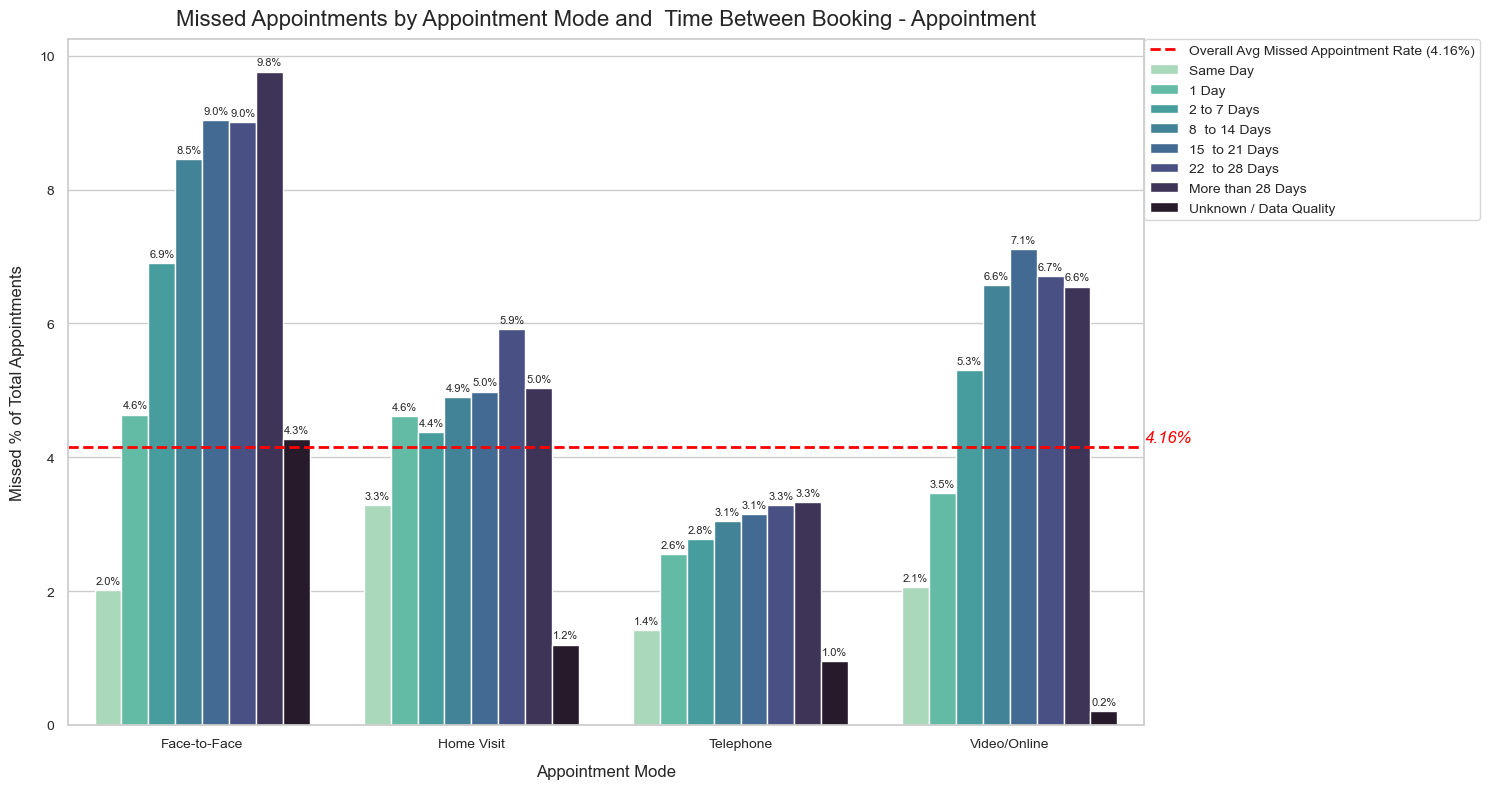

In [130]:
# Bar chart for Missed appointments by Appt. Mode and Time between Booking and Appt.
# Set the style and color palette
sns.set(style="whitegrid")
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(data=AR_DNA_1_filtered, x='appointment_mode', y='% of Total', 
            hue='time_between_book_and_appointment', ax=ax, palette="mako_r")

# Customize the plot
ax.set_title('Missed Appointments by Appointment Mode and  Time Between Booking - Appointment', fontsize=16, pad=10)
ax.set_xlabel('Appointment Mode', fontsize=12, labelpad=10)
ax.set_ylabel('Missed % of Total Appointments', fontsize=12, labelpad=10)

# Add a red dotted line at 4.16% (Overall Avg Missed Appointment Rate)
ax.axhline(4.16, color='red', linestyle='--', linewidth=2, label='Overall Avg Missed Appointment Rate (4.16%)')
ax.text(3.5, 4.3, '4.16%', color='red', fontsize=12, style='italic', va='center')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0., fontsize = 10)

# Add value labels on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3, fontsize=8)

plt.tight_layout()
plt.show()

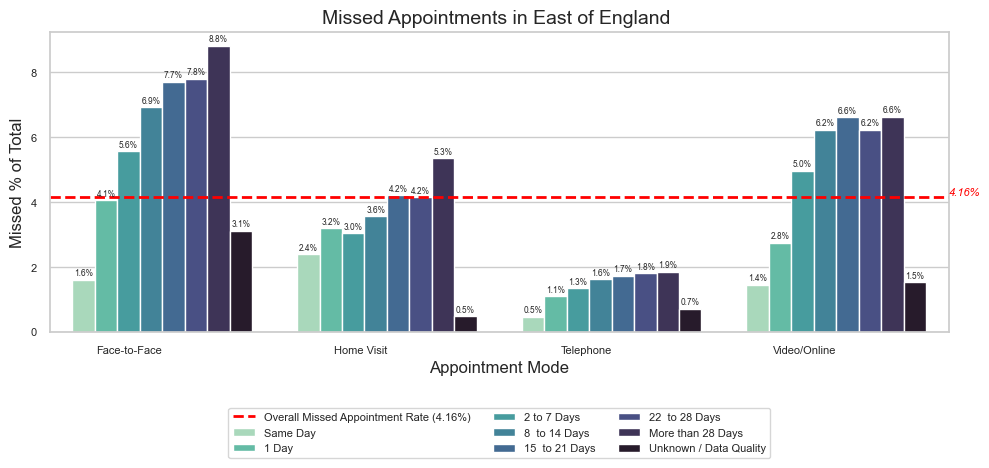

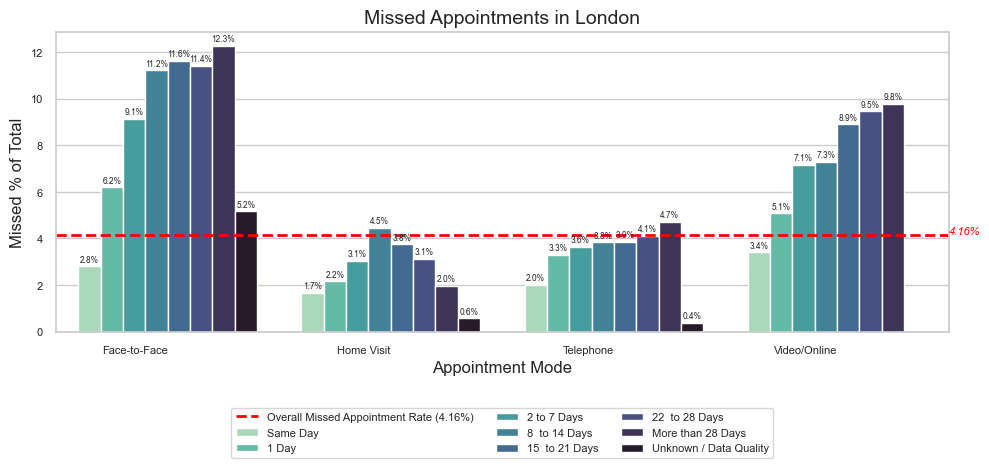

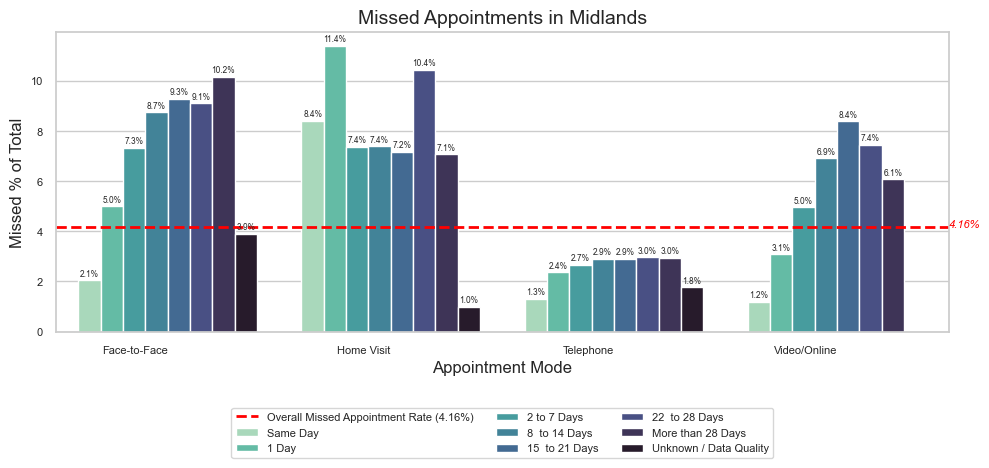

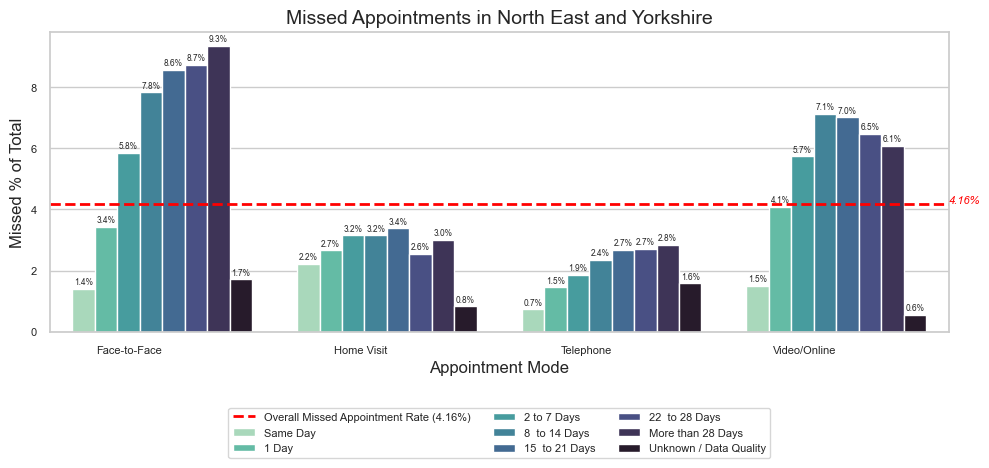

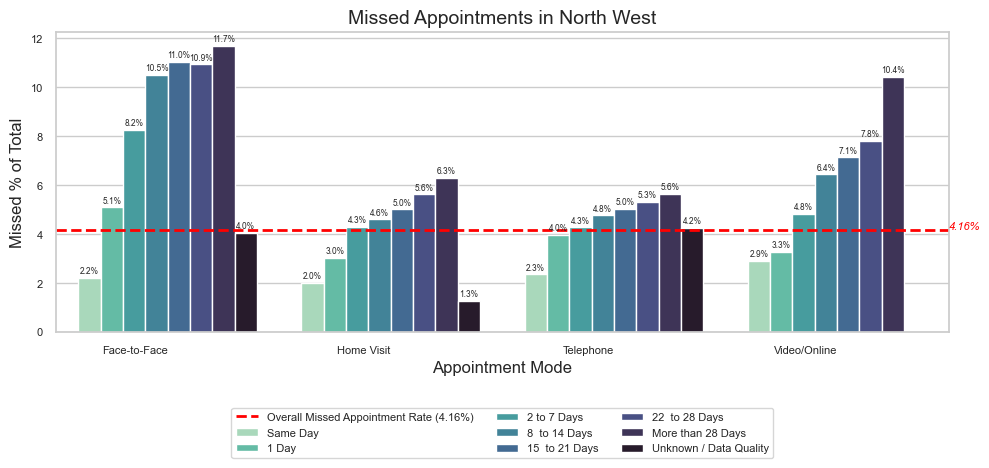

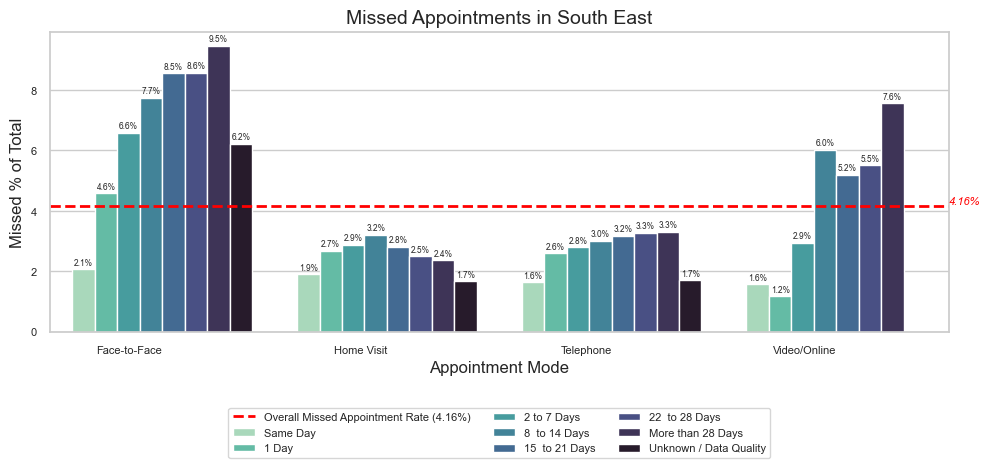

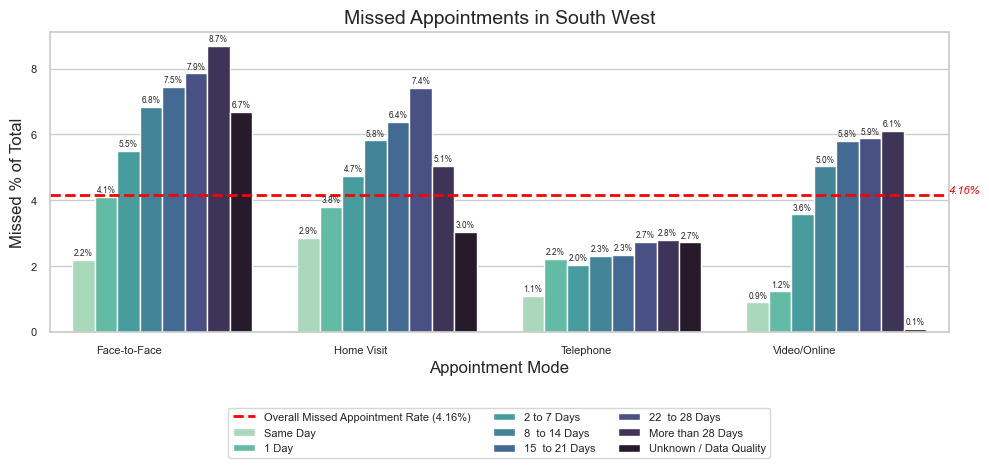

In [133]:
# Bar charts for region wise missed appointments by Appt. Mode and Time between booking and appointment

# Set the style and color palette
sns.set(style="whitegrid", palette="deep")
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

# Get unique regions
regions = AR_DNA_reg_filtered['region_name'].unique()

# Function to create a plot for a single region
def plot_region(region_data, region_name):
    plt.figure(figsize=(10, 5))
    
    ax = sns.barplot(
        data=region_data, 
        x="appointment_mode", 
        y="% of Total", 
        hue="time_between_book_and_appointment",
        errorbar=None, 
        palette='mako_r'
    )
    
    plt.title(f"Missed Appointments in {region_name}")
    plt.xlabel("Appointment Mode")
    plt.ylabel("Missed % of Total")
    plt.xticks(rotation=0, ha='right')
    # Add a red dotted line at 4.16% (Overall Avg Missed Appointment Rate)
    ax.axhline(4.16, color='red', linestyle='--', linewidth=2, label='Overall Missed Appointment Rate (4.16%)')

    # Annotate the line
    ax.text(3.5, 4.3, '4.16%', color='red', fontsize=8, style='italic', va='center')
    
    # Add percentage labels on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=6, rotation=0, 
                    xytext=(0, 5), textcoords='offset points')
    
    # Adjust legend
    plt.legend(bbox_to_anchor=(0.5, -0.25), loc='upper center',  borderaxespad=0.1, ncol=3, fontsize=8)   
    plt.tight_layout()
    #Logic to save as images was used for charts used in presentation
    #plt.savefig(f"{region_name.replace(' ', '_')}_appointments.png", dpi=300, bbox_inches='tight')
    #plt.close()
    plt.show()

# Create and save a plot for each region
for region in regions:
    region_data = AR_DNA_reg_filtered[AR_DNA_reg_filtered['region_name'] == region]
    plot_region(region_data, region)

### Insights and Recommendations

#### Q9. What insights can be gained from the data? 
#### Q10. What recommendations can be made to the NHS based on these insights?

**Key Exploratory Data Insights:**
1. Appointment Mode Distribution: Face-to-face and telephone appointments dominate (95.3% of all appointments). Since COVID-19, telephone appointments have doubled.
2. Time Between Booking and Appointment: 87.7% of all appointments are booked within 0-14 days, which is also when most missed appointments occur.
3. Regional Disparities: Midlands handled the highest volume of appointments (57.4 million), while North West managed the fewest. London and Midlands also show higher missed appointment rates, especially for face-to-face.
4. Service Setting: General Practice represents 91% of appointments, with seasonal peaks in October-November and March-April.
5. Impact of COVID-19: Appointment volumes dropped sharply during lockdowns, but rebounded strongly post-lockdown, indicating postponed appointments being rescheduled.

**Key Insights:**
1. Missed Appointments: Face-to-face appointments account for the highest number of missed appointments (78%), followed by telephone appointments (17%).
2. Most missed appointments occur within 0-14 days of booking.
3. Appointment Mode Trends: Telephone appointments have grown significantly since COVID-19, with the lowest missed rates. Face-to-face appointments, though reduced, still exhibit high missed rates.
4. Regional Variation: Midlands, London, North West, and North East & Yorkshire contribute to 62% of missed appointments.
5. Capacity and Utilization: Weekdays are overutilized (73% of days exceeding capacity), while weekends are underutilized.

**Recommendations:**
1. Shorten Booking Intervals: Increase same-day and next-day appointments to lower missed rates.
2. Expand Remote Consultations: Encourage telephone and video consultations to reduce missed face-to-face slots.
3. Improve Weekend Utilization: Increase weekend appointments to relieve weekday overuse.
4. Region-Specific Interventions: Tailor strategies to regions with higher missed appointments.
5. Targeted Reminders: Use automated reminders to reduce DNA for appointments with booking window greater than 8 days.
6. Dynamic staff allocation: Adopt a flexible staffing model to respond to varying demand for appointment types for better capacity utilization. 